# **<h1 align="center">Data Mining 2024-25</h3>**
## **<h3 align="center">Customer Segmentation - ABCDEats Inc.</h3>**
### **<h3 align="center">EDA and Preprocessing</h3>**


**Group 10 members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Marco Galão  - r20201545@novaims.unl.pt - r20201545<br>
Sven Goerdes - 20240503@novaims.unl.pt - 20240503<br>
Tim Straub  - 20240505@novaims.unl.pt - 20240505<br>

<a id = "toc"></a>

# Table of Contents

* [1. Import the Libraries](#import_libraries)
* [2. Import the Dataset](#import_dataset)
* [3. Description of the Dataset’s Structure](#dataset_structure)
* [4. Exploring the Dataset](#exploration)
    * [4.1. Constant Features](#constant_features)
    * [4.2. Duplicates](#duplicates)
    * [4.3. Missing Values](#missing_values)
    * [4.4. Data Types](#data_types)
    * [4.5. Coherence Checking](#coherence_checking)
        * [4.5.1. Minors Customers](#sub_section_4_5_1)
        * [4.5.2. Last_order and First_order consistency](#sub_section_4_5_2)
        * [4.5.3. CUI_Asian vs Japonese, Chinese](#sub_section_4_5_3)
        * [4.5.4. Sum DOWs vs sum HRs](#sub_section_4_5_4)
        * [4.5.5. Is_chain variable](#sub_section_4_5_5)
        * [4.5.6. Total Orders and Vendor Count consistency ](#sub_section_4_5_6)      
        * [4.5.7. Total Orders equal to zero](#sub_section_4_5_7)
        * [4.5.8. Total rows with inconsistencies](#sub_section_4_5_8)
    * [4.6. Visualizations](#visualizations)
* [5. Feature Engineering](#feature_engineering)
    * [5.1. Generation](#generation)
    * [5.2. Total Cuisine Spending](#total_cuisine_spending)
    * [5.3. Total Orders](#total_orders)
    * [5.4. Weekend and Weekday Orders](#weekend_and_weekday_orders)
    * [5.5. Hourly Orders Aggregation](#hourly_orders_aggregation)
    * [5.6. Order Recency](#Order_Recency)
    * [5.7. Average Daily Orders](#Average_Daily_Orders)
    * [5.8. Average Order Value](#Average_Order_Value)
    * [5.9. Last Promotion Indicator](#last_promotion_indicator)
    * [5.10. Cities](#cities)
    * [5.11. Cuisine Origin Spending](#cuisine_origin_spend)
    * [5.12. Meal Occasion Spending](#meal_occasion_spend)
    * [5.13. Proportion of Cuisine Spending](#proportion_cuisine_spending)
    * [5.13. Proportion of Total Orders](#proportion_total_orders)
* [6. Outliers (Before Feature Selection)](#outliers_before)
    * [6.1. Defining Relevant Metric Features](#defining_features)
    * [6.2. Histograms and Boxplots](#visualizations)
    * [6.3. Approach 1 (Not Used)](#approach_1)
        * [6.3.1. IQR Method](#iqr_method)
    * [6.4. Approach 2 (Not Used)](#approach_2)
        * [6.4.1. Manual Method](#manual_method)
        * [6.4.2. Winsorizing](#winsorizing)
    * [6.5. Approach 3 (Used)](#approach_3)
        * [6.5.1 DBSCAN](#dbscan_outliers)
            * [6.5.1.1. Identify eps value (elbow method)](#eps)
            * [6.5.1.2. Choose min_samples value](#min_samples)
            * [6.5.1.3. Apply DBSCAN](#apply_dbscan_outliers)
        * [6.5.2. Winsorizing](#winsorizing_after_dbscan)
* [7. Feature Selection](#feature_selection)
    * [7.1. Define Initial Perspectives](#initial_perspectives)
    * [7.2. Customer Behavior](#customer_behavior)
    * [7.3. Cuisine Preferences](#cuisine_preferences)
    * [7.4. Final Features](#final_features)
* [8. Outliers (After Feature Selection)](#outliers_after)
    * [8.1. DBSCAN](#dbscan_outliers_final)
        * [8.1.1. Identify eps value (elbow method)](#eps_final)
        * [8.1.2. Choose min_samples value](#min_samples_final)
        * [8.1.3. Apply DBSCAN](#apply_dbscan_outliers_final)
    * [8.2. Winsorizing](#winsorizing_after_dbscan)
* [9. Standardization](#standardization)
* [10. Export Preprocessed Dataset](#export_preproc_data)

`Note`: Some cells are commented out, because they are not needed for execution (by the teacher) - just auxiliary code

# 1. Import the Libraries <a class="anchor" id="import_libraries"></a>
[Back to ToC](#toc)<br>

For tasks involving data manipulation, numerical calculations, visualization, and machine learning, imports of libraries like the mentioned in the below cell are crucial. These libraries offer the required functions and tools for preprocessing data, pattern analysis, consumer segmentation, and development of focused marketing campaigns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import json
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

#Importing the functions created in main.py
from utils import *
import importlib
imported_module = importlib.import_module("utils")
importlib.reload(imported_module)

<module 'utils' from 'c:\\Users\\xandg\\Ambiente de Trabalho\\IMS\\3rd year\\1st Semester\\Capstone Project\\OpenAI\\Capstone-Project\\CustomerSegmentationDataMining\\deliverables\\utils.py'>

# 2. Import the Dataset <a class="anchor" id="import_dataset"></a>
[Back to ToC](#toc)<br>

In this section, we import the datasets and set the customer_id as the index column in DM2425_ABCDEats_DATASET. Also, check the first and last 5 rows of the dataset.

In [2]:
df_original = pd.read_csv("../Data/DM2425_ABCDEats_DATASET.csv", index_col="customer_id")
df_original.head().T

customer_id              1b8f824d5e 5d272b9dcb f6d1b2ba63 180c632ed8  \
customer_region                2360       8670       4660       4660   
customer_age                   18.0       17.0       38.0        NaN   
vendor_count                      2          2          1          2   
product_count                     5          2          2          3   
is_chain                          1          2          2          1   
first_order                     0.0        0.0        0.0        0.0   
last_order                        1          1          1          2   
last_promo                 DELIVERY   DISCOUNT   DISCOUNT   DELIVERY   
payment_method                 DIGI       DIGI       CASH       DIGI   
CUI_American                    0.0      12.82        9.2        0.0   
CUI_Asian                       0.0       6.39        0.0       13.7   
CUI_Beverages                   0.0        0.0        0.0        0.0   
CUI_Cafe                        0.0        0.0        0.0        0.0   
CUI_Chicken Dishes              0.0        0.0        0.0        0.0   
CUI_Chinese                     0.0        0.0        0.0        0.0   
CUI_Desserts                    0.0        0.0        0.0        0.0   
CUI_Healthy                     0.0        0.0        0.0        0.0   
CUI_Indian                    28.88        0.0        0.0      17.86   
CUI_Italian                     0.0        0.0        0.0        0.0   
CUI_Japanese                    0.0        0.0        0.0        0.0   
CUI_Noodle Dishes               0.0        0.0        0.0        0.0   
CUI_OTHER                       0.0        0.0        0.0        0.0   
CUI_Street Food / Snacks        0.0        0.0        0.0        0.0   
CUI_Thai                        0.0        0.0        0.0        0.0   
DOW_0                             1          1          1          0   
DOW_1                             0          0          0          1   
DOW_2                             0          0          0          0   
DOW_3                             0          0          0          0   
DOW_4                             0          0          0          0   
DOW_5                             0          0          0          0   
DOW_6                             1          1          1          1   
HR_0                            0.0        0.0        0.0        0.0   
HR_1                              0          0          0          0   
HR_2                              0          0          0          0   
HR_3                              0          0          0          0   
HR_4                              0          0          0          0   
HR_5                              0          0          0          0   
HR_6                              0          0          0          0   
HR_7                              0          0          0          0   
HR_8                              0          0          0          0   
HR_9                              0          0          1          0   
HR_10                             0          1          0          0   
HR_11                             0          1          1          1   
HR_12                             0          0          0          0   
HR_13                             0          0          0          0   
HR_14                             0          0          0          1   
HR_15                             0          0          0          0   
HR_16                             0          0          0          0   
HR_17                             0          0          0          0   
HR_18                             2          0          0          0   
HR_19                             0          0          0          0   
HR_20                             0          0          0          0   
HR_21                             0          0          0          0   
HR_22                             0          0          0          0   
HR_23                             0     

In [3]:
df_original.tail().T

customer_id              f4e366c281 f6b6709018 f74ad8ce3f f7b19c0241  \
customer_region                8670       8670       8670       8670   
customer_age                   30.0        NaN       24.0       34.0   
vendor_count                      1          1          1          1   
product_count                     1          1          1          1   
is_chain                          1          0          1          0   
first_order                     NaN        NaN        NaN        NaN   
last_order                        0          0          0          0   
last_promo                  FREEBIE   DELIVERY          -   DISCOUNT   
payment_method                 DIGI       DIGI       DIGI       DIGI   
CUI_American                    0.0      18.04        0.0        0.0   
CUI_Asian                       0.0        0.0        0.0      12.03   
CUI_Beverages                 18.04        0.0        0.0        0.0   
CUI_Cafe                        0.0        0.0        0.0        0.0   
CUI_Chicken Dishes              0.0        0.0        0.0        0.0   
CUI_Chinese                     0.0        0.0        0.0        0.0   
CUI_Desserts                    0.0        0.0      17.79        0.0   
CUI_Healthy                     0.0        0.0        0.0        0.0   
CUI_Indian                      0.0        0.0        0.0        0.0   
CUI_Italian                     0.0        0.0        0.0        0.0   
CUI_Japanese                    0.0        0.0        0.0        0.0   
CUI_Noodle Dishes               0.0        0.0        0.0        0.0   
CUI_OTHER                       0.0        0.0        0.0        0.0   
CUI_Street Food / Snacks        0.0        0.0        0.0        0.0   
CUI_Thai                        0.0        0.0        0.0        0.0   
DOW_0                             0          0          0          0   
DOW_1                             0          0          0          0   
DOW_2                             0          0          0          0   
DOW_3                             0          0          0          0   
DOW_4                             0          0          0          0   
DOW_5                             0          0          0          0   
DOW_6                             1          1          1          1   
HR_0                            0.0        0.0        0.0        0.0   
HR_1                              0          0          0          0   
HR_2                              0          0          0          0   
HR_3                              0          0          0          0   
HR_4                              0          0          0          0   
HR_5                              0          0          1          0   
HR_6                              0          0          0          0   
HR_7                              0          0          0          0   
HR_8                              0          0          0          0   
HR_9                              0          0          0          0   
HR_10                             0          0          0          0   
HR_11                             0          0          0          1   
HR_12                             0          0          0          0   
HR_13                             1          0          0          0   
HR_14                             0          0          0          0   
HR_15                             0          0          0          0   
HR_16                             0          1          0          0   
HR_17                             0          0          0          0   
HR_18                             0          0          0          0   
HR_19                             0          0          0          0   
HR_20                             0          0          0          0   
HR_21                             0          0          0          0   
HR_22                             0          0          0          0   
HR_23                             0     

# 3. Description of the Dataset’s Structure<a class="anchor" id="dataset_structure"></a>
[Back to ToC](#toc)<br>

Here, let's try to identify missing values, check if data types are appropriate and performs summary statistics.

In [4]:
df_original.shape

(31888, 55)

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

<br>
The <span style="color:Blue"> info()  </span> method prints information about the DataFrame. Using this method we can evaluate the following:

Missing values:
- customer_age
- first_order
- HR_0

Data types:
- customer_age should be a integer
- first_order is number of days so should be a integer

The <span style="color:Blue"> describe()  </span> method  is used for calculating some statistical data.

In [6]:
df_original.describe().round(2).T

count   mean    std   min   25%   50%    75%  \
customer_age              31161.0  27.51   7.16  15.0  23.0  26.0  31.00   
vendor_count              31888.0   3.10   2.77   0.0   1.0   2.0   4.00   
product_count             31888.0   5.67   6.96   0.0   2.0   3.0   7.00   
is_chain                  31888.0   2.82   3.98   0.0   1.0   2.0   3.00   
first_order               31782.0  28.48  24.11   0.0   7.0  22.0  45.00   
last_order                31888.0  63.68  23.23   0.0  49.0  70.0  83.00   
CUI_American              31888.0   4.88  11.65   0.0   0.0   0.0   5.66   
CUI_Asian                 31888.0   9.96  23.56   0.0   0.0   0.0  11.83   
CUI_Beverages             31888.0   2.30   8.48   0.0   0.0   0.0   0.00   
CUI_Cafe                  31888.0   0.80   6.43   0.0   0.0   0.0   0.00   
CUI_Chicken Dishes        31888.0   0.77   3.66   0.0   0.0   0.0   0.00   
CUI_Chinese               31888.0   1.43   8.19   0.0   0.0   0.0   0.00   
CUI_Desserts              31888.0   0.88   5.26   0.0   0.0   0.0   0.00   
CUI_Healthy               31888.0   0.95   5.83   0.0   0.0   0.0   0.00   
CUI_Indian                31888.0   1.63   7.44   0.0   0.0   0.0   0.00   
CUI_Italian               31888.0   3.23  11.25   0.0   0.0   0.0   0.00   
CUI_Japanese              31888.0   3.00  10.18   0.0   0.0   0.0   0.00   
CUI_Noodle Dishes         31888.0   0.71   4.54   0.0   0.0   0.0   0.00   
CUI_OTHER                 31888.0   3.00   9.77   0.0   0.0   0.0   0.00   
CUI_Street Food / Snacks  31888.0   3.91  15.55   0.0   0.0   0.0   0.00   
CUI_Thai                  31888.0   0.84   4.43   0.0   0.0   0.0   0.00   
DOW_0                     31888.0   0.56   1.01   0.0   0.0   0.0   1.00   
DOW_1                     31888.0   0.57   1.04   0.0   0.0   0.0   1.00   
DOW_2                     31888.0   0.59   1.05   0.0   0.0   0.0   1.00   
DOW_3                     31888.0   0.62   1.07   0.0   0.0   0.0   1.00   
DOW_4                     31888.0   0.68   1.09   0.0   0.0   0.0   1.00   
DOW_5                     31888.0   0.65   1.07   0.0   0.0   0.0   1.00   
DOW_6                     31888.0   0.70   1.17   0.0   0.0   0.0   1.00   
HR_0                      30723.0   0.00   0.00   0.0   0.0   0.0   0.00   
HR_1                      31888.0   0.05   0.32   0.0   0.0   0.0   0.00   
HR_2                      31888.0   0.06   0.35   0.0   0.0   0.0   0.00   
HR_3                      31888.0   0.12   0.50   0.0   0.0   0.0   0.00   
HR_4                      31888.0   0.10   0.44   0.0   0.0   0.0   0.00   
HR_5                      31888.0   0.08   0.36   0.0   0.0   0.0   0.00   
HR_6                      31888.0   0.07   0.33   0.0   0.0   0.0   0.00   
HR_7                      31888.0   0.08   0.38   0.0   0.0   0.0   0.00   
HR_8                      31888.0   0.13   0.64   0.0   0.0   0.0   0.00   
HR_9                      31888.0   0.23   0.72   0.0   0.0   0.0   0.00   
HR_10                     31888.0   0.33   0.89   0.0   0.0   0.0   0.00   
HR_11                     31888.0   0.38   0.96   0.0   0.0   0.0   0.00   
HR_12                     31888.0   0.31   0.84   0.0   0.0   0.0   0.00   
HR_13                     31888.0   0.24   0.64   0.0   0.0   0.0   0.00   
HR_14                     31888.0   0.22   0.60   0.0   0.0   0.0   0.00   
HR_15                     31888.0   0.28   0.74   0.0   0.0   0.0   0.00   
HR_16                     31888.0   0.36   0.87   0.0   0.0   0.0   0.00   
HR_17                     31888.0   0.39   0.94   0.0   0.0   0.0   0.00   
HR_18                     31888.0   0.34   0.89   0.0   0.0   0.0   0.00   
HR_19                     31888.0   0.25   0.80   0.0   0.0   0.0   0.00   
HR_20                     31888.0   0.14   0.59   0.0   0.0   0.0   0.00   
HR_21                     31888.0   0.07   0.35   0.0   0.0   0.0   0.00   
HR_22                     31888.0   0.05   0.30   0.0   0.0   0.0   0.00   
HR_23                     31888.0   0.05   0.28   0.0   0.0   0.0   0.00   


As we can see the HR_0 is always equal to zero, so we can delete this feature.

In [7]:
df_original.describe(include="object")

customer_region last_promo payment_method
count            31888      31888          31888
unique               9          4              3
top               8670          -           CARD
freq              9761      16748          20161

Let's see the unique values that exist in categorical variables

In [8]:
(df_original["customer_region"].value_counts(normalize=True) * 100).round(2)

customer_region
8670    30.61
4660    29.95
2360    27.69
2440     4.65
4140     2.69
8370     1.55
2490     1.40
-        1.39
8550     0.08
Name: proportion, dtype: float64

In [9]:
(df_original["last_promo"].value_counts(normalize=True) * 100).round(2)

last_promo
-           52.52
DELIVERY    19.71
DISCOUNT    14.10
FREEBIE     13.67
Name: proportion, dtype: float64

Lets replace the - for None.

In [10]:
(df_original["payment_method"].value_counts(normalize=True) * 100).round(2)

payment_method
CARD    63.22
DIGI    19.13
CASH    17.64
Name: proportion, dtype: float64

So, there are hidden missing values in "customer_region" ("-") and we should evaluate what could mean "-" in "last_promo"

<a id = "exploration"></a>

# 4. Exploring the Dataset <a class="anchor" id="a"></a>
[Back to ToC](#toc)<br>

In this section we perform several checks and treatments to ensure data quality. <br>
This entails locating and managing duplicates to prevent redundant data, removing constant characteristics that don't offer insightful information, and dealing with missing values using methods like imputation or exclusion. These procedures are essential for preserving data integrity and enhancing the accuracy of later analysis and modeling efforts.

> ## 4.1. Constant features <a class="anchor" id="constant_features"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

The <span style='color:Blue'> var() </span> method allows us to check if there are any of the numerical variables are univariate (variance is equal to 0).

In [11]:
variances = df_original.var(numeric_only=True)
variances[variances == 0]

HR_0    0.0
dtype: float64

Let's drop the univariate feature "HR_0"

In [12]:
df_no_hr0 = df_original.drop("HR_0", axis = 1)

> ## 4.2. Duplicates <a class="anchor" id="duplicates"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

With the <span style="color:Blue"> drop_duplicates() </span> method the duplicates rows will be dropped. We can conclude that that this dataset had 60 duplicates.

Check for duplicated indexes

In [13]:
df_no_hr0.index.duplicated().sum()

13

In [14]:
df_no_duplicates = df_no_hr0[~df_no_hr0.index.duplicated(keep='first')]

In [15]:
df_no_duplicates.index.duplicated().sum()

0

Check for duplicated rows (without considering indexes)

In [16]:
df_no_duplicates.duplicated().sum()

47

In [17]:
df_no_duplicates.drop_duplicates(inplace=True)

In [18]:
df_no_duplicates.duplicated().sum()

0

In [19]:
df_no_duplicates.shape

(31828, 54)

**Conclusion:**

In [20]:
# Calculate the number of rows removed
rows_removed = len(df_no_hr0) - len(df_no_duplicates)

print(len(df_no_hr0))

# Calculate the percentage of rows removed
percent_removed = (rows_removed / len(df_no_hr0)) * 100

# Print the results
print(f"Rows removed due to duplicates: {rows_removed} ({round(percent_removed, 2)}%)")

31888
Rows removed due to duplicates: 60 (0.19%)


> ## 4.3. Missing values <a class="anchor" id="missing_values"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

As we concluded there are some features that have some missing values. In this subsection we will check for each feature and try to understand what would be the best approach.

In [21]:
df_treat_missing = df_no_duplicates.copy()

In [22]:
# Calculate the percentage of disguised missing values "-" in each column
perc_dash_values = (df_treat_missing.apply(lambda x: (x == '-').sum()) / len(df_treat_missing) * 100).round(2)
perc_dash_values[perc_dash_values > 0].sort_values(ascending=False)

last_promo         52.54
customer_region     1.39
dtype: float64

In [23]:
# Calculate percentage of missing values in each column
perc_missing_values = (df_treat_missing.isna().sum() / len(df_treat_missing) * 100).round(2)
perc_missing_values[perc_missing_values > 0].sort_values(ascending=False)

customer_age    2.28
first_order     0.33
dtype: float64

> ### Missing values in **last_promo**


Evaluate "-" values

In [24]:
(df_treat_missing["last_promo"].value_counts(normalize=True, ascending=False) * 100).round(2)

last_promo
-           52.54
DELIVERY    19.70
DISCOUNT    14.11
FREEBIE     13.65
Name: proportion, dtype: float64

Create new columns (and auxiliary variables with column names) to help creating visualizations

**auxiliary variables:**
* metric features
* non metric features
* metric features excluding cui/dow/hr columns

In [25]:
# New columns

# Select all columns that start with "CUI_"
cui_columns = df_treat_missing.filter(like="CUI_").columns.tolist()
dow_columns = df_treat_missing.filter(like="DOW_").columns.tolist()
hr_columns = df_treat_missing.filter(like="HR_").columns.tolist()

# Fill NaN values with 0 before summing
df_treat_missing["total_cui_spending"] = df_treat_missing[cui_columns].sum(axis=1)
df_treat_missing["total_orders"] = df_treat_missing[dow_columns].sum(axis=1)

# Auxiliary variables

# Define metric and non-metric features
metric_features = df_treat_missing.select_dtypes(include=['number']).columns.tolist()
non_metric_features = df_treat_missing.select_dtypes(exclude=['number']).columns.tolist()

# Exclude DOW and HR (and CUI) columns from metric features
metric_features_excluding_dow_and_hr = [feat for feat in metric_features if feat not in dow_columns + hr_columns]
metric_features_excluding_cui_dow_and_hr = [feat for feat in metric_features if feat not in cui_columns + dow_columns + hr_columns]

<br>
To improve the visualizations and maintain coherence across all of them, let's define a consistent color palette that will be applied throughout.

https://seaborn.pydata.org/tutorial/color_palettes.html#sequential-color-brewer-palettes

In [26]:
# Set color palette
color_palette = "Set2"

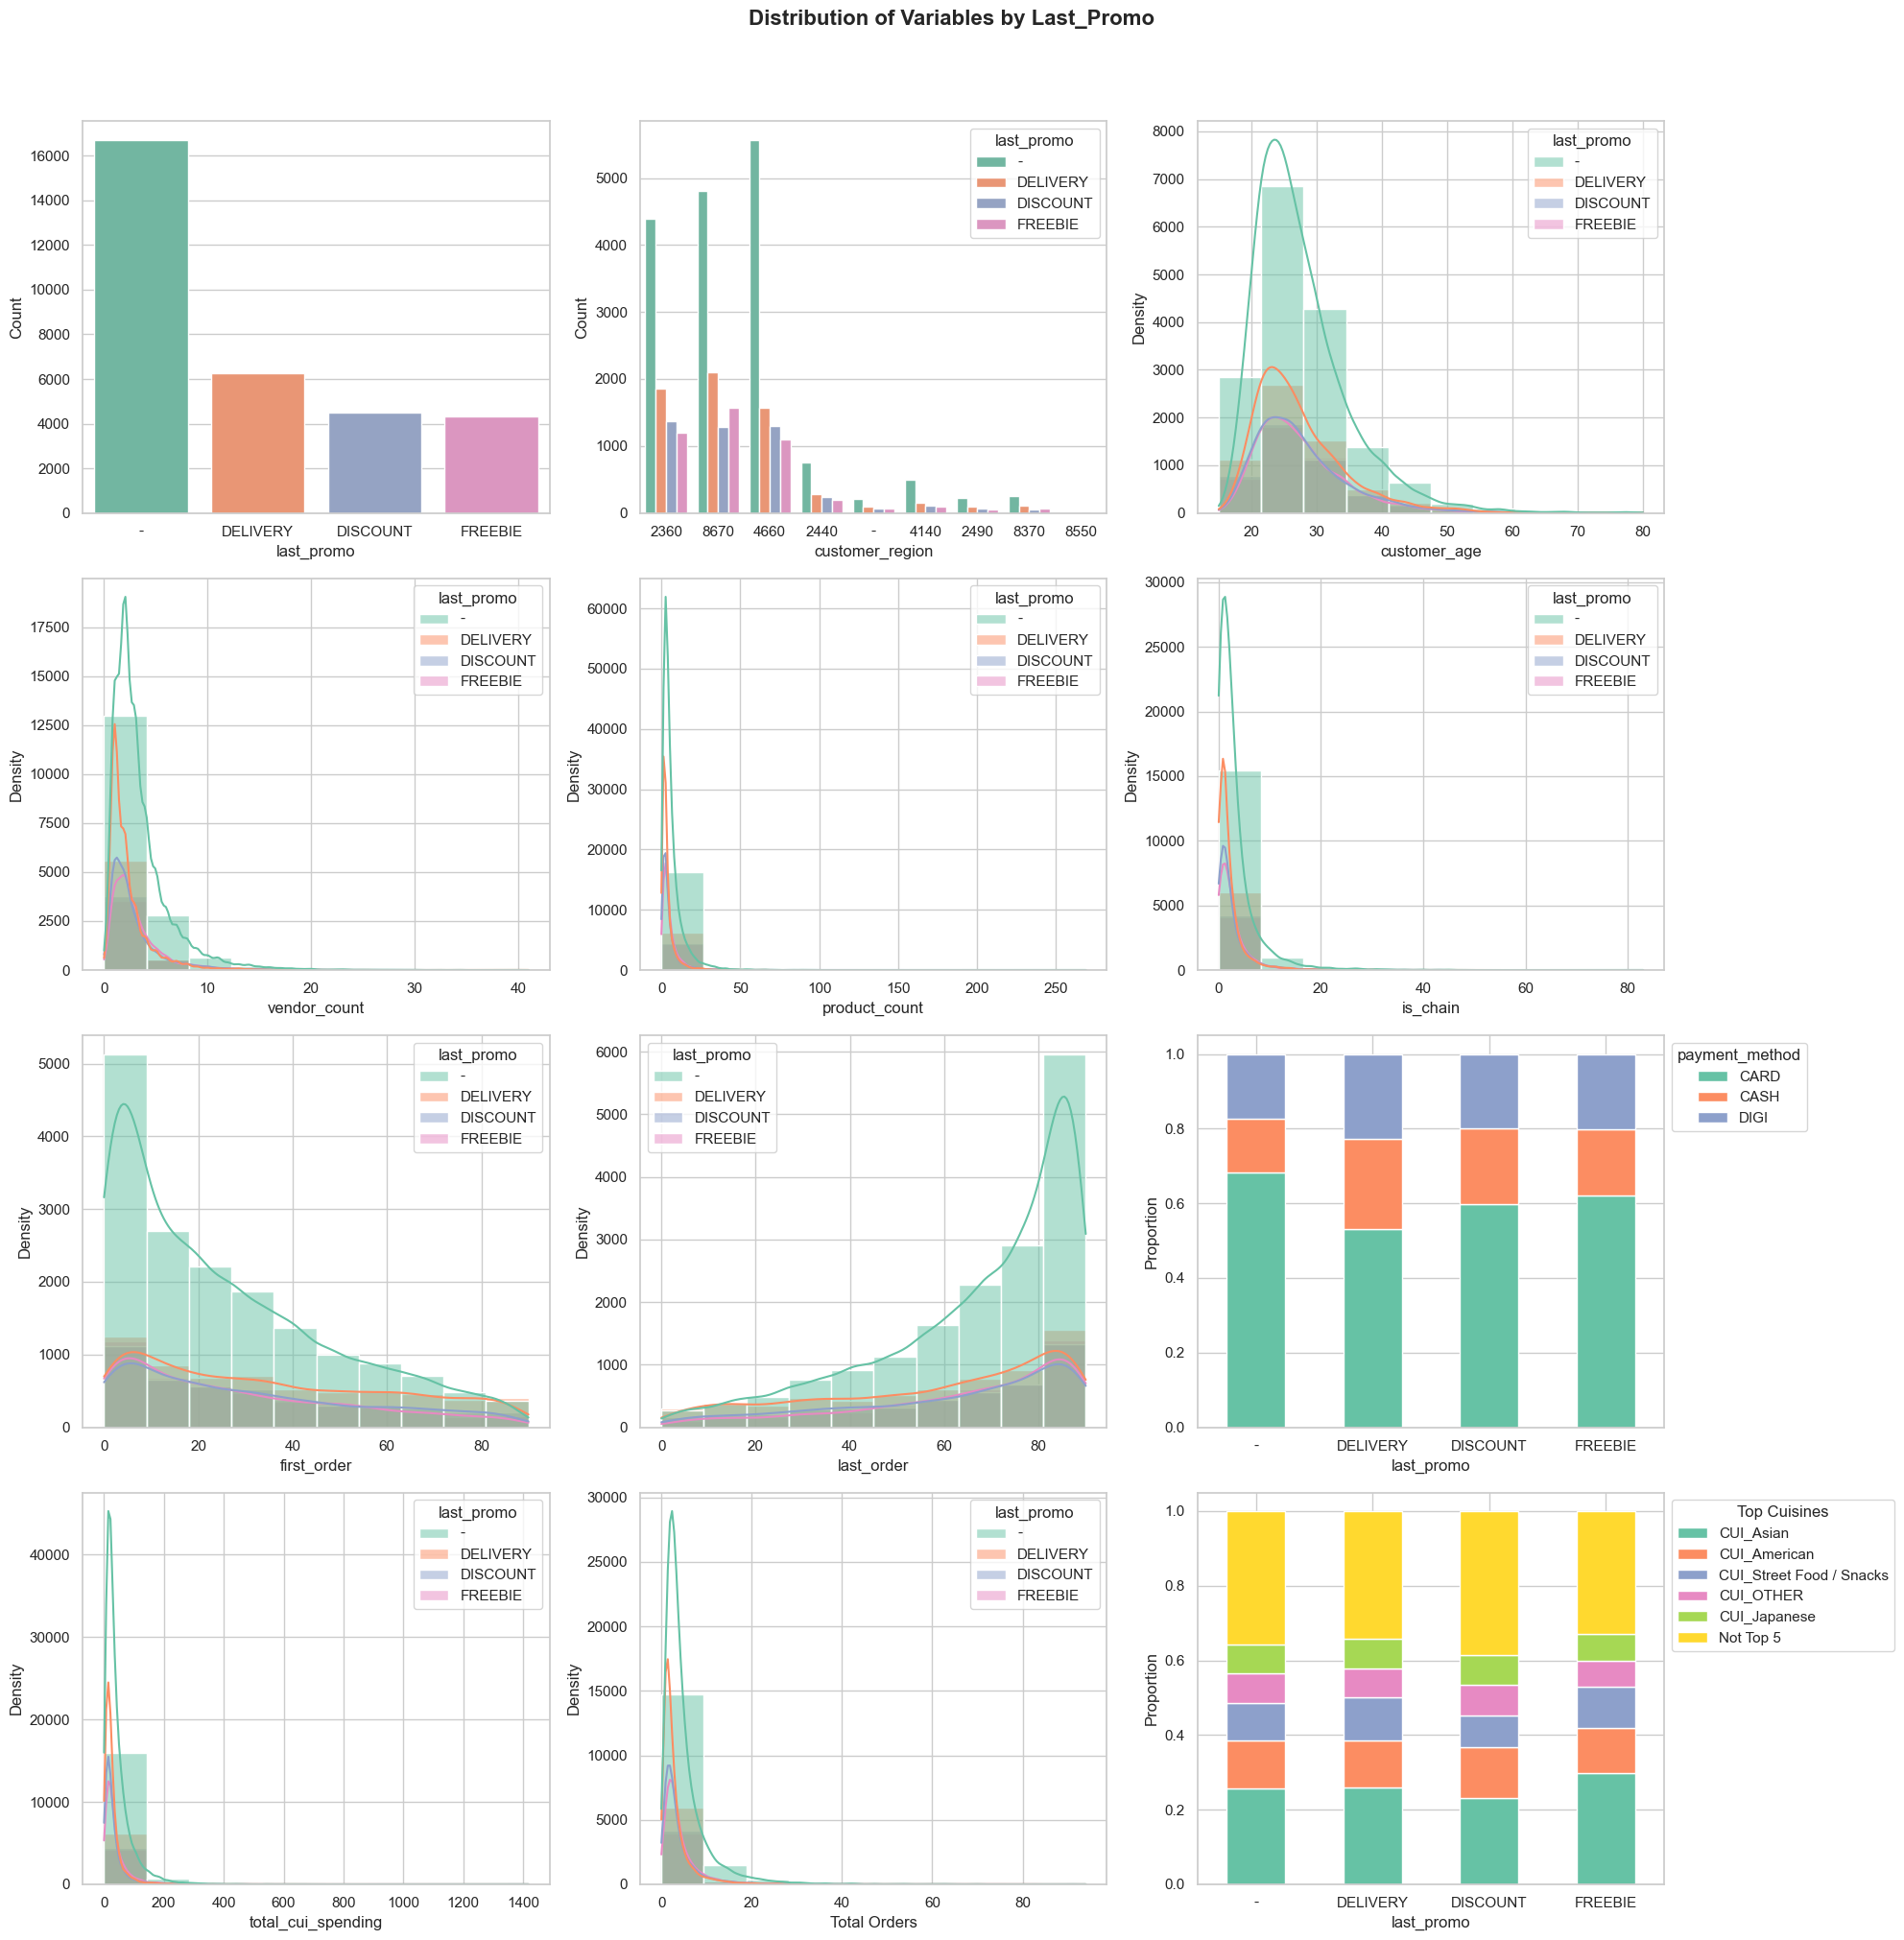

In [27]:
# For last_promo
# This function is defined in main.py
plot_grouped_distributions(df_treat_missing, group_by_variable='last_promo', color_palette=color_palette)

**Conclusion:** All "last_promo" perspectives, including those labeled with “-”, display similar distribution shapes. This consistency across distributions suggests that the records marked with “-” are not random and likely represent a specific group of customers rather than missing data. Therefore, we can infer that they indicate customers who did not engage with any promotions. By doing so, we allow for more effective segmentation and insights into customer behavior.

In [28]:
df_treat_missing["last_promo"].replace("-", 'NOPROMO', inplace=True)

> ### Missing values in **customer_region**


Notes:
- Values could represent postal codes
- Check if customer region values with similar prefix indicate geographical proximity

In [29]:
(df_treat_missing["customer_region"].value_counts(normalize=True, ascending=False) * 100).round(2)

customer_region
8670    30.63
4660    29.95
2360    27.70
2440     4.66
4140     2.69
8370     1.56
2490     1.39
-        1.39
8550     0.04
Name: proportion, dtype: float64

In [30]:
df_treat_missing.isna().sum().sum()

833

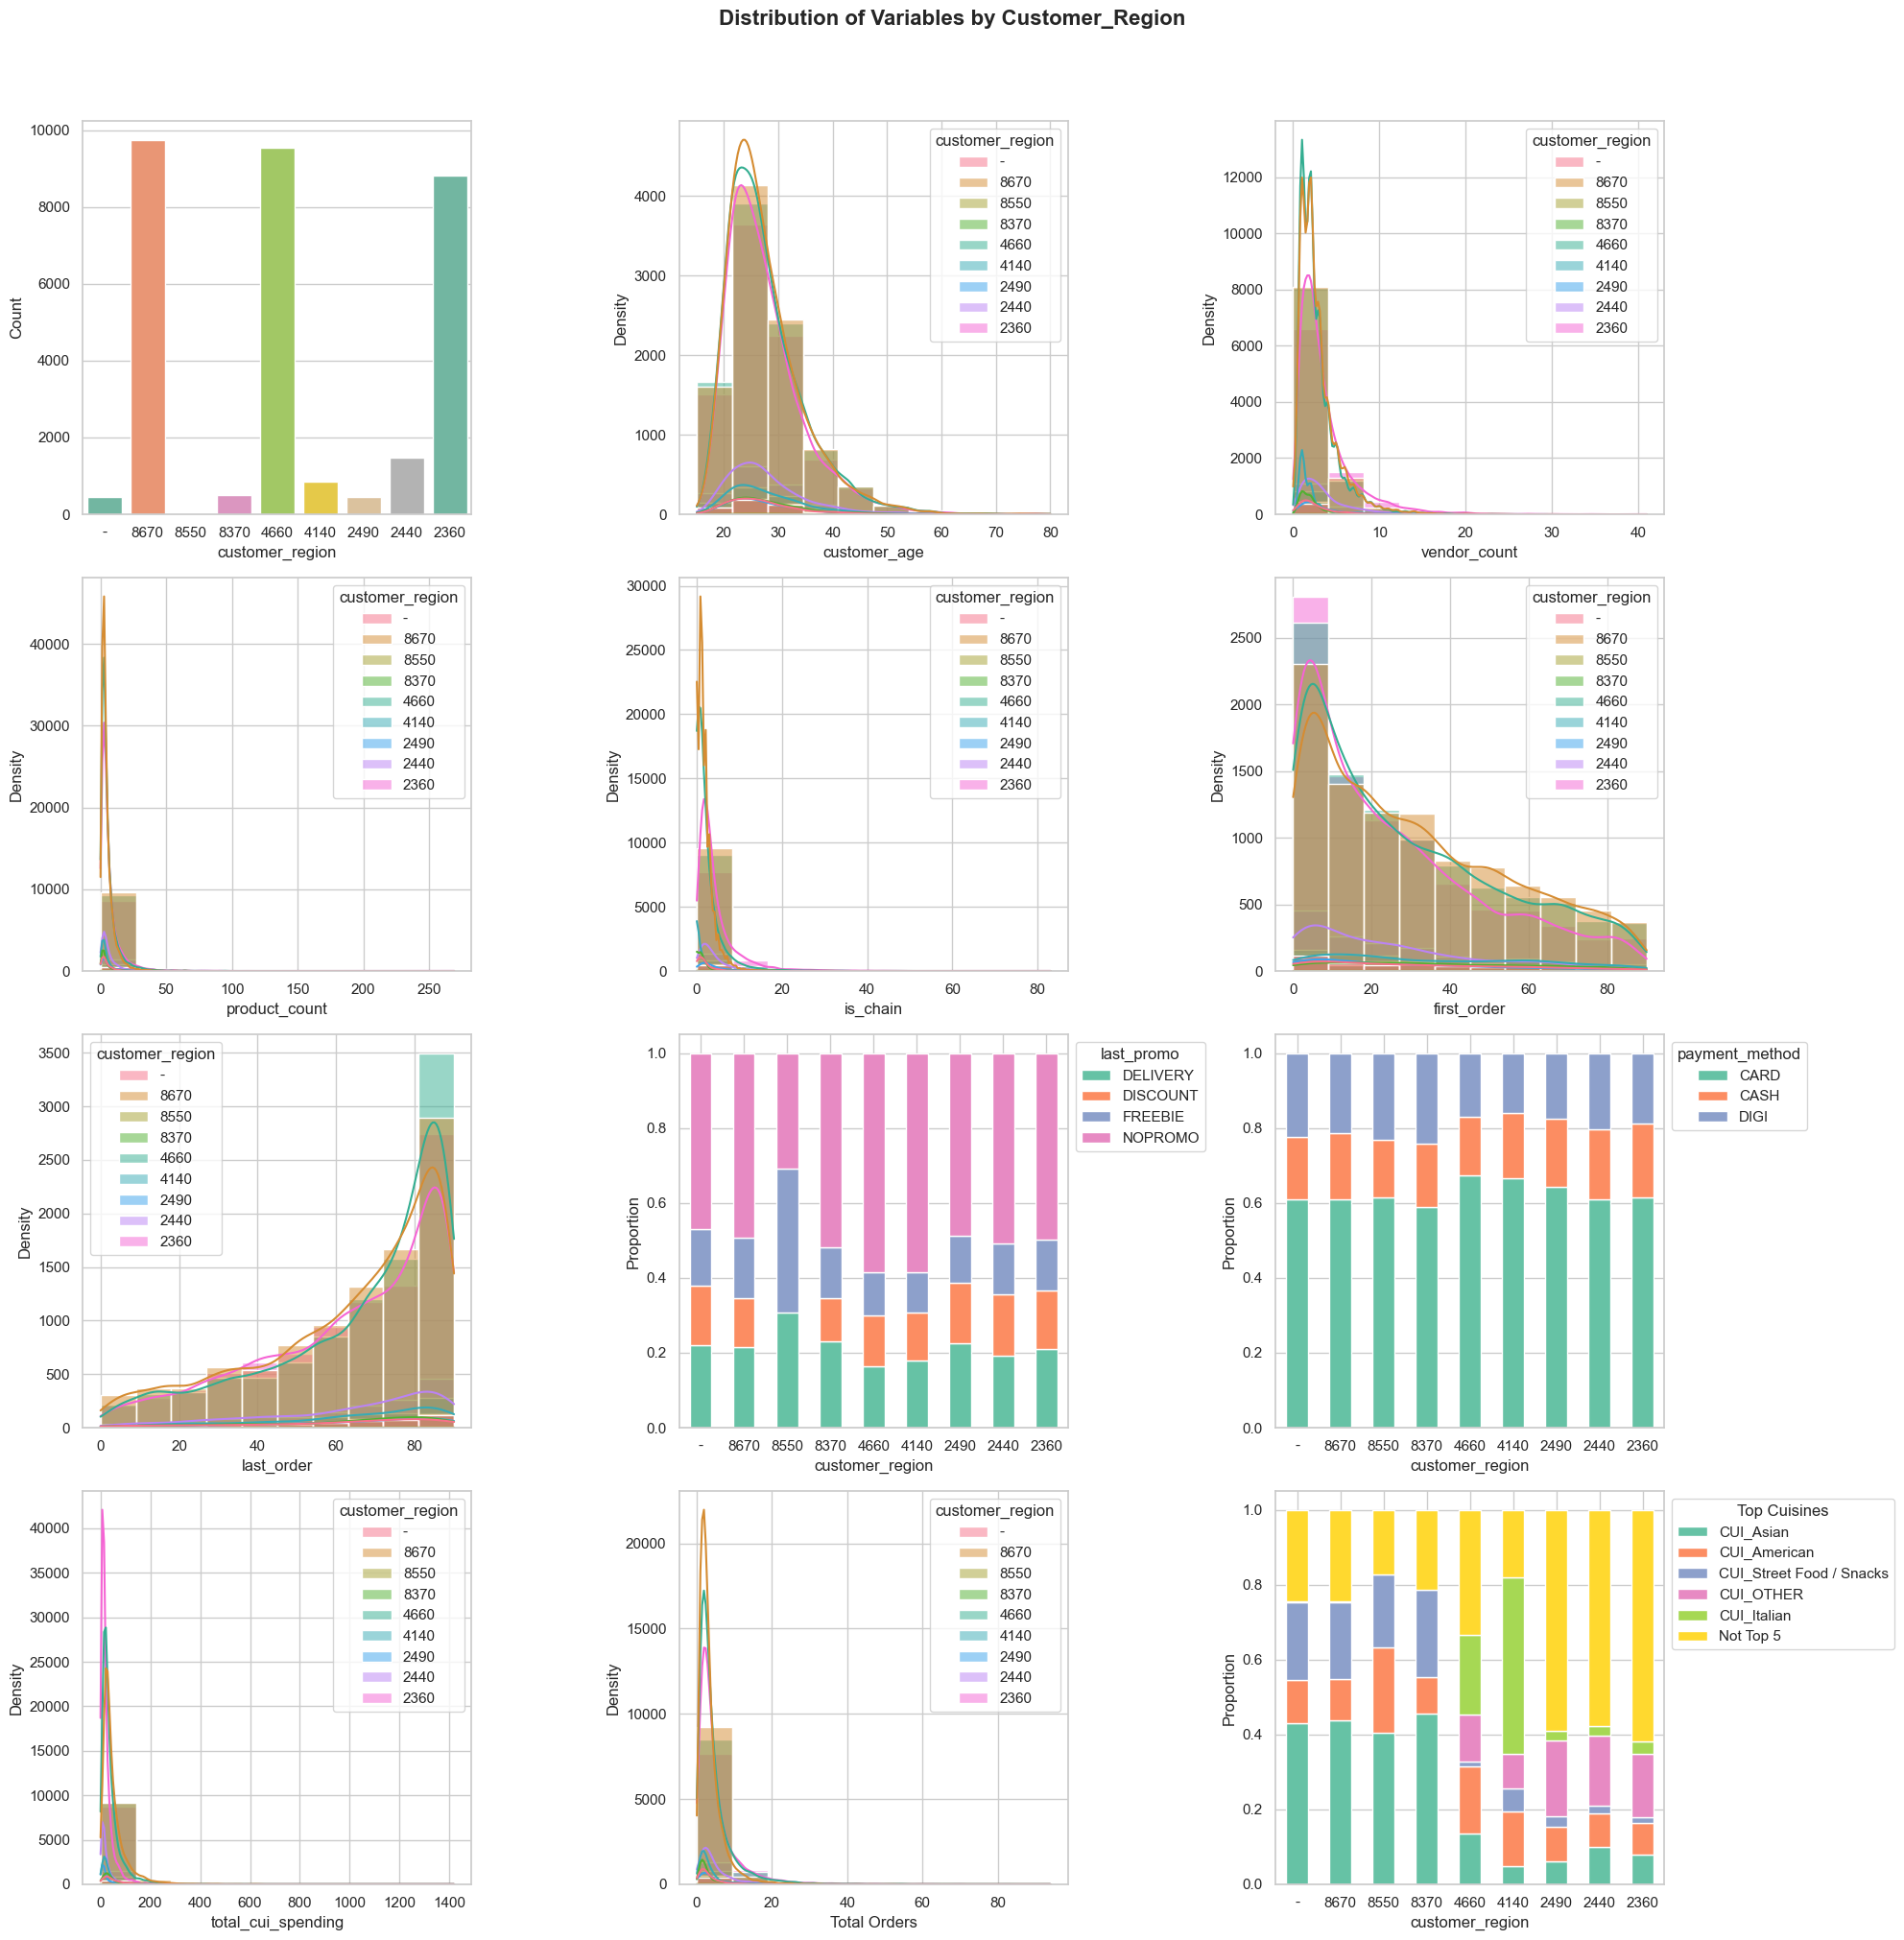

In [31]:
# For customer_region
# This function is defined in main.py
plot_grouped_distributions(df_treat_missing, group_by_variable='customer_region', color_palette=color_palette)

**Conclusion:** After analyzing the plots, it appears that customer region values with similar prefixes indicate geographical proximity, as they exhibit similar behavior and statistics. This observation aligns with the project description, which notes that the data was collected from three cities. 

1. **Group 1:**
   - 8670
   - 8550
   - 8370

2. **Group 2:**
   - 4660
   - 4140

3. **Group 3:**
   - 2490
   - 2440
   - 2360

Additionally, the customer region represented by `"-"` shares more similarities with the regions `8670` and `8370`. 

**Next steps:** The next step is to identify the customer region that is most similar to `"-"` (`8670` or `8370`).

In [32]:
cui_columns

['CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai']

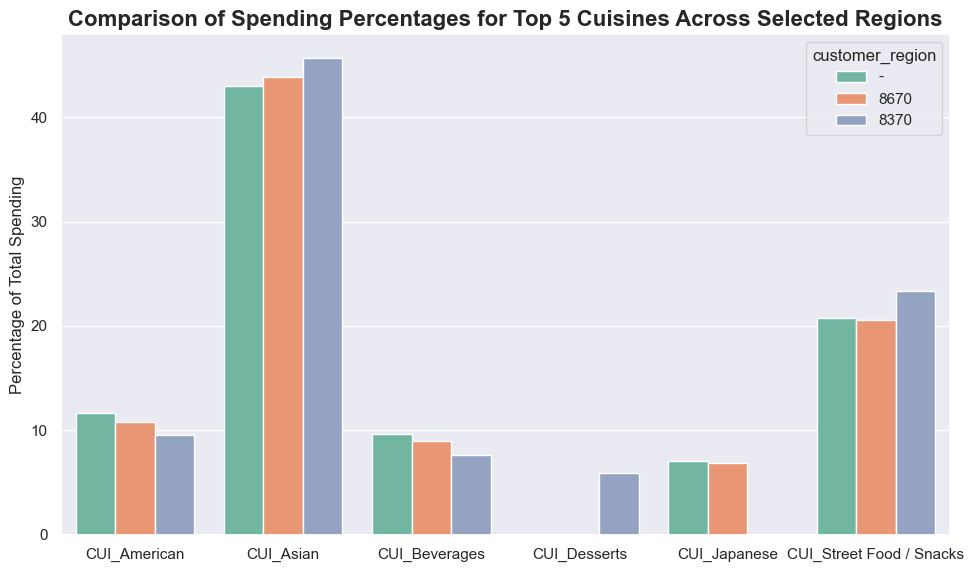

In [33]:
# Set seaborn style and color palette
sns.set_theme()
sns.set_palette(color_palette)  # Consistent color palette across all plots

# Define relevant regions
regions = ['-', '8670', '8370']

# Filter DataFrame for the selected regions
df_selected = df_treat_missing[df_treat_missing['customer_region'].isin(regions)]

# Sum spending for each cuisine type per region
region_spending = df_selected.groupby('customer_region')[cui_columns].sum()

# Calculate total spending percentages for each cuisine type by region
region_percentages = region_spending.div(region_spending.sum(axis=1), axis=0) * 100

# Create a comparison DataFrame for the top 5 cuisines per region
top_cuisine_percentages = {}

for region in regions:
    top_cuisines = region_spending.loc[region].nlargest(5).index
    top_percentages = region_percentages.loc[region, top_cuisines]
    top_cuisine_percentages[region] = top_percentages

# Convert to DataFrame
comparison_df = pd.DataFrame(top_cuisine_percentages).reset_index().melt(id_vars='index', var_name='customer_region', value_name='percentage')

# Plot the top 5 cuisine spending percentages by region
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='index', y='percentage', hue='customer_region', palette=color_palette, alpha=1.0)
plt.title('Comparison of Spending Percentages for Top 5 Cuisines Across Selected Regions', fontsize=16, weight='bold')
plt.ylabel('Percentage of Total Spending')
plt.xlabel('')
plt.xticks(rotation=0, ha='center')
plt.legend(title='customer_region', bbox_to_anchor=(1, 1))

# Layout and display
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

The visualization suggests that customers from the empty region `-` are geographically close to those in region `8670`. Therefore, we will reassign the region for all customers classified under `-` to `8670`.

**Note:** In the future, we will use KNN to replace the values represented by "-" with the mode of the nearest neighbors.

In [34]:
df_treat_missing['customer_region'].replace('-', '8670', inplace=True)

> ### Missing values in **customer_age**


In [35]:
# Calculate percentage of missing values in "customer_age"
perc_missing_customer_age = (df_treat_missing["customer_age"].isna().sum() / len(df_treat_missing) * 100).round(2)

# Print percentage of missing values
print(f"{perc_missing_customer_age}%")

2.28%


In [36]:
nan_age = df_treat_missing[df_treat_missing['customer_age'].isna()]
nan_age[metric_features_excluding_cui_dow_and_hr].describe().round(2).T

count   mean    std   min    25%    50%    75%     max
customer_age          0.0    NaN    NaN   NaN    NaN    NaN    NaN     NaN
vendor_count        727.0   3.17   2.58  1.00   1.00   2.00   4.00   18.00
product_count       727.0   5.95   6.99  1.00   2.00   4.00   7.00   68.00
is_chain            727.0   3.00   3.96  0.00   1.00   2.00   4.00   43.00
first_order         725.0  27.51  23.74  0.00   7.00  21.00  43.00   89.00
last_order          727.0  65.17  22.37  0.00  51.00  72.00  83.50   90.00
total_cui_spending  727.0  40.38  50.11  1.14  13.39  24.72  44.27  606.84
total_orders        727.0   4.57   5.14  1.00   2.00   3.00   5.00   53.00

In [37]:
nan_age.describe(include='object').T

count unique      top freq
customer_region   727      7     2360  220
last_promo        727      4  NOPROMO  412
payment_method    727      3     CARD  463

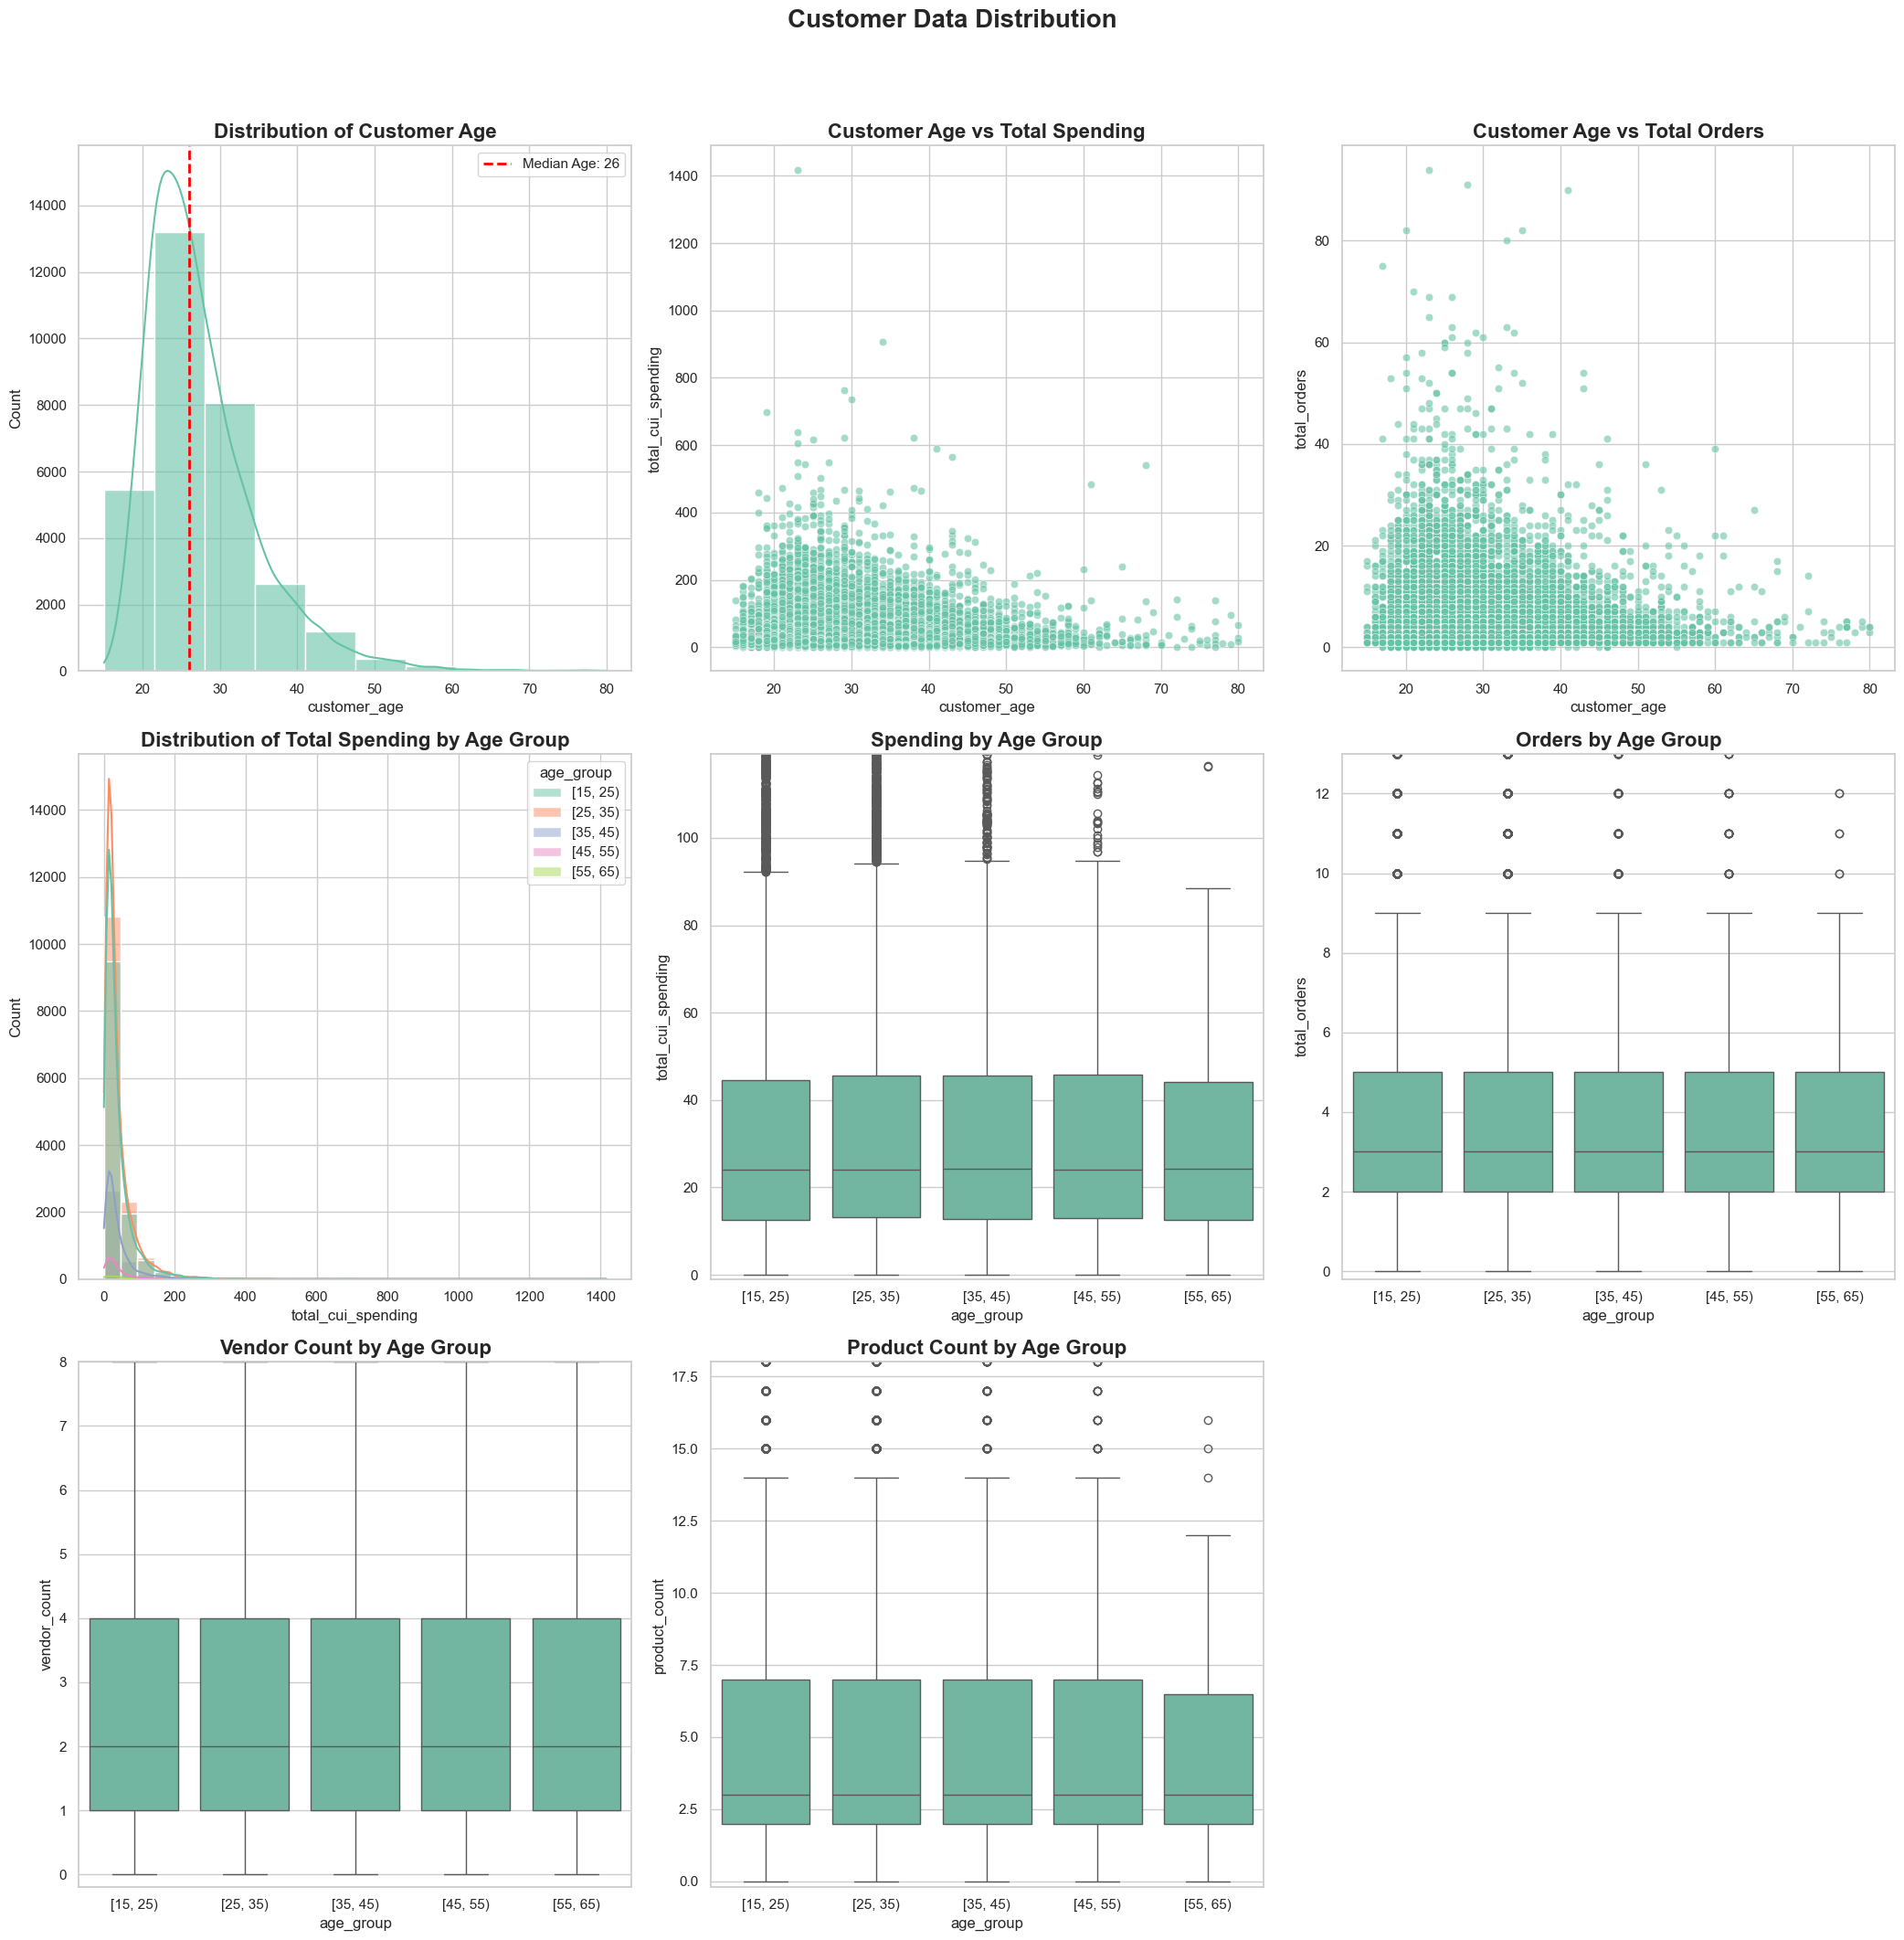

In [38]:
# For customer_age
# This function is defined in main.py
plot_customer_distributions(
    df_treat_missing,
    age_column='customer_age',
    spending_column='total_cui_spending',
    orders_column='total_orders',
    vendor_column='vendor_count',
    product_column='product_count',
    color_palette=color_palette
)

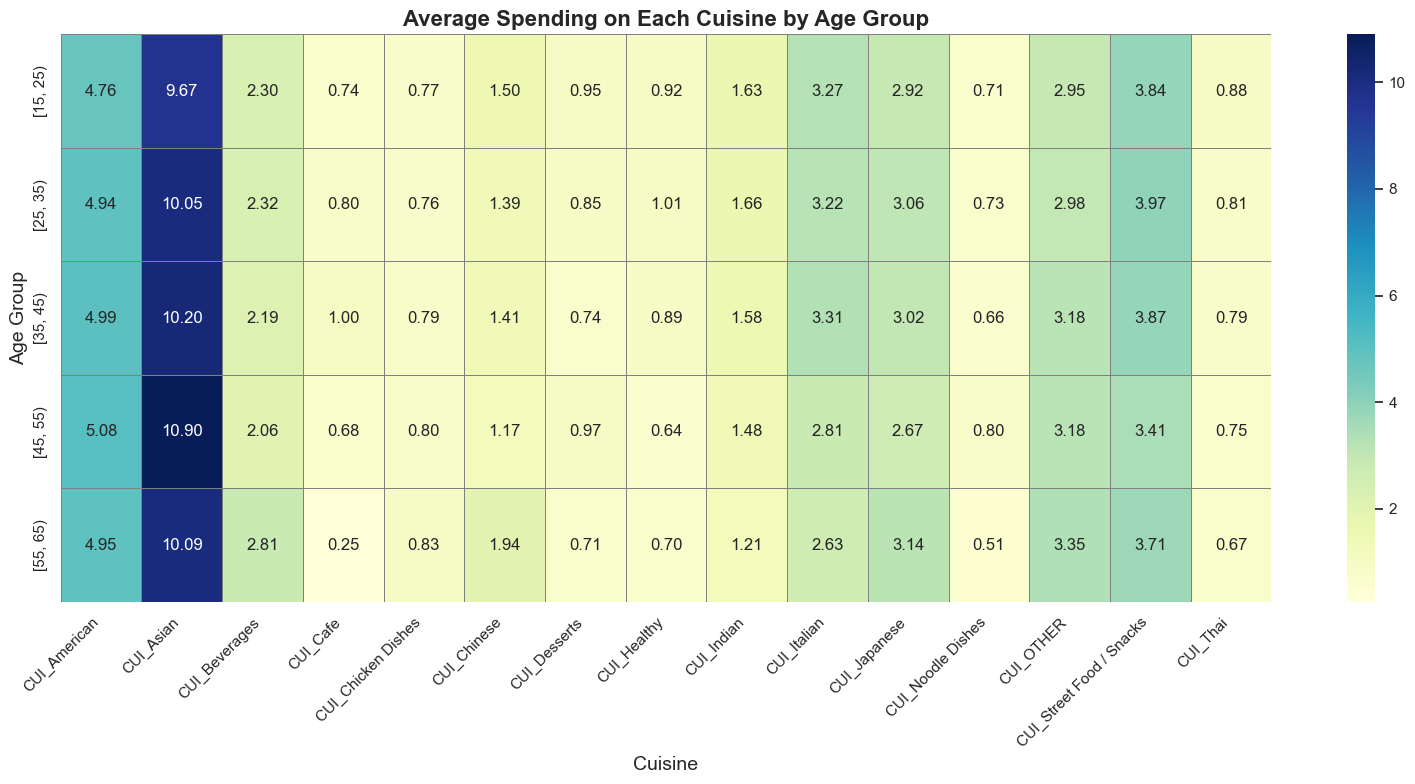

In [39]:
# Create a heatmap for every cusine type by age group

# calculate the median spending for each age group in 5 year bins Create a new column with age group bins
spending_behavoiur = pd.DataFrame(pd.cut(
    df_treat_missing['customer_age'], 
    bins=range(15, 66, 10),  # Bins from 0 to 100 in 5-year increments
    right=False  # Exclude the rightmost edge for bin intervals
))


# add the total spending column to the dataframe for each customer
spending_behavoiur['total_cui_spending'] = df_treat_missing['total_cui_spending']
# add total_orders column to the dataframe for each customer
spending_behavoiur['total_orders'] = df_treat_missing['total_orders']
# add vendor_count and product_count columns to the dataframe 
spending_behavoiur['vendor_count'] = df_treat_missing['vendor_count']
spending_behavoiur['product_count'] = df_treat_missing['product_count']

# cui variables for spending_behavoiur
cui_columns = df_treat_missing.filter(like="CUI_").columns.tolist()

spending_behavoiur[cui_columns] = df_treat_missing[cui_columns]
#  Remove rows with NaN in 'customer_age' (in case 'customer_age' was NaN)
spending_behaviour = spending_behavoiur.dropna(subset=['customer_age'])

# Group by 'customer_age' and calculate the mean spending on each cuisine
average_cuisine_spending = spending_behaviour.groupby('customer_age')[cui_columns].mean().reset_index()

# Convert 'customer_age' intervals to strings for better visualization
average_cuisine_spending['customer_age'] = average_cuisine_spending['customer_age'].astype(str)

# Melt the DataFrame to long format for seaborn heatmap
average_cuisine_spending_melted = average_cuisine_spending.melt(
    id_vars='customer_age',
    var_name='cuisine',
    value_name='average_spending'
)

# Pivot the DataFrame to create a matrix suitable for heatmap
heatmap_data = average_cuisine_spending_melted.pivot(
    index='customer_age',
    columns='cuisine',
    values='average_spending'
)

# Sort the age groups in order (optional)
heatmap_data = heatmap_data.sort_index()

# Set the figure size for better readability
plt.figure(figsize=(16, 8))

# Create the heatmap
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap='YlGnBu',
    linewidths=.5,
    linecolor='gray'
)

# Customize the plot
plt.title('Average Spending on Each Cuisine by Age Group', fontsize=16, weight='bold')
plt.xlabel('Cuisine', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()

The visualization suggests:
* the Age of our customer is mostly 50 or less.
* that the spending and total orders in each customer group is very similiar distributed.
* Product count and vendor count is similiar distributed accross age

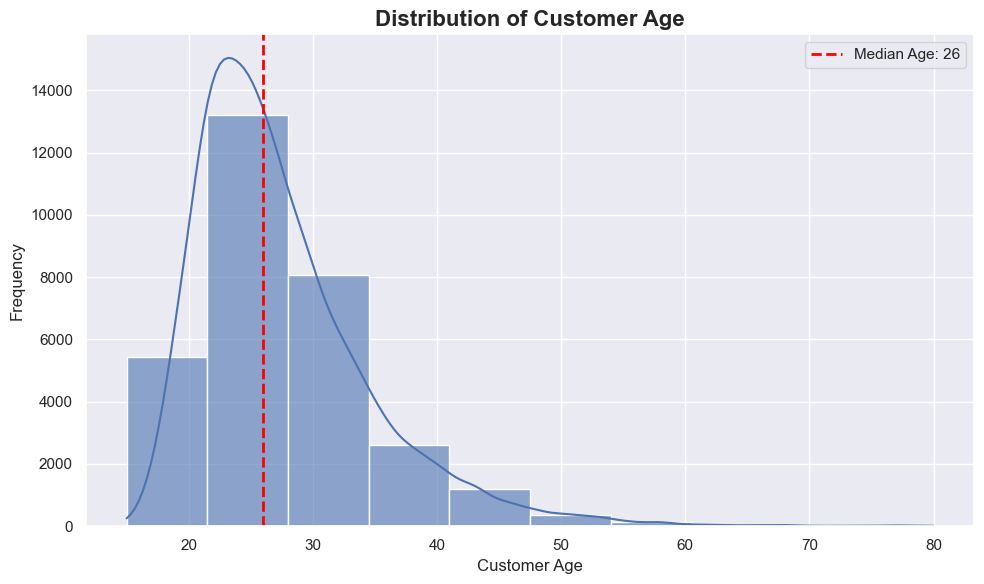

In [40]:
# Set seaborn style
sns.set()

# Assuming 'df_treat_missing' contains the relevant data and 'customer_age' is one of the columns
plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(df_treat_missing['customer_age'], bins=10, kde=True, alpha=0.6)

# Calculate the median age and add a vertical line
median_age = df_treat_missing['customer_age'].median()
plt.axvline(median_age, color='red', linestyle='--', linewidth=2, label=f'Median Age: {round(median_age)}')

# Set titles and labels
plt.title('Distribution of Customer Age', fontsize=16, weight='bold')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
# Calculate the number of rows removed due to duplicates and missing values
rows_removed_due_to_duplicates_and_missing = len(df_no_hr0) - len(df_treat_missing)

# Calculate the percentage of rows removed
percent_rows_removed_due_to_duplicates_and_missing = rows_removed_due_to_duplicates_and_missing / len(df_no_hr0) * 100

# Calculate the number of values imputed
values_imputed = df_no_duplicates.isna().sum().sum() - df_treat_missing.isna().sum().sum()
percent_values_imputed = (values_imputed / df_treat_missing.size) * 100

# Print the results
print(f"Rows removed due to duplicates and missing values: {rows_removed_due_to_duplicates_and_missing} ({round(percent_rows_removed_due_to_duplicates_and_missing, 2)}%)")
print(f"Values imputed due to duplicates and missing data: {values_imputed} ({round(percent_values_imputed, 2)}%)")

Rows removed due to duplicates and missing values: 60 (0.19%)
Values imputed due to duplicates and missing data: 0 (0.0%)


**Conclusion:** The analysis of descriptive statistics for the relevant variables revealed no significant standout features. With only 2.28% of data missing, we will impute the missing customer ages using the median (the median is robust to outliers and provides a more accurate reflection of a typical value, especially in skewed distributions).

In [42]:
df_treat_missing['customer_age'].fillna(median_age, inplace=True)

**Future:** Try with KNN

In [43]:
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# # Make a copy of the dataframe
# df_kNN_impute = df_treat_missing.copy()

# # Store the original index
# original_index = df_kNN_impute.index

# # Get categorical columns
# categorical_columns = df_kNN_impute.select_dtypes(include=['object', 'category']).columns.tolist()

# # Dictionary to store label encoders
# label_encoders = {}

# # Encode categorical variables
# for col in categorical_columns:
#     # Convert categorical column to string type first
#     df_kNN_impute[col] = df_kNN_impute[col].astype(str)
    
#     # Replace 'nan' strings with 'MISSING'
#     df_kNN_impute[col] = df_kNN_impute[col].replace('nan', 'MISSING')
    
#     le = LabelEncoder()
#     df_kNN_impute[col] = le.fit_transform(df_kNN_impute[col])
#     label_encoders[col] = le

# # Scale numerical columns
# numerical_columns = df_kNN_impute.select_dtypes(include=['int64', 'float64']).columns.tolist()
# scaler = StandardScaler()
# df_kNN_impute[numerical_columns] = scaler.fit_transform(df_kNN_impute[numerical_columns])

# # Initialize and fit KNN imputer
# imputer = KNNImputer(n_neighbors=5)
# imputed_array = imputer.fit_transform(df_kNN_impute)

# # Convert back to dataframe with original index
# df_imputed = pd.DataFrame(imputed_array, columns=df_kNN_impute.columns, index=original_index)

# # Inverse transform numerical columns
# df_imputed[numerical_columns] = scaler.inverse_transform(df_imputed[numerical_columns])

# # Inverse transform categorical columns
# for col in categorical_columns:
#     df_imputed[col] = label_encoders[col].inverse_transform(df_imputed[col].astype(int))
#     # If the original column was categorical, convert back to category type
#     if df_treat_missing[col].dtype.name == 'category':
#         df_imputed[col] = pd.Categorical(df_imputed[col], perspectives=df_treat_missing[col].cat.perspectives)

# # Now let's compare the values before and after imputation
# print("Original missing values:", df_treat_missing['customer_age'].isna().sum())
# print("Remaining missing values:", df_imputed['customer_age'].isna().sum())

# # Get the original indices where customer_age was NaN
# nan_indices = df_treat_missing[df_treat_missing['customer_age'].isna()].index

# # Create a comparison DataFrame
# comparison_df = pd.DataFrame({
#     'Original': df_treat_missing['customer_age'][nan_indices],
#     'Imputed': df_imputed['customer_age'][nan_indices]
# })

# # Round imputed values to 2 decimal places for better readability
# comparison_df['Imputed'] = comparison_df['Imputed'].round(2)

# # Show the comparison
# print("\nComparison of NaN values before and after imputation:")
# print(comparison_df)

# df_treat_missing['customer_age'] = df_imputed['customer_age']

> ### Missing values in **first_order**


In [44]:
# Calculate percentage of missing values in "first_order"
perc_missing_first_order = (df_treat_missing["first_order"].isna().sum() / len(df_treat_missing) * 100).round(2)

# Print percentage of missing values
print(f"{perc_missing_first_order}%")

0.33%


In [45]:
nan_first_order = df_treat_missing[df_treat_missing['first_order'].isna()]
nan_first_order[metric_features_excluding_cui_dow_and_hr].describe().round(2).T

count   mean    std   min    25%    50%    75%     max
customer_age        106.0  28.75   7.42  18.0  23.00  27.50  32.00   60.00
vendor_count        106.0   1.02   0.14   1.0   1.00   1.00   1.00    2.00
product_count       106.0   1.31   0.72   1.0   1.00   1.00   1.75    7.00
is_chain            106.0   0.57   0.52   0.0   0.00   1.00   1.00    2.00
first_order           0.0    NaN    NaN   NaN    NaN    NaN    NaN     NaN
last_order          106.0   0.00   0.00   0.0   0.00   0.00   0.00    0.00
total_cui_spending  106.0  14.23  12.41   1.0   6.14  12.08  18.84  105.55
total_orders        106.0   1.02   0.14   1.0   1.00   1.00   1.00    2.00

In [46]:
nan_first_order.describe(include='object').T

count unique       top freq
customer_region   106      6      8670   50
last_promo        106      4  DELIVERY   37
payment_method    106      3      CARD   44

In [47]:
# Filter the DataFrame based on 'vendor_count' condition
filtered_nan_first_order = nan_first_order[nan_first_order['total_orders'] != 1]

# Select the relevant features the DataFrame
filtered_nan_first_order[metric_features_excluding_cui_dow_and_hr + dow_columns].T

customer_id         1f9cd0d268  c3690a6fa1
customer_age             30.00       27.00
vendor_count              2.00        2.00
product_count             2.00        7.00
is_chain                  2.00        1.00
first_order                NaN         NaN
last_order                0.00        0.00
total_cui_spending        4.08      105.55
total_orders              2.00        2.00
DOW_0                     0.00        0.00
DOW_1                     0.00        0.00
DOW_2                     0.00        0.00
DOW_3                     0.00        0.00
DOW_4                     0.00        0.00
DOW_5                     0.00        0.00
DOW_6                     2.00        2.00

In [48]:
# Calculate the percentage of those customers in the DataFrame
percentage_filtered = len(filtered_nan_first_order) / len(df_treat_missing) * 100

# Print percentage
print(f"Filtered customers make up {round(percentage_filtered, 2)}% of the dataset.")

Filtered customers make up 0.01% of the dataset.


**Conclusion:** Since most customers with missing first_order data have last_order = 0 and total_orders = 1, we know they placed only one order on the first day of the dataset. Therefore, we can confidently impute first_order as 0 for these cases.

For the two customers with total_orders = 2, while they placed their orders on DOW_6 with two vendors, it’s possible that these orders occurred across different Saturdays. Given this minor ambiguity affects only 0.01% of the data, we can remove these cases without significantly impacting the dataset’s integrity.

In [49]:
# Update `first_order` with `last_order` for all customers with missing `first_order`
df_treat_missing.loc[nan_first_order.index, 'first_order'] = df_treat_missing.loc[nan_first_order.index, 'last_order']

# Identify customers, with missing `first_order`, where `total_orders` is different than 1
customers_to_remove = nan_first_order[nan_first_order['total_orders'] != 1].index

# Drop the two customers with missing `first_order` and `total_orders` different than 1
df_treat_missing.drop(index=customers_to_remove, inplace=True)

> ### Missing values conclusion


In [50]:
df_treat_missing.isna().sum().sum()

0

In [51]:
# Calculate the number of rows removed due to missing values
rows_removed_due_to_missing = len(df_no_duplicates) - len(df_treat_missing)

print()

# Calculate the percentage of rows removed
percent_rows_removed_due_to_missing = rows_removed_due_to_missing / len(df_no_duplicates) * 100

# Calculate the number of values imputed
values_imputed = df_no_duplicates.isna().sum().sum() - df_treat_missing.isna().sum().sum()
percent_values_imputed = (values_imputed / df_treat_missing.size) * 100

# Print the results
print(f"Rows removed due to missing values: {rows_removed_due_to_missing} ({round(percent_rows_removed_due_to_missing, 2)}%)")
print(f"Values imputed due to missing data: {values_imputed} ({round(percent_values_imputed, 2)}%)")


Rows removed due to missing values: 2 (0.01%)
Values imputed due to missing data: 833 (0.05%)


In [52]:
# Calculate the number of rows removed due to duplicates and missing values
rows_removed_due_to_duplicates_and_missing = len(df_no_hr0) - len(df_treat_missing)

# Calculate the percentage of rows removed
percent_rows_removed_due_to_duplicates_and_missing = rows_removed_due_to_duplicates_and_missing / len(df_no_hr0) * 100

# Calculate the number of values imputed
values_imputed = df_no_duplicates.isna().sum().sum() - df_treat_missing.isna().sum().sum()
percent_values_imputed = (values_imputed / df_treat_missing.size) * 100

# Print the results
print(f"Rows removed due to duplicates and missing values: {rows_removed_due_to_duplicates_and_missing} ({round(percent_rows_removed_due_to_duplicates_and_missing, 2)}%)")
print(f"Values imputed due to duplicates and missing data: {values_imputed} ({round(percent_values_imputed, 2)}%)")

Rows removed due to duplicates and missing values: 62 (0.19%)
Values imputed due to duplicates and missing data: 833 (0.05%)


> ## 4.4. Data Types <a class="anchor" id="data_types"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

In [53]:
df_adjust_dtypes = df_treat_missing.copy()
df_adjust_dtypes.dtypes

customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                         int64
DOW_3                       

**Notes:**
- age: should be integer
- first order: is number of days so should also be integer

In [54]:
# Using "Int64" allows for the representation of NaN values alongside integers
df_adjust_dtypes["customer_age"] = df_adjust_dtypes["customer_age"].astype("Int64")
df_adjust_dtypes["first_order"] = df_adjust_dtypes["first_order"].astype("Int64")

> ## 4.5. Coherence Checking <a class="anchor" id="coherence_checking"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

> ### 4.5.1. Minors Customers <a class="anchor" id="sub_section_4_5_1"></a>

In [55]:
df_inconsistencies = df_adjust_dtypes.copy()

Verify if there are minor customers (should not exist, because they are not allowed to placed orders online)

In [56]:
# Check the age distribution
df_inconsistencies["customer_age"].describe()

count      31826.0
mean     27.473858
std       7.085639
min           15.0
25%           23.0
50%           26.0
75%           31.0
max           80.0
Name: customer_age, dtype: Float64

In [57]:
# Count customers under 18
minor_customers = df_inconsistencies[df_inconsistencies["customer_age"] < 18]
perc_minor_customers = len(minor_customers) / len(df_inconsistencies) * 100

print(f"Number of customers under 18 years old: {len(minor_customers)} ({round(perc_minor_customers, 2)}%)")

# Show descriptive statistics
minor_customers[metric_features_excluding_cui_dow_and_hr].describe().round(2).T

Number of customers under 18 years old: 365 (1.15%)


count   mean    std   min    25%    50%   75%     max
customer_age        365.0  16.68   0.57  15.0   16.0   17.0  17.0    17.0
vendor_count        365.0   2.97   2.53   0.0    1.0    2.0   4.0    18.0
product_count       365.0   5.35   6.73   0.0    2.0    3.0   6.0    75.0
is_chain            365.0   2.76    5.1   0.0    1.0    1.0   3.0    75.0
first_order         365.0  29.16  23.73   0.0   10.0   23.0  46.0    89.0
last_order          365.0  62.57  23.85   1.0   48.0   69.0  83.0    90.0
total_cui_spending  365.0  34.53  35.72   0.0  11.96  23.19  41.2  205.54
total_orders        365.0   4.24   5.79   0.0    1.0    3.0   5.0    75.0

In [58]:
minor_customers.describe(include="object")

customer_region last_promo payment_method
count              365        365            365
unique               7          4              3
top               8670    NOPROMO           CARD
freq               112        194            228

**Conclusion:** Since only 1.15% of customers in the dataset are minors, who are not legally permitted to place online orders, we can remove these entries. Excluding minors from the dataset will improve the accuracy and relevance of our analysis for the target demographic.

In [59]:
# Remove customers under 18 from the dataset
df_inconsistencies = df_inconsistencies[df_inconsistencies["customer_age"] >= 18]

> ### 4.5.2. Last_order and First_order consistency <a class="anchor" id="sub_section_4_5_2"></a>

Verify that last_order is lower than or equal to first_order for each customer

In [60]:
# Drop rows with missing values in "first_order" ("last_order" has no missing values)
data_cleaned = df_inconsistencies.dropna(subset="first_order")

# Check when "last_order" is greater than "first_order"
is_last_order_lower = data_cleaned["last_order"] < data_cleaned["first_order"]

# Calculate the percentage of inconsistent rows based on the original dataframe
perc_inconsistencies = is_last_order_lower.sum() / len(df_inconsistencies) * 100

# Output the percentage of rows where "last_order" is greater than "first_order"
print(f"Inconsistent rows ('last_order' < 'first_order'): {perc_inconsistencies.round(2)}%")

Inconsistent rows ('last_order' < 'first_order'): 0.0%


> ### 4.5.3. CUI_Asian vs Chinese, Indian, Japanese, etc <a class="anchor" id="sub_section_4_5_3"></a>

The classification of restaurants into broad and specific cuisine perspectives ('CUI_Asian' alongside 'CUI_Asian', 'CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_Thai') could lead to inconsistencies and overlaps in data. Some restaurants may be categorized under both a broad category ('CUI_Asian') and a specific one (e.g., 'CUI_Chinese'), while others might only fall under the broader classification. This double classification could result in redundancy, making it challenging to analyze customer preferences and spending habits accurately.

To explore this issue, we can analyze the following:

- Correlation Analysis: How strongly correlated are the specific categories with the broader CUI_Asian category?
- Frequency of Overlap: How often do entries fall under both CUI_Asian and specific categories?

In [61]:
cui_columns

['CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai']

In [62]:
# Define the cuisine categories to analyze
asian_cui = ['CUI_Asian', 'CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_Thai']

# Create a binary DataFrame indicating whether there is spending on each cuisine
cuisine_presence = df_inconsistencies[asian_cui].gt(0).astype(int)

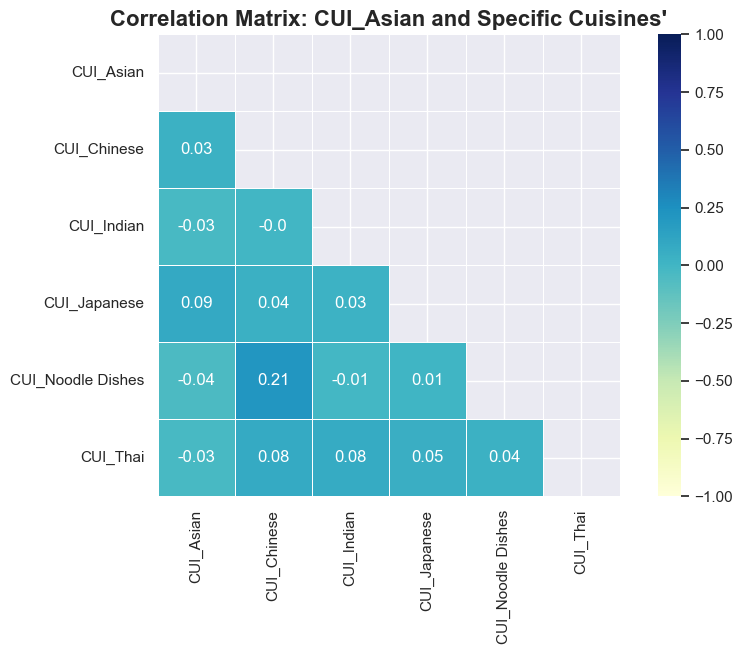

In [63]:
# Function created in main.py to plot the correlation heatmap
df_inconsistencies_corr = df_inconsistencies[asian_cui].corr(method="pearson").round(3)

# Plot correlation matrix
plot_matrix(
    df_inconsistencies_corr, 
    title="Correlation Matrix: CUI_Asian and Specific Cuisines'",
    threshold=0.0, figsize=(10, 6)
)

In [64]:
# Count the number of entries with spending on each specific cuisine and CUI_Asian
overlap_counts = cuisine_presence[cuisine_presence['CUI_Asian'] == 1].sum()

# Create a comparison DataFrame with overlap counts and total non-zero counts for each specific cuisine
comparison_df = pd.DataFrame({
    'Overlap_Count': overlap_counts[1:],  # Get overlap counts for specific cuisines
    'Non_Zero_Count': (cuisine_presence[asian_cui[1:]].sum()).values  # Sum for non-zero counts
})

# Calculate total spending for each cuisine
total_spending = df_inconsistencies[asian_cui].sum()

# Add total spending to the comparison DataFrame
comparison_df['Total_Spending'] = total_spending[1:]  # Total spending for specific cuisines

# Calculate the percentage spent on each specific cuisine relative to CUI_Asian spending in overlapping cases
cui_asian_spending = total_spending['CUI_Asian']
comparison_df['Overlap_Spending_Percentage'] = (comparison_df['Total_Spending'] / cui_asian_spending) * 100

# Calculate the proportion of overlap compared to total non-zero counts
comparison_df['Overlap_Count_Percentage'] = (comparison_df['Overlap_Count'] / comparison_df['Non_Zero_Count']) * 100

# Replace any potential division by zero with NaN for clarity
comparison_df['Overlap_Spending_Percentage'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
comparison_df['Overlap_Count_Percentage'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Sorting the DataFrame by Overlap_Count_Percentage in descending order
comparison_df.sort_values(by='Overlap_Count_Percentage', ascending=False, inplace=True)

# Display the improved DataFrame
comparison_df[['Overlap_Count_Percentage', 'Overlap_Spending_Percentage']].round(2)

Overlap_Count_Percentage  Overlap_Spending_Percentage
CUI_Japanese                          40.67                        30.08
CUI_Chinese                           36.89                        14.35
CUI_Thai                              30.20                         8.44
CUI_Noodle Dishes                     27.78                         7.19
CUI_Indian                            26.24                        16.32

In [65]:
# List of Asian cuisine columns to compare with CUI_Asian
asian_cui = ['CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_Thai']

# Initialize a dictionary to store matching entries for each cuisine
matching_entries = {}

# Loop through each cuisine in asian_cui and find rows where the value matches CUI_Asian and both are non-zero
for cuisine in asian_cui:
    matches = df_inconsistencies[(df_inconsistencies[cuisine] == df_inconsistencies['CUI_Asian']) &
                                 (df_inconsistencies[cuisine] != 0)]
    # Store the matching values of CUI_Asian, the specific cuisine, and total_orders in the dictionary
    matching_entries[cuisine] = matches[['CUI_Asian', cuisine, 'total_orders']]

# Display the matching values for each cuisine with total_orders
for cuisine, values in matching_entries.items():
    print(f"Values of {cuisine} and CUI_Asian where they are equal and non-zero, with Total Orders:")
    print(values)
    print("\n")

Values of CUI_Chinese and CUI_Asian where they are equal and non-zero, with Total Orders:
             CUI_Asian  CUI_Chinese  total_orders
customer_id                                      
c97280b5af        6.34         6.34             5


Values of CUI_Indian and CUI_Asian where they are equal and non-zero, with Total Orders:
Empty DataFrame
Columns: [CUI_Asian, CUI_Indian, total_orders]
Index: []


Values of CUI_Japanese and CUI_Asian where they are equal and non-zero, with Total Orders:
             CUI_Asian  CUI_Japanese  total_orders
customer_id                                       
3d98e75f8a       19.02         19.02             2
85e24db1d8       19.32         19.32             3


Values of CUI_Noodle Dishes and CUI_Asian where they are equal and non-zero, with Total Orders:
Empty DataFrame
Columns: [CUI_Asian, CUI_Noodle Dishes, total_orders]
Index: []


Values of CUI_Thai and CUI_Asian where they are equal and non-zero, with Total Orders:
Empty DataFrame
Columns: [CUI_As

Only 3 entries have 100% overlapping between Cui_asian and one of the other asian cuisines

In [66]:
# List of specific Asian cuisines
specific_cuisines = asian_cui[1:]

# Create an auxiliary DataFrame from the original
auxiliary_df = df_inconsistencies.copy()

# Calculate total spending for specific cuisines in the auxiliary DataFrame
auxiliary_df['Total_Specific_Cuisines'] = auxiliary_df[specific_cuisines].sum(axis=1)

# Check if the totals match (CUI_Asian from original DataFrame)
auxiliary_df['CUI_Match'] = auxiliary_df['CUI_Asian'] == auxiliary_df['Total_Specific_Cuisines']

# Display rows where the sums do not match
mismatched_entries = auxiliary_df[~auxiliary_df['CUI_Match']]

# Calculate the percentage of mismatched entries
mismatched_percentage = len(mismatched_entries) / len(auxiliary_df) * 100

# Output the results including percentage
print(f"Found {len(mismatched_entries)} ({mismatched_percentage:.2f}%) mismatched entries.")

mismatched_entries[['CUI_Asian', 'Total_Specific_Cuisines']].head()

Found 19650 (62.46%) mismatched entries.


CUI_Asian  Total_Specific_Cuisines
customer_id                                    
1b8f824d5e        0.00                    28.88
180c632ed8       13.70                    17.86
4eb37a6705       40.87                     0.00
6aef2b6726       24.92                     0.00
84775a7237       32.48                     0.00

**Conclusion:** The analysis revealed 20,792 mismatched entries, representing approximately 66.09% of the dataset. This substantial discrepancy indicates inconsistencies in the categorization of restaurants. Specifically, some restaurants are classified solely under the broad category of CUI_Asian, while others are tagged under both CUI_Asian and one or more specific cuisine categories. Therefore, mismatched entries don't necessarily indicate an error but rather a complex categorization approach that requires careful interpretation.

> ### 4.5.4. Sum DOWs vs sum HRs <a class="anchor" id="sub_section_4_5_4"></a>

Check that the sum of orders by day (DOW_0 to DOW_6) matches the total number of orders from hourly data (HR_1 to HR_23)

In [67]:
# Sum of DOW columns
dow_sum = df_inconsistencies[dow_columns].sum(axis=1)

# Sum of HR columns
hr_sum = df_inconsistencies[hr_columns].sum(axis=1)

# Calculate the absolute difference between the sums of DOW and HR columns
sums_diff = (dow_sum - hr_sum).abs()

# Calculate the percentage of inconsistent rows (for printing purposes)
perc_rows_inconsistencies = (sums_diff > 0).mean() * 100

# Calculate the percentage of rows for each unique difference value
diff_counts = sums_diff.value_counts(normalize=True).sort_index() * 100

# Calculate the cumulative percentage
cumulative_percentage = diff_counts.cumsum()

# Create a DataFrame to display the percentage of rows with each deviation and cumulative percentages
results_df = pd.DataFrame({
    'Rows (%)': diff_counts.round(2),
    'Cumulative Rows (%)': cumulative_percentage.round(2)
})

# Set the index to the deviation (difference between DOW and HR sums)
results_df.index.name = 'Deviation (dow_sum - hr_sum)'

# Print the results with descriptions
print(f"Percentage of inconsistent rows: {perc_rows_inconsistencies.round(2)}%")

print("\nPercentage of differences between DOW and HR sums:")
results_df

Percentage of inconsistent rows: 3.66%

Percentage of differences between DOW and HR sums:


Rows (%)  Cumulative Rows (%)
Deviation (dow_sum - hr_sum)                               
0                                96.34                96.34
1                                 2.94                99.28
2                                 0.50                99.77
3                                 0.12                99.90
4                                 0.05                99.95
5                                 0.03                99.97
6                                 0.01                99.98
7                                 0.00                99.98
8                                 0.00                99.98
9                                 0.01                99.99
11                                0.00                99.99
12                                0.00               100.00
15                                0.00               100.00

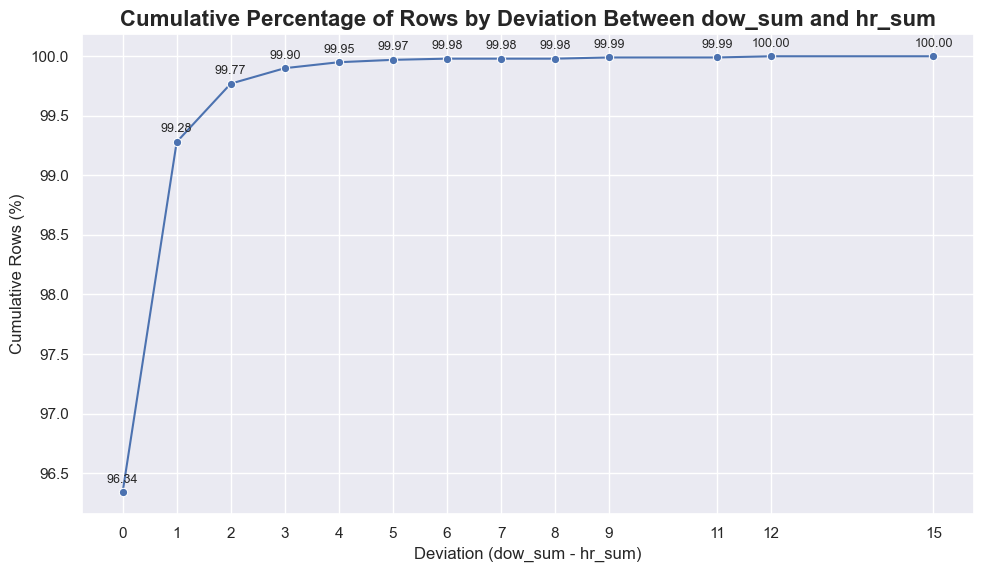

In [68]:
# Set seaborn style and color palette to match previous visualizations
sns.set_theme()

# Data for Deviation and Cumulative Rows Percentage
deviations = results_df.index  # Deviation (dow_sum - hr_sum)
cumulative_rows = results_df['Cumulative Rows (%)']  # Cumulative Rows (%)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=deviations, y=cumulative_rows, marker='o', color='b')

# Titles and labels
plt.title("Cumulative Percentage of Rows by Deviation Between dow_sum and hr_sum", fontsize=16, weight='bold')
plt.xlabel("Deviation (dow_sum - hr_sum)", fontsize=12)
plt.ylabel("Cumulative Rows (%)", fontsize=12)

# Improve x-axis ticks to show all deviation values
plt.xticks(ticks=deviations)

# Add value labels on top of each point for clarity
for x, y in zip(deviations, cumulative_rows):
    plt.text(x, y + 0.08, f"{y:.2f}", ha='center', fontsize=9)

# Grid for better readability
plt.grid(True)

# Layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Show the plot
plt.show()

Proposed approach to handle these inconsistencies:

Small Inconsistencies (1-2 Orders):
- Carefully investigate patterns or potential causes, as these inconsistencies make up the majority of the discrepancies
- If no clear pattern is found, we will consider creating an aggregate feature (e.g., total_orders) that captures the sum of orders from either DOW or HR columns, to ensure consistency

Large Inconsistencies (3+ Orders):
- Investigate these cases in more detail to identify any potential issues
- If no clear pattern is found, we will remove these rows to maintain data integrity without heavily impacting the analysis, as they represent a small portion of the dataset

Lets analyze the small inconsistencies

In [69]:
# Rows where the sums are inconsistent
df_small_inconsistencies = df_inconsistencies[(sums_diff == 1) | (sums_diff == 2)]

# Get summary statistics of the inconsistent rows
df_small_inconsistencies.describe().T

count       mean        std   min      25%     50%  \
customer_age              1082.0  27.550832   6.795799  18.0     23.0    26.0   
vendor_count              1082.0   4.841959   3.831798   1.0      2.0     4.0   
product_count             1082.0   9.050832   8.815521   1.0      3.0     6.0   
is_chain                  1082.0   4.160813   4.877028   0.0      1.0     3.0   
first_order               1082.0  21.192237  20.284608   0.0      5.0    15.0   
last_order                1082.0  69.334566   20.69958   0.0     60.0    77.0   
CUI_American              1082.0   9.212957  16.338077   0.0      0.0     0.0   
CUI_Asian                 1082.0  25.599316  42.303767   0.0      0.0   6.175   
CUI_Beverages             1082.0   3.746414  11.355755   0.0      0.0     0.0   
CUI_Cafe                  1082.0   0.874917   8.588138   0.0      0.0     0.0   
CUI_Chicken Dishes        1082.0   1.208438   5.388364   0.0      0.0     0.0   
CUI_Chinese               1082.0   2.878031  15.855365   0.0      0.0     0.0   
CUI_Desserts              1082.0   2.104094   8.329954   0.0      0.0     0.0   
CUI_Healthy               1082.0   0.930388   5.551173   0.0      0.0     0.0   
CUI_Indian                1082.0   1.621497   7.405256   0.0      0.0     0.0   
CUI_Italian               1082.0   1.970092    7.69192   0.0      0.0     0.0   
CUI_Japanese              1082.0   2.917172   8.723222   0.0      0.0     0.0   
CUI_Noodle Dishes         1082.0   1.446183   6.597475   0.0      0.0     0.0   
CUI_OTHER                 1082.0   2.193133   7.502775   0.0      0.0     0.0   
CUI_Street Food / Snacks  1082.0   8.620277  26.686445   0.0      0.0     0.0   
CUI_Thai                  1082.0   0.667782   4.199407   0.0      0.0     0.0   
DOW_0                     1082.0   0.943623   1.344314   0.0      0.0     1.0   
DOW_1                     1082.0   0.865989   1.283053   0.0      0.0     0.0   
DOW_2                     1082.0   0.891867   1.268835   0.0      0.0     1.0   
DOW_3                     1082.0   0.944547   1.345384   0.0      0.0     1.0   
DOW_4                     1082.0   0.960259   1.264798   0.0      0.0     1.0   
DOW_5                     1082.0   1.004621   1.269793   0.0      0.0     1.0   
DOW_6                     1082.0   1.113678   1.452618   0.0      0.0     1.0   
HR_1                      1082.0   0.323475   0.760242   0.0      0.0     0.0   
HR_2                      1082.0   0.251386   0.797558   0.0      0.0     0.0   
HR_3                      1082.0   0.257856    0.67124   0.0      0.0     0.0   
HR_4                      1082.0   0.207024   0.576784   0.0      0.0     0.0   
HR_5                      1082.0   0.158041   0.482799   0.0      0.0     0.0   
HR_6                      1082.0   0.131238    0.49546   0.0      0.0     0.0   
HR_7                      1082.0   0.136784   0.488305   0.0      0.0     0.0   
HR_8                      1082.0   0.186691   0.673462   0.0      0.0     0.0   
HR_9                      1082.0   0.292976   0.836343   0.0      0.0     0.0   
HR_10                     1082.0   0.371534   0.873414   0.0      0.0     0.0   
HR_11                     1082.0   0.385397   0.965783   0.0      0.0     0.0   
HR_12                     1082.0   0.323475   0.804005   0.0      0.0     0.0   
HR_13                     1082.0   0.273567    0.69956   0.0      0.0     0.0   
HR_14                     1082.0   0.246765   0.640243   0.0      0.0     0.0   
HR_15                     1082.0   0.189464   0.578812   0.0      0.0     0.0   
HR_16                     1082.0   0.218115   0.639817   0.0      0.0     0.0   
HR_17                     1082.0   0.224584    0.66804   0.0      0.0     0.0   
HR_18                     1082.0   0.257856   0.780817   0.0      0.0     0.0   
HR_19                     1082.0   0.243068   0.713989   0.0      0.0     0.0   
HR_20                     1082.0   0.224584   0.654046   0.0      0.0     0.0   
HR_21                     1082.0   0.175601   0.590266   0

In [70]:
# Get statistics of the small inconsistent rows (for categorical variables)
df_small_inconsistencies.describe(include="object")

customer_region last_promo payment_method
count             1082       1082           1082
unique               8          4              3
top               8670    NOPROMO           CARD
freq               565        636            769

In [71]:
df_small_inconsistencies.head().T

customer_id              ae38da6386 a21a839c77 9237d23413 8c6ffd7357  \
customer_region                8670       4140       8670       4660   
customer_age                     21         19         22         25   
vendor_count                      2          1          3          3   
product_count                     3          4          4          4   
is_chain                          1          4          2          1   
first_order                       0          0          0          0   
last_order                        7         21         27         28   
last_promo                 DELIVERY    NOPROMO    NOPROMO    NOPROMO   
payment_method                 DIGI       CARD       CARD       CARD   
CUI_American                    0.0        0.0       5.77      27.54   
CUI_Asian                      23.7        0.0      17.76        0.0   
CUI_Beverages                   0.0        0.0        5.9        0.0   
CUI_Cafe                        0.0        0.0        0.0        0.0   
CUI_Chicken Dishes              0.0        0.0        0.0        0.0   
CUI_Chinese                   12.08        0.0        0.0        0.0   
CUI_Desserts                    0.0        0.0        0.0        0.0   
CUI_Healthy                     0.0        0.0        0.0        0.0   
CUI_Indian                      0.0        0.0        0.0        0.0   
CUI_Italian                     0.0        0.0        0.0        6.1   
CUI_Japanese                    0.0        0.0        0.0        0.0   
CUI_Noodle Dishes               0.0        0.0        0.0        0.0   
CUI_OTHER                       0.0        0.0        0.0        0.0   
CUI_Street Food / Snacks        0.0      22.09        0.0        0.0   
CUI_Thai                        0.0        0.0        0.0        0.0   
DOW_0                             0          0          0          0   
DOW_1                             0          0          1          0   
DOW_2                             0          0          0          0   
DOW_3                             0          0          0          0   
DOW_4                             0          0          0          0   
DOW_5                             0          0          1          0   
DOW_6                             2          4          2          3   
HR_1                              0          1          1          1   
HR_2                              0          0          0          0   
HR_3                              0          0          1          0   
HR_4                              0          0          0          0   
HR_5                              0          0          0          0   
HR_6                              0          0          0          0   
HR_7                              0          0          0          0   
HR_8                              0          0          0          0   
HR_9                              0          0          0          0   
HR_10                             0          0          0          0   
HR_11                             1          0          1          0   
HR_12                             0          0          0          0   
HR_13                             0          0          0          0   
HR_14                             0          0          0          0   
HR_15                             0          0          0          1   
HR_16                             0          0          0          0   
HR_17                             0          0          0          0   
HR_18                             0          0          0          0   
HR_19                             0          1          0          0   
HR_20                             0          0          0          0   
HR_21                             0          0          0          0   
HR_22                             0          1          0          0   
HR_23                             0          0          0          0   
total_cui_spending            35.78     

**Conclusion:** Small Inconsistencies (1-2 Orders): No clear pattern was found, so we will consider creating an aggregate feature (e.g., total_orders) that captures the sum of orders from either DOW or HR columns, to ensure consistency

Lets analyze the large inconsistencies

In [72]:
# Rows where the sums are inconsistent
df_large_inconsistencies = df_inconsistencies[sums_diff > 2]

# Get summary statistics of the inconsistent rows
df_large_inconsistencies.describe().T

count        mean         std   min     25%     50%  \
customer_age              71.0   28.323944    8.304516  18.0    23.0    26.0   
vendor_count              71.0    8.704225    6.463954   1.0     4.0     7.0   
product_count             71.0   21.422535   16.982901   3.0    10.0    16.0   
is_chain                  71.0   10.352113   12.499256   0.0     3.5     7.0   
first_order               71.0   13.394366   15.411942   0.0     2.0     7.0   
last_order                71.0   79.774648   12.819848  17.0    78.0    85.0   
CUI_American              71.0   12.309296   19.677266   0.0     0.0    2.76   
CUI_Asian                 71.0   69.410282   85.238303   0.0     0.0   42.79   
CUI_Beverages             71.0   11.100423   25.747199   0.0     0.0     0.0   
CUI_Cafe                  71.0    0.734085    5.885195   0.0     0.0     0.0   
CUI_Chicken Dishes        71.0    3.129718   13.224926   0.0     0.0     0.0   
CUI_Chinese               71.0    4.136479    9.061432   0.0     0.0     0.0   
CUI_Desserts              71.0    3.117887   11.755189   0.0     0.0     0.0   
CUI_Healthy               71.0     3.47662   10.389688   0.0     0.0     0.0   
CUI_Indian                71.0    2.076761    8.153713   0.0     0.0     0.0   
CUI_Italian               71.0    1.034789    4.300799   0.0     0.0     0.0   
CUI_Japanese              71.0   12.350704   28.564318   0.0     0.0     0.0   
CUI_Noodle Dishes         71.0    3.151127    7.821359   0.0     0.0     0.0   
CUI_OTHER                 71.0    5.323803   13.264705   0.0     0.0     0.0   
CUI_Street Food / Snacks  71.0   20.214507   49.359146   0.0     0.0     0.0   
CUI_Thai                  71.0    0.951127    4.057674   0.0     0.0     0.0   
DOW_0                     71.0     2.28169    2.217998   0.0     1.0     2.0   
DOW_1                     71.0    2.507042    2.709102   0.0     1.0     2.0   
DOW_2                     71.0    2.478873    2.377629   0.0     1.0     2.0   
DOW_3                     71.0     2.43662    2.352703   0.0     1.0     2.0   
DOW_4                     71.0         2.0    1.874643   0.0     1.0     2.0   
DOW_5                     71.0    2.112676     2.47588   0.0     0.5     1.0   
DOW_6                     71.0    2.267606    3.047049   0.0     0.5     1.0   
HR_1                      71.0    1.056338    1.351056   0.0     0.0     1.0   
HR_2                      71.0     0.43662    0.906049   0.0     0.0     0.0   
HR_3                      71.0    0.338028    0.716014   0.0     0.0     0.0   
HR_4                      71.0    0.732394    1.756276   0.0     0.0     0.0   
HR_5                      71.0    0.295775    0.641301   0.0     0.0     0.0   
HR_6                      71.0    0.239437    0.620249   0.0     0.0     0.0   
HR_7                      71.0    0.183099    0.515748   0.0     0.0     0.0   
HR_8                      71.0    0.394366    0.819039   0.0     0.0     0.0   
HR_9                      71.0    0.521127     1.05369   0.0     0.0     0.0   
HR_10                     71.0    0.802817    1.591223   0.0     0.0     0.0   
HR_11                     71.0    1.366197    4.431186   0.0     0.0     0.0   
HR_12                     71.0    0.661972    1.557871   0.0     0.0     0.0   
HR_13                     71.0    0.450704    1.052734   0.0     0.0     0.0   
HR_14                     71.0    0.295775    0.618624   0.0     0.0     0.0   
HR_15                     71.0    0.169014    0.446763   0.0     0.0     0.0   
HR_16                     71.0    0.169014    0.506696   0.0     0.0     0.0   
HR_17                     71.0    0.380282    1.427948   0.0     0.0     0.0   
HR_18                     71.0    0.408451    1.449901   0.0     0.0     0.0   
HR_19                     71.0    0.422535    1.359222   0.0     0.0     0.0   
HR_20                     71.0    0.521127    1.984649   0.0     0.0     0.0   
HR_21                     71.0    0.295775    1.175881   0.0     0.0     0.0   
HR_22                    

In [73]:
# Get statistics of the small inconsistent rows (for categorical variables)
df_large_inconsistencies.describe(include="object")

customer_region last_promo payment_method
count               71         71             71
unique               6          4              3
top               8670    NOPROMO           CARD
freq                43         48             52

In [74]:
df_large_inconsistencies.head().T

customer_id              eb4664b1ac 2fb255fc89 0077c28499 4e3c4b0af3  \
customer_region                2490       8670       8670       8670   
customer_age                     39         29         29         23   
vendor_count                      5          7         30         10   
product_count                    31         30         64         26   
is_chain                         25         18         17         14   
first_order                       0          0          0          0   
last_order                       69         79         81         87   
last_promo                  NOPROMO    NOPROMO    NOPROMO   DELIVERY   
payment_method                 CARD       CARD       CARD       CARD   
CUI_American                    0.0      43.19      30.24       5.93   
CUI_Asian                       0.0      238.1     186.51       5.74   
CUI_Beverages                 53.24        0.0      54.65       1.66   
CUI_Cafe                       2.56        0.0        0.0        0.0   
CUI_Chicken Dishes              0.0        0.0        0.0        0.0   
CUI_Chinese                    1.01        0.0        0.0        0.0   
CUI_Desserts                    0.0        0.0        0.0        0.0   
CUI_Healthy                     0.0        0.0      36.65        0.0   
CUI_Indian                      0.0        0.0        0.0        0.0   
CUI_Italian                     0.0        0.0        0.0        0.0   
CUI_Japanese                    0.0      49.91     182.49      49.06   
CUI_Noodle Dishes             12.37        0.0        0.0        0.0   
CUI_OTHER                       0.0        0.0        0.0        0.0   
CUI_Street Food / Snacks        0.0        0.0      130.5     155.75   
CUI_Thai                      18.75        0.0        0.0        0.0   
DOW_0                             0          3          4          2   
DOW_1                             1          2         10          6   
DOW_2                             1          1          5          4   
DOW_3                             3          2          7          3   
DOW_4                             3          2          9          3   
DOW_5                            10          1         10          2   
DOW_6                             7          7          1          1   
HR_1                              4          2          3          1   
HR_2                              0          0          1          0   
HR_3                              0          1          3          0   
HR_4                              0          0         10          3   
HR_5                              0          1          2          2   
HR_6                              0          0          3          1   
HR_7                              0          1          2          0   
HR_8                              0          0          4          0   
HR_9                              1          0          5          0   
HR_10                             2          5          4          0   
HR_11                             5          3          1          2   
HR_12                             1          0          1          4   
HR_13                             1          0          0          1   
HR_14                             2          0          0          0   
HR_15                             0          0          0          1   
HR_16                             0          0          0          0   
HR_17                             1          0          0          0   
HR_18                             1          0          0          0   
HR_19                             1          0          0          0   
HR_20                             1          0          0          0   
HR_21                             0          0          0          0   
HR_22                             0          0          0          0   
HR_23                             2          0          2          2   
total_cui_spending            87.93     

**Conclusion:** Large Inconsistencies (3+ Orders): No clear pattern was found, so let's remove these rows

In [75]:
# Remove ows with inconsistencies greater than 2
df_inconsistencies = df_inconsistencies[~(sums_diff > 2)]

> ### 4.5.7. Total orders inconsistencies <a class="anchor" id="sub_section_4_5_7"></a>
Check for entries with total_order = 0

In [76]:
total_orders_zero = df_inconsistencies[df_inconsistencies['total_orders'] == 0]

# Calculate the percentage of inconsistent rows
perc_inconsistent_rows = len(total_orders_zero) / len(df_inconsistencies) * 100

# Display results
print(f"Number of inconsistent rows: {len(total_orders_zero)} ({round(perc_inconsistent_rows, 2)}%)")

Number of inconsistent rows: 136 (0.43%)


In [77]:
df_inconsistencies = df_inconsistencies.drop(total_orders_zero.index)

> ### 4.5.5. Is_chain variable <a class="anchor" id="sub_section_4_5_5"></a>

In [78]:
df_inconsistencies["is_chain"].describe()

count    31254.000000
mean         2.813080
std          3.912736
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         83.000000
Name: is_chain, dtype: float64

* is_chain is described, in the metadata, as a boolean variable that indicates whether the customer’s order was from a chain restaurant.
     * This can't be true as one row describes one customer 
     * --> Hypothesis: Tracks the number of orders a customer placed from a chain restaurant

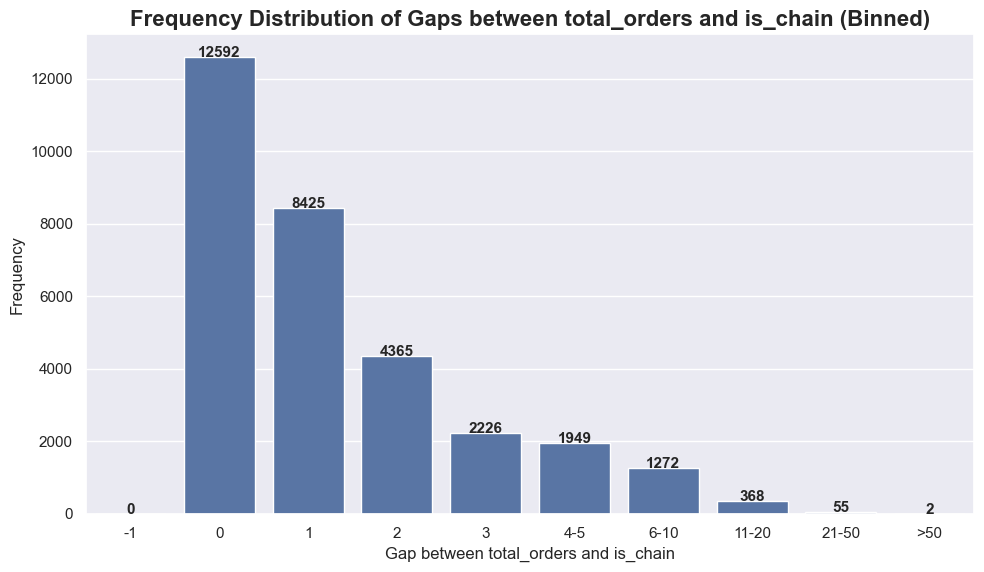

In [79]:
# Set seaborn style and color palette
sns.set_theme()

# create a new variable/series that tracks the the gap between total orders and is_chain
gap = df_inconsistencies['total_orders'] - df_inconsistencies['is_chain']

# Define bin edges and labels to cover a wider range of gaps more intuitively
bin_edges = [-float('inf'), -1, 0, 1, 2, 3, 5, 10, 20, 50, float('inf')]
bin_labels = ["-1", "0", "1", "2", "3", "4-5", "6-10", "11-20", "21-50", ">50"]

# Bin the data using pd.cut with the new edges and labels
gap_binned = pd.cut(gap, bins=bin_edges, labels=bin_labels)

# Create a DataFrame with the binned values and count occurrences
gap_val_binned = pd.DataFrame(gap_binned.value_counts().sort_index(), columns=['count'])
gap_val_binned.index.name = 'gap'

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=gap_val_binned.index, y=gap_val_binned['count'])

# Add value labels on top of each bar with a larger font size and a bit more space above each bar
for idx, value in enumerate(gap_val_binned['count']):
    plt.text(x=idx, y=value + 2, s=f"{value}", ha='center', fontsize=11, fontweight='bold')

# Set labels and title
plt.xlabel('Gap between total_orders and is_chain', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency Distribution of Gaps between total_orders and is_chain (Binned)', 
          fontsize=16, weight='bold')

# Layout and display
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

**Conclusion:** Based on our previous analysis, the variable "is_chain" appears to represent the number of orders a customer has placed from chain restaurants, considering the observed range and distribution of the gaps. To enhance our understanding of customer behavior, we will create a **new feature called chain_orders_prop**, which will capture the frequency of a customer’s orders from chain restaurants as a proportion of their total orders.

In [80]:
# Rename the column 'is_chain' to 'chain_orders'
df_inconsistencies.rename(columns={'is_chain': 'chain_orders'}, inplace=True)

In [81]:
# Redefine auxiliary variables, because "is_chain" was renamed to "chain_orders"

# Define metric and non-metric features
metric_features = df_inconsistencies.select_dtypes(include=['number']).columns.tolist()
non_metric_features = df_inconsistencies.select_dtypes(exclude=['number']).columns.tolist()

# Exclude DOW and HR (and CUI) columns from metric features
metric_features_excluding_dow_and_hr = [feat for feat in metric_features if feat not in dow_columns + hr_columns]
metric_features_excluding_cui_dow_and_hr = [feat for feat in metric_features if feat not in cui_columns + dow_columns + hr_columns]

Analyze cases where "chain_orders" is greater than "total_orders"

In [82]:
# Identify rows where chain_orders is greater than total_orders
inconsistencies = df_inconsistencies[df_inconsistencies['chain_orders'] > df_inconsistencies['total_orders']]

# Calculate the percentage of inconsistent rows
percentage_inconsistencies = len(inconsistencies) / len(df_inconsistencies) * 100

# Display the percentage of inconsistent rows
print(f"Rows where 'chain_orders' exceeds 'total_orders': {len(inconsistencies)} ({percentage_inconsistencies:.2f}%)")

# Display the inconsistent rows summary
inconsistencies[metric_features_excluding_cui_dow_and_hr].describe().round(2).T

Rows where 'chain_orders' exceeds 'total_orders': 0 (0.00%)


count  mean   std   min   25%   50%   75%   max
customer_age         0.0  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>
vendor_count         0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
product_count        0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
chain_orders         0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
first_order          0.0  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>
last_order           0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
total_cui_spending   0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
total_orders         0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN

**Conclusion:** We found 74 entries (0.24%) where chain_orders exceed total_orders. These records are customers who have not placed any orders in the last three months. Therefore, we can set their chain_orders to match total_orders, which is 0.

In [83]:
# Handle these observations, by setting "chain_orders" to "total_orders"
df_inconsistencies.loc[df_inconsistencies['chain_orders'] > df_inconsistencies['total_orders'], 'chain_orders'] = df_inconsistencies['total_orders']

> ### 4.5.6. Total Orders and Vendor Count consistency <a class="anchor" id="sub_section_4_5_6"></a>

Total Orders Consistency: The total number of orders placed (the sum of the DOW/HR columns) should not exceed the total number of products ordered (product_count).<br>

Vendor Count Consistency: The vendor_count should not exceed the number of unique products ordered, since each product should come from a vendor. This ensures that the recorded count of unique vendors matches the reality of product purchases.

In [84]:
# Calculate total orders based on DOW columns
total_orders = df_inconsistencies[dow_columns].sum(axis=1)

# Check if total orders are less than product count
inconsistent_orders = total_orders > df_inconsistencies['product_count']

# Check if vendor count exceeds product count
inconsistent_vendors = df_inconsistencies['vendor_count'] > df_inconsistencies['product_count']

# Combine both conditions to find all inconsistencies
inconsistencies_mask = inconsistent_orders | inconsistent_vendors

# Count the number of inconsistent rows
num_inconsistent_rows = inconsistencies_mask.sum()

# Calculate the percentage of inconsistent rows
perc_inconsistent_rows = num_inconsistent_rows / len(df_inconsistencies) * 100

# Display results
print(f"Number of inconsistent rows: {num_inconsistent_rows} ({perc_inconsistent_rows.round(2)}%)")

Number of inconsistent rows: 18 (0.06%)


Check if the rows with inconsistencies in orders and vendors are the same

In [85]:
# Check if the indices of both inconsistency sets are the same
inconsistent_rows_same = inconsistent_orders.index.equals(inconsistent_vendors.index)

# Step 2: Output the result
if inconsistent_rows_same:
    print("The rows with inconsistencies in orders and vendors are the same.")
else:
    print("There are differences in the rows with inconsistencies between orders and vendors.")

The rows with inconsistencies in orders and vendors are the same.


In [86]:
df_inconsistencies[inconsistencies_mask].head().T

customer_id              aed85972bb b2ebe2e6e0 6f723d9894 9d74f2ac81  \
customer_region                4660       4660       4660       4660   
customer_age                     27         43         36         27   
vendor_count                      1          1          1          1   
product_count                     0          0          0          0   
chain_orders                      0          0          0          0   
first_order                       6          6         13         19   
last_order                        6          6         13         19   
last_promo                 DISCOUNT    NOPROMO   DELIVERY   DELIVERY   
payment_method                 CARD       CARD       CASH       CARD   
CUI_American                    0.0        0.0        0.0        0.0   
CUI_Asian                       0.0        0.0        0.0        0.0   
CUI_Beverages                   0.0        0.0        0.0        0.0   
CUI_Cafe                        0.0        0.0        0.0        0.0   
CUI_Chicken Dishes              0.0        0.0        0.0        0.0   
CUI_Chinese                     0.0        0.0        0.0        0.0   
CUI_Desserts                    0.0        0.0        0.0        0.0   
CUI_Healthy                     0.0        0.0        0.0        0.0   
CUI_Indian                      0.0        0.0        0.0      19.03   
CUI_Italian                    2.56       6.74       7.77        0.0   
CUI_Japanese                    0.0        0.0        0.0        0.0   
CUI_Noodle Dishes               0.0        0.0        0.0        0.0   
CUI_OTHER                       0.0        0.0        0.0        0.0   
CUI_Street Food / Snacks        0.0        0.0        0.0        0.0   
CUI_Thai                        0.0        0.0        0.0        0.0   
DOW_0                             0          0          0          0   
DOW_1                             0          0          0          0   
DOW_2                             0          0          0          0   
DOW_3                             0          0          0          0   
DOW_4                             0          0          0          1   
DOW_5                             1          1          1          0   
DOW_6                             0          0          0          0   
HR_1                              0          0          0          0   
HR_2                              0          0          0          0   
HR_3                              0          0          0          0   
HR_4                              0          0          0          0   
HR_5                              0          0          0          0   
HR_6                              0          0          0          0   
HR_7                              0          0          0          0   
HR_8                              0          0          0          0   
HR_9                              0          0          0          0   
HR_10                             0          0          0          0   
HR_11                             0          0          0          0   
HR_12                             0          0          0          0   
HR_13                             0          0          0          0   
HR_14                             0          1          1          0   
HR_15                             0          0          0          0   
HR_16                             0          0          0          0   
HR_17                             0          0          0          1   
HR_18                             1          0          0          0   
HR_19                             0          0          0          0   
HR_20                             0          0          0          0   
HR_21                             0          0          0          0   
HR_22                             0          0          0          0   
HR_23                             0          0          0          0   
total_cui_spending             2.56     

In [87]:
# Remove rows with inconsistencies in total orders or vendor count
df_inconsistencies = df_inconsistencies[~inconsistencies_mask]

> ### 4.5.8. Total rows with inconsistencies <a class="anchor" id="sub_section_4_5_8"></a>
Final Step: Calculate the Percentage of Rows Removed Due to Inconsistencies

In [88]:
# Calculate the number of rows removed
rows_removed_inconsistencies = len(df_adjust_dtypes) - len(df_inconsistencies)
rows_removed_missing_and_inconsistencies = len(df_no_duplicates) - len(df_inconsistencies)

# Calculate the percentage of rows removed
percentage_removed_inconsistencies = rows_removed_inconsistencies / len(df_adjust_dtypes) * 100
percentage_removed_missing_and_inconsistencies = rows_removed_missing_and_inconsistencies / len(df_no_duplicates) * 100

# Output the result
print(f"Rows removed due to inconsistencies: {rows_removed_inconsistencies} ({round(percentage_removed_inconsistencies, 2)}%)")
print(f"Rows removed due to missing values and inconsistencies: {rows_removed_missing_and_inconsistencies} ({round(percentage_removed_missing_and_inconsistencies, 2)}%)")

Rows removed due to inconsistencies: 590 (1.85%)
Rows removed due to missing values and inconsistencies: 592 (1.86%)


**Conclusion:** We removed 454 rows (1.43%) due to inconsistencies (and an additional 2 rows due to missing values). This slight reduction in data maintains the overall integrity of the dataset, enhancing its reliability for analysis.

> ## 4.6. Visualizations <a class="anchor" id="visualizations"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

In this section, we’ll explore basic visualizations to better understand our data, such as the correlation matrix and pairplots between features. Note that we won’t take any action at this stage, like removing highly correlated features, as this will be addressed later in Topic 7: Feature Selection, after creating additional features.

Default colormaps from matplotlib: https://matplotlib.org/stable/users/explain/colors/colormaps.html

Matplotlib tutorials: https://matplotlib.org/stable/tutorials/index.html

Matplotlib gallery: https://matplotlib.org/stable/gallery/index.html

Seaborn tutorials: https://seaborn.pydata.org/tutorial.html

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

In [89]:
df_visualizations = df_inconsistencies.copy()

In [90]:
df_visualizations.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'chain_orders', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8',
       'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16',
       'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
       'total_cui_spending', 'total_orders'],
      dtype='object')

Now we will plot the correlation matrix.

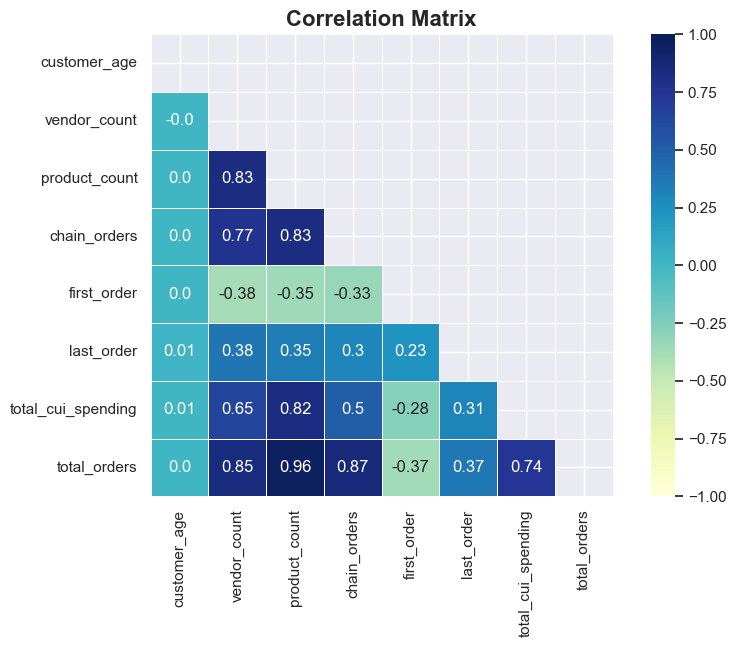

In [91]:
# Function created in main.py to plot the correlation heatmap
df_visualization_corr = df_visualizations[metric_features_excluding_cui_dow_and_hr].corr(method="pearson").round(3)

# Plot correlation matrix
plot_matrix(
    df_visualization_corr, 
    title="Correlation Matrix",
    threshold=0.0, figsize=(10, 6)
)

To complement the insights from the correlation matrix, we’ll also plot a pairplot for the metric features. This excludes the cuisine, day-of-week, and hour-specific features. Instead, we’ll use `total_orders` (a feature representing the sum of orders across days and hours) and `total_cui_spending` (the sum of spending across all cuisines).

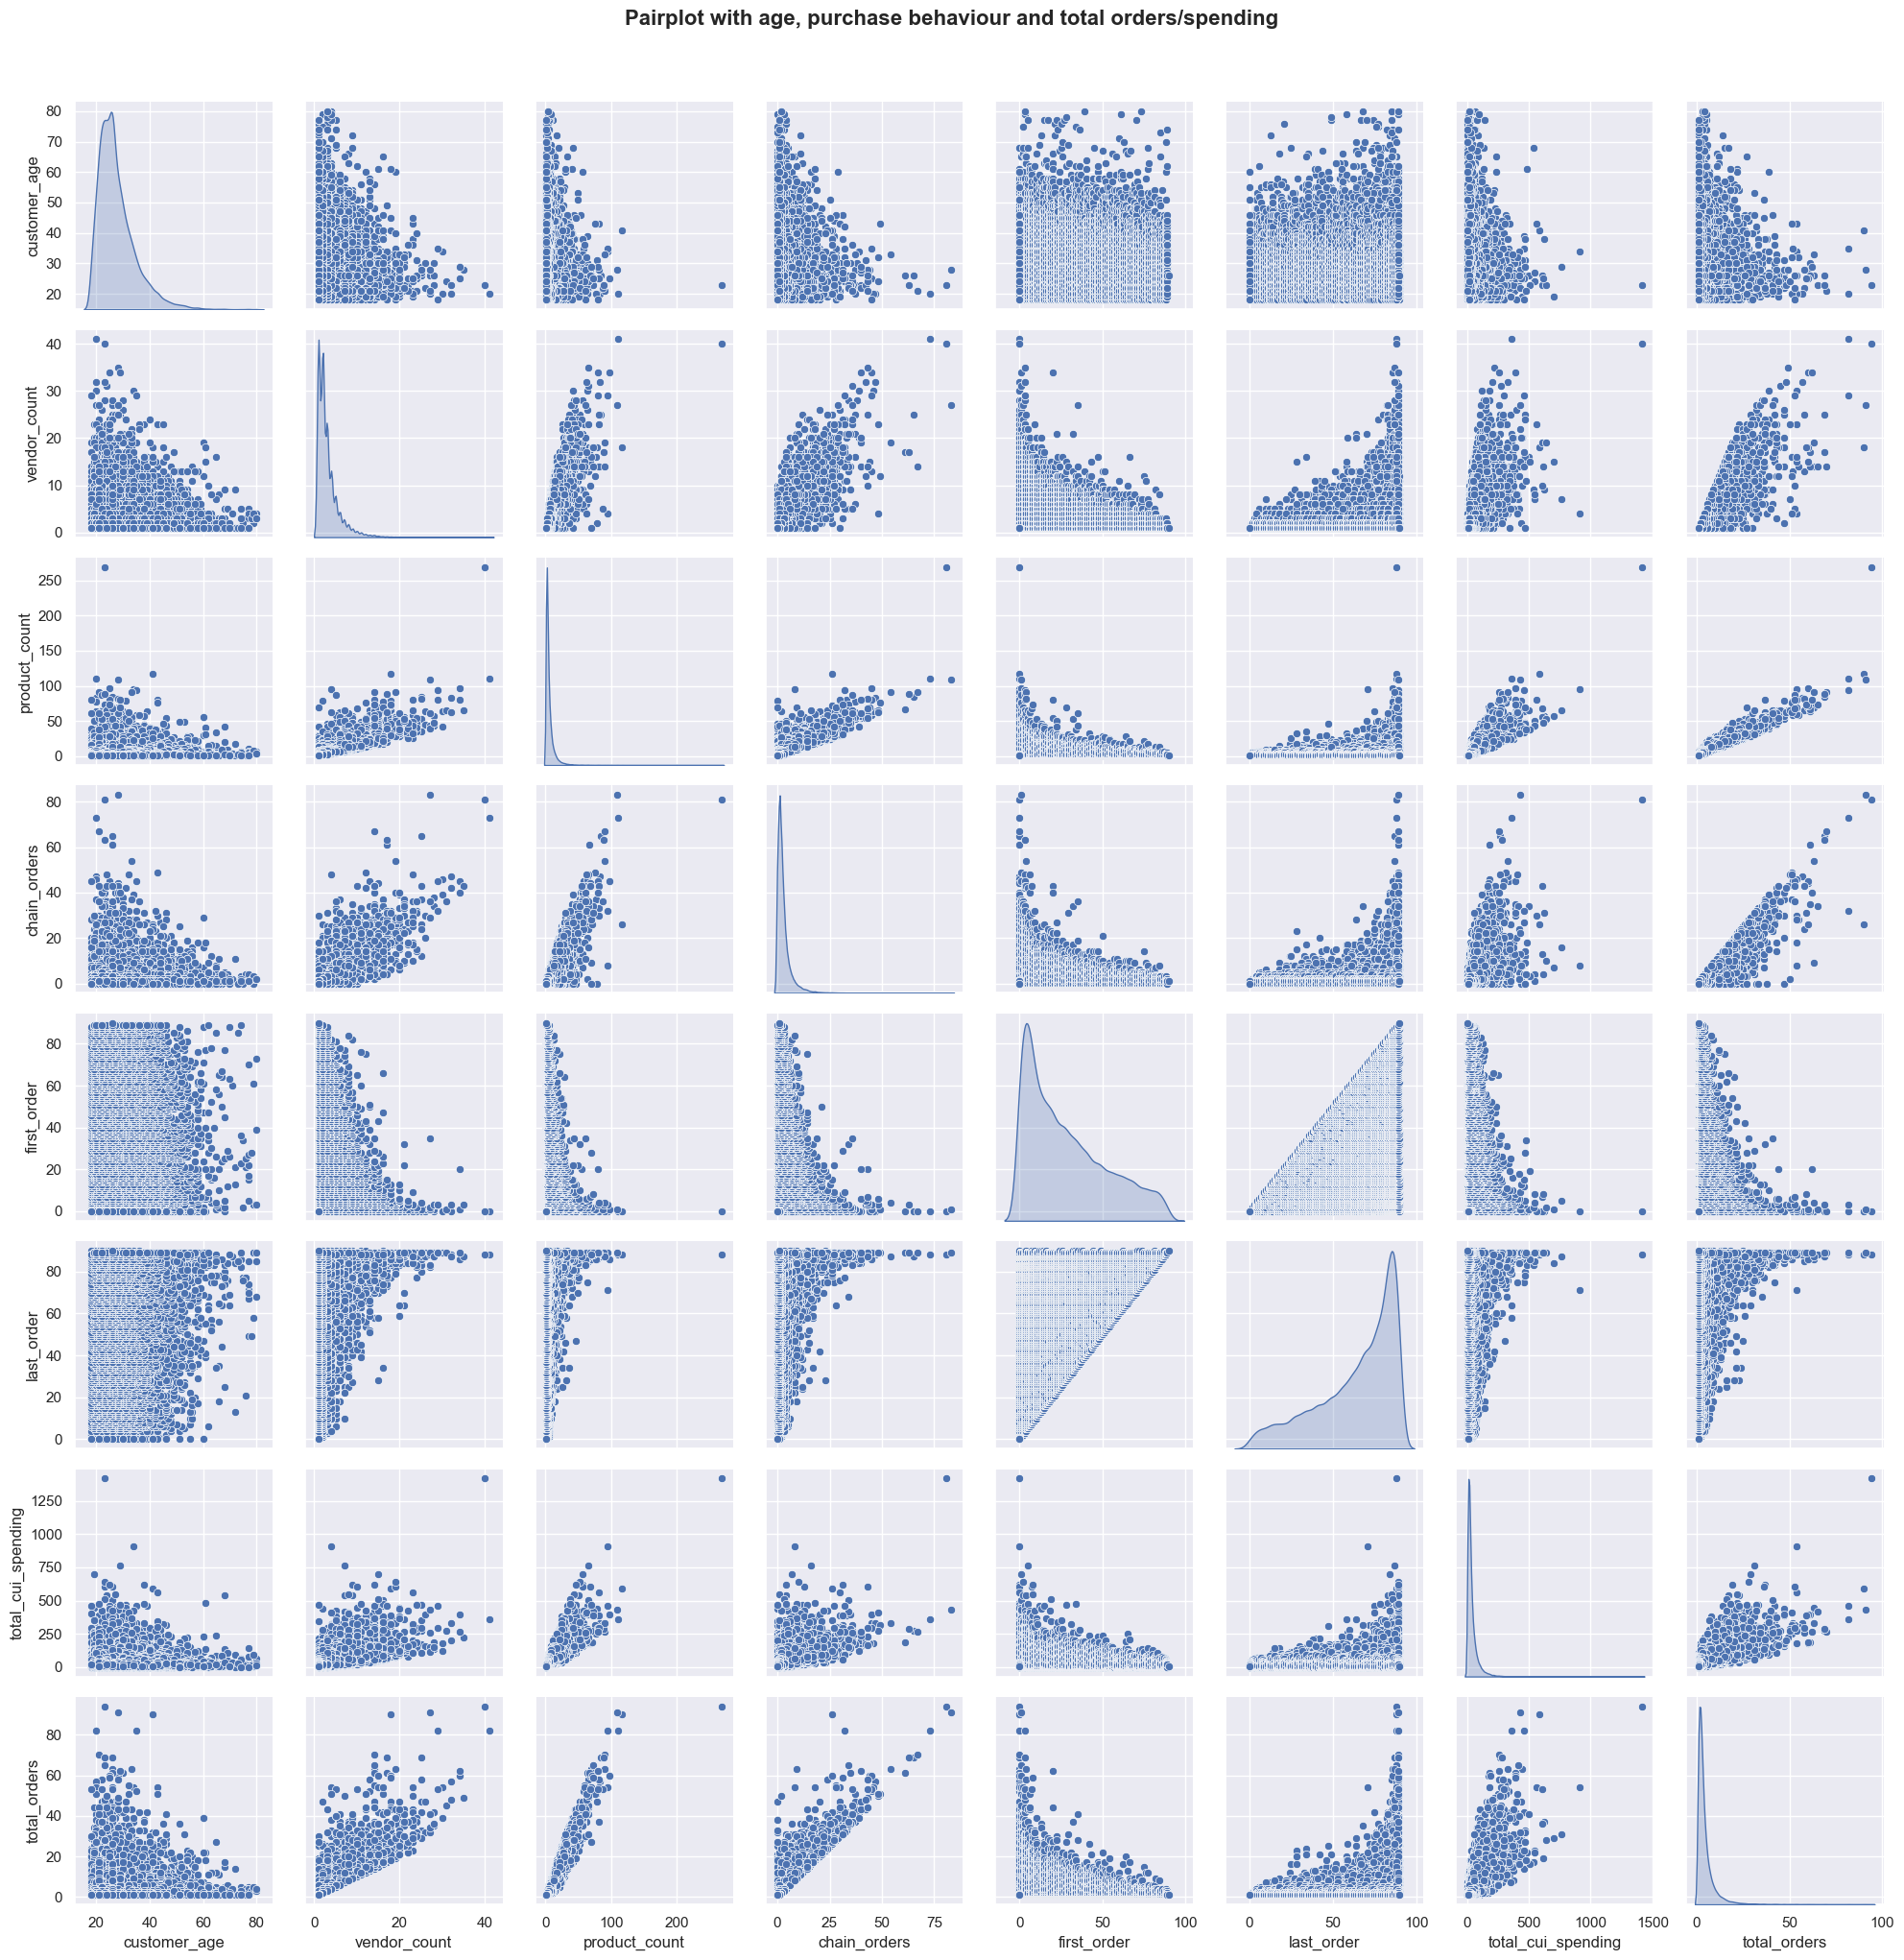

In [92]:
# create a pairplot of key variables
g = sns.pairplot(df_visualizations[metric_features_excluding_cui_dow_and_hr], diag_kind='kde')

g.fig.suptitle('Pairplot with age, purchase behaviour and total orders/spending', fontsize=16, y=1.02, weight = 'bold')

plt.tight_layout()
plt.show()

<a id = "feature_engineering"></a>

# 5. Feature Engineering <a class="anchor" id="feature_engineering"></a>
[Back to ToC](#toc)<br>

In [93]:
df_new_features = df_visualizations.copy()
df_new_features.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'chain_orders', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8',
       'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16',
       'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
       'total_cui_spending', 'total_orders'],
      dtype='object')

> ## 5.1. Generation <a class="anchor" id="generation"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a categorical feature that groups customers by generation

In [94]:
# Define bins and labels for the generation categories
bins = [17, 25, 41, 57, 76, 81]  # Bins must be set as one more than the number of categories
labels = ["Gen_Z", "Millennials", "Gen_X", "Baby_Boomers", "Silent_Generation"]

# Step 1: Create a new column for generation based on customer_age
df_new_features["generation"] = pd.cut(df_new_features["customer_age"], bins=bins, labels=labels)

In [95]:
round(df_new_features['generation'].value_counts(normalize=True) * 100, 2)

generation
Millennials          49.72
Gen_Z                45.47
Gen_X                 4.42
Baby_Boomers          0.35
Silent_Generation     0.04
Name: proportion, dtype: float64

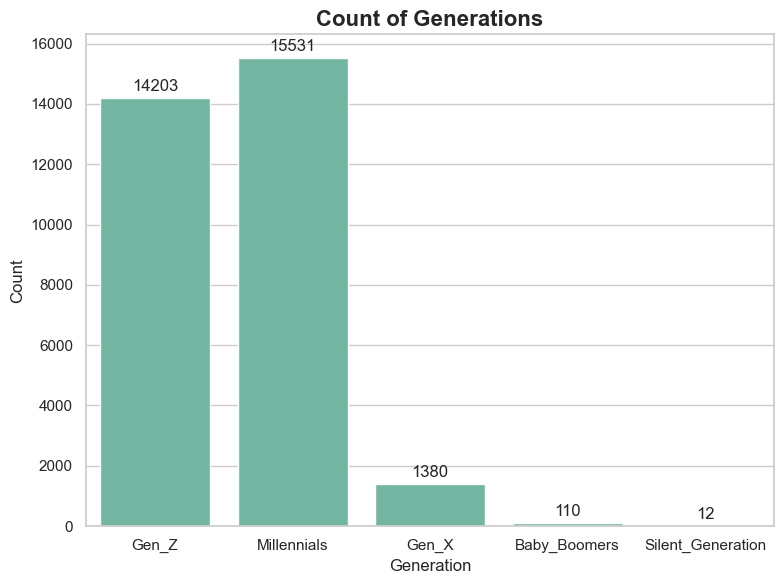

In [96]:
# Count plot for 'generation'
plot_distribution(
    data=df_new_features, 
    x="generation", 
    plot_type="count", 
    title="Count of Generations", 
    xlabel="Generation", 
    ylabel="Count", 
    show_counts=True, 
    order=labels,
    color_palette=color_palette
)

> ## 5.2. Total Cuisine Spending <a class="anchor" id="total_cuisine_spending"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Estimate the customer lifetime value based on the total spending across all cuisines.

In [97]:
# Sum these columns row-wise and create a new column "CUI_all"
df_new_features["total_cui_spending"] = df_new_features[cui_columns].sum(axis=1)

In [98]:
df_new_features["total_cui_spending"].describe().round(2)

count    31236.00
mean        38.26
std         45.84
min          0.37
25%         13.03
50%         24.18
75%         45.02
max       1418.33
Name: total_cui_spending, dtype: float64

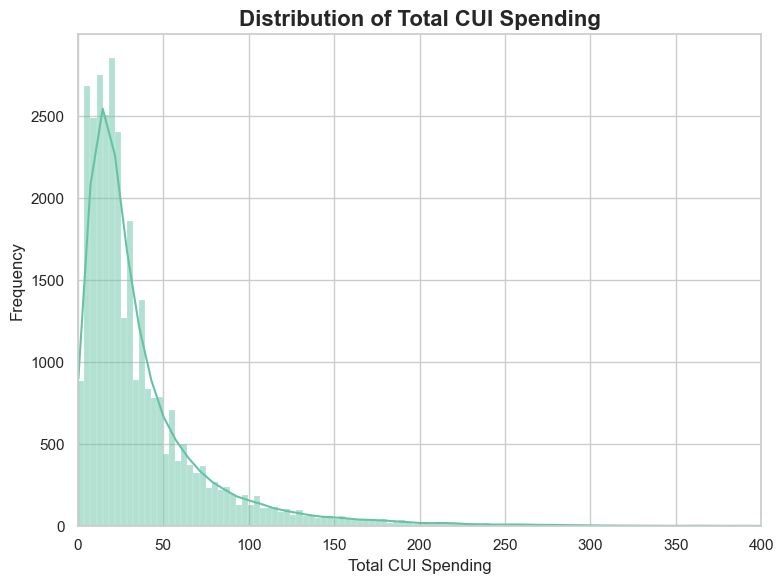

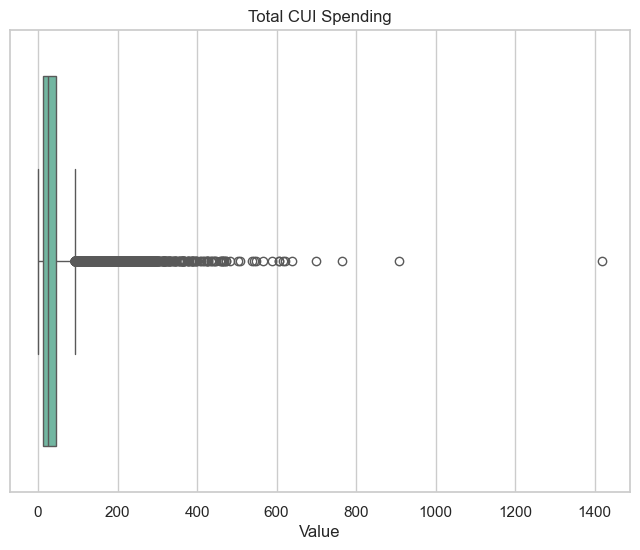

In [99]:
# Histogram for 'total_cui_spending'
plot_distribution(
    data=df_new_features, 
    x="total_cui_spending", 
    plot_type="hist", 
    title="Distribution of Total CUI Spending", 
    xlabel="Total CUI Spending", 
    ylabel="Frequency", 
    xlim=(0,400),
    kde=True,
    bins=400, 
    show_counts=False
)

#Plot the boxplot of total CUI spending
plot_boxplots(df_new_features, [('total_cui_spending', 'Total CUI Spending')])

> ## 5.3. Total Orders <a class="anchor" id="total_orders"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a feature to indicate the total number of orders placed.

In [100]:
df_new_features["total_orders"].describe().round(2)

count    31236.00
mean         4.36
std          5.01
min          1.00
25%          2.00
50%          3.00
75%          5.00
max         94.00
Name: total_orders, dtype: float64

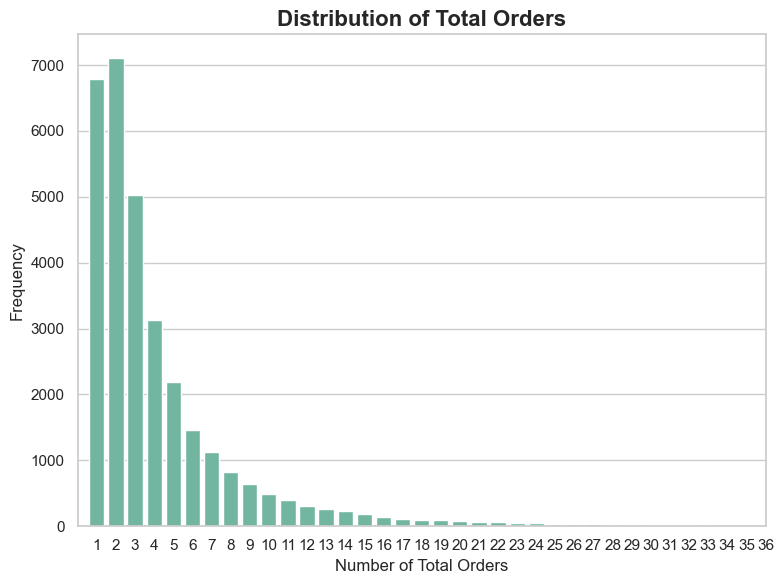

In [101]:
# Count plot for 'total_orders'
plot_distribution(
    data=df_new_features, 
    x="total_orders", 
    plot_type="count", 
    title="Distribution of Total Orders", 
    xlabel="Number of Total Orders", 
    ylabel="Frequency", 
    show_counts=False, 
    xlim=(-1,35)
)

> ## 5.4. Weekend and Weekday Orders <a class="anchor" id="weekend_and_weekday_orders"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a feature to indicate the number of orders placed during the weekend (Saturday and Sunday) versus weekdays.

In [102]:
# Create a column for weekend orders (DOW_0 and DOW_6)
df_new_features["weekend_orders"] = df_new_features["DOW_0"] + df_new_features["DOW_6"]

# Create a column for weekday orders (DOW_1 to DOW_5)
df_new_features["weekday_orders"] = df_new_features.loc[:, "DOW_1":"DOW_5"].sum(axis=1)

In [103]:
df_new_features[["weekend_orders", "weekday_orders"]].describe().round(2)

weekend_orders  weekday_orders
count        31236.00        31236.00
mean             1.26            3.11
std              1.75            3.72
min              0.00            0.00
25%              0.00            1.00
50%              1.00            2.00
75%              2.00            4.00
max             35.00           67.00

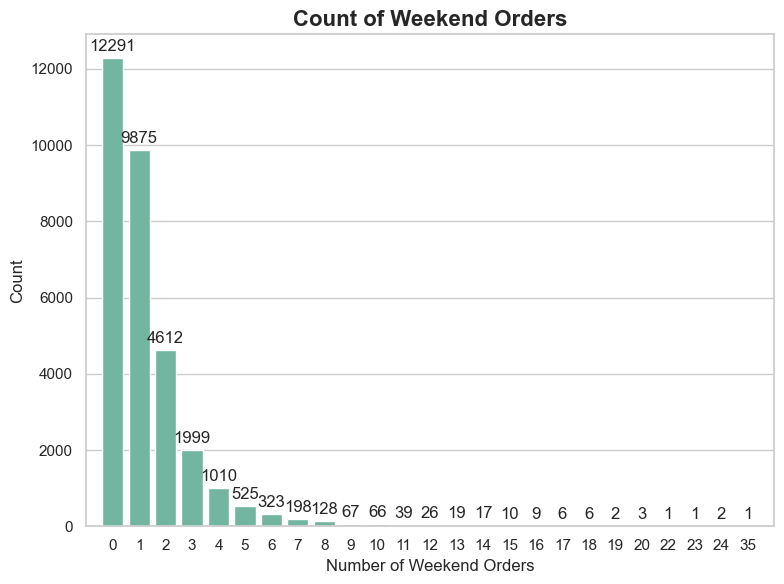

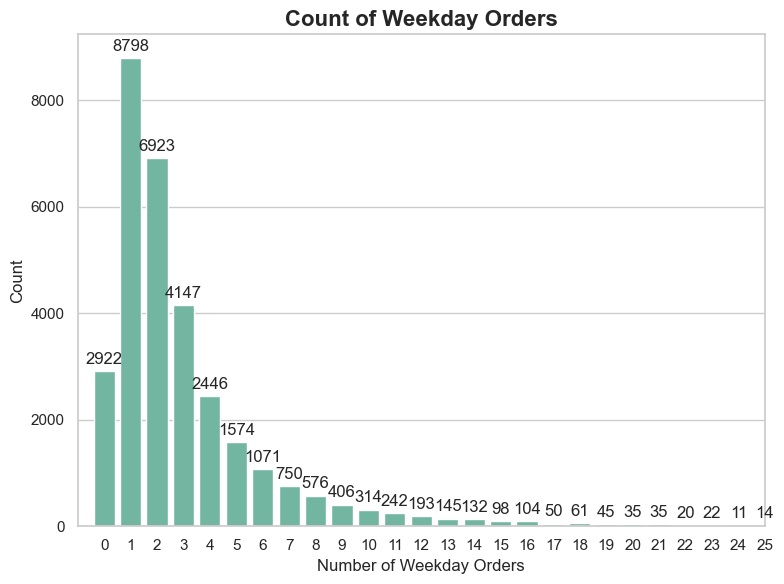

In [104]:
# Count plot for 'weekend_orders'
plot_distribution(
    data=df_new_features, 
    x="weekend_orders", 
    plot_type="count", 
    title="Count of Weekend Orders", 
    xlabel="Number of Weekend Orders", 
    ylabel="Count", 
    show_counts=True, 
    xlim=(-1, 25)
)


# Count plot for 'weekday_orders'
plot_distribution(
    data=df_new_features, 
    x="weekday_orders", 
    plot_type="count", 
    title="Count of Weekday Orders", 
    xlabel="Number of Weekday Orders", 
    ylabel="Count", 
    show_counts=True, 
    xlim=(-1, 25)
)

> ## 5.5. Hourly Orders Aggregation by Time of Day <a class="anchor" id="hourly_orders_aggregation"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

In this section, we analyze the distribution of customer orders across different time periods throughout the day. The hourly order data, ranging from midnight (HR_0) to 11 PM (HR_23), is aggregated into four distinct periods: Dawn (12 AM - 5 AM), Morning (6 AM - 11 AM), Afternoon (12 PM - 5 PM), and Evening (6 PM - 11 PM)

In [105]:
# Define the hour ranges for each period
dawn_hours = df_new_features.loc[:, "HR_1":"HR_5"].sum(axis=1)  # HR_1 to HR_5
morning_hours = df_new_features.loc[:, "HR_6":"HR_11"].sum(axis=1)  # HR_6 to HR_11
afternoon_hours = df_new_features.loc[:, "HR_12":"HR_17"].sum(axis=1)  # HR_12 to HR_17
evening_hours = df_new_features.loc[:, "HR_18":"HR_23"].sum(axis=1)  # HR_18 to HR_23

# Create new columns for each period
df_new_features["orders_dawn"] = dawn_hours
df_new_features["orders_morning"] = morning_hours
df_new_features["orders_afternoon"] = afternoon_hours
df_new_features["orders_evening"] = evening_hours

In [106]:
df_new_features.loc[:, "orders_dawn":"orders_evening"].describe().round(2)

orders_dawn  orders_morning  orders_afternoon  orders_evening
count     31236.00        31236.00          31236.00        31236.00
mean          0.42            1.22              1.80            0.89
std           1.14            2.22              2.73            1.91
min           0.00            0.00              0.00            0.00
25%           0.00            0.00              0.00            0.00
50%           0.00            1.00              1.00            0.00
75%           0.00            2.00              2.00            1.00
max          25.00           50.00             52.00           52.00

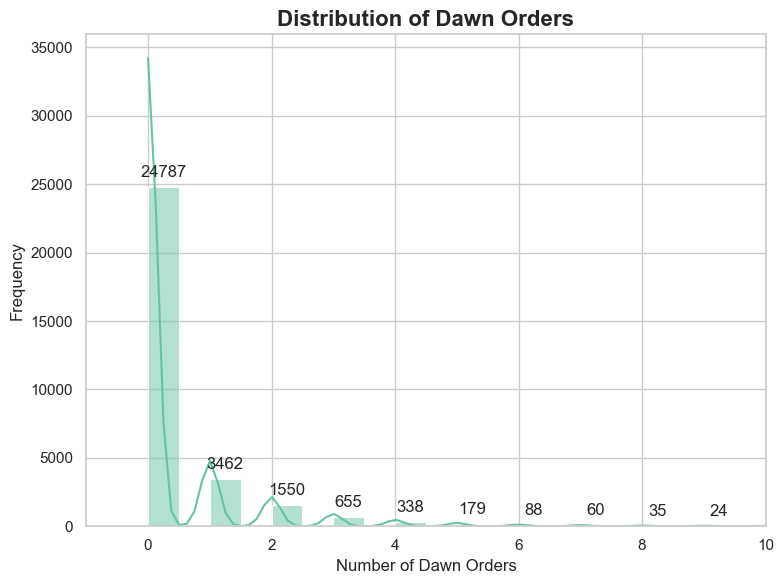

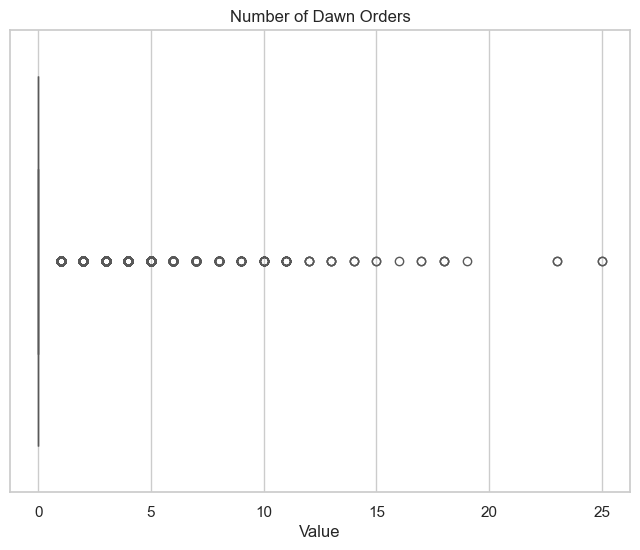

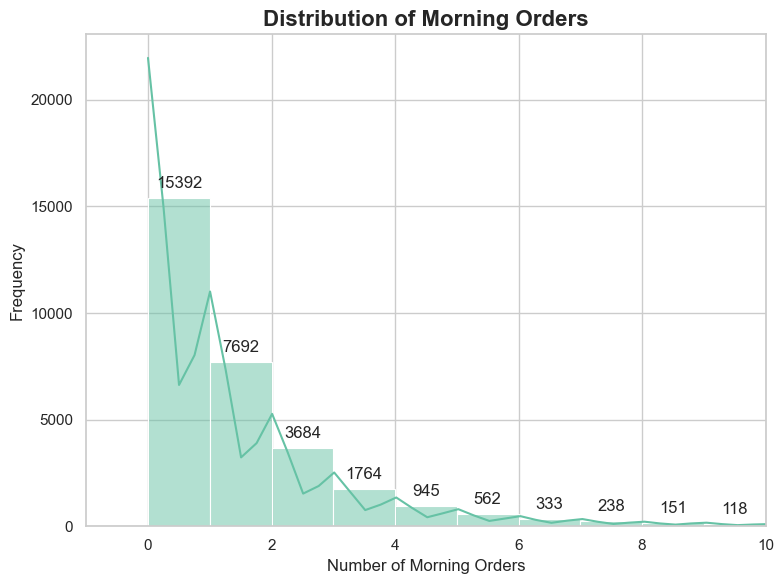

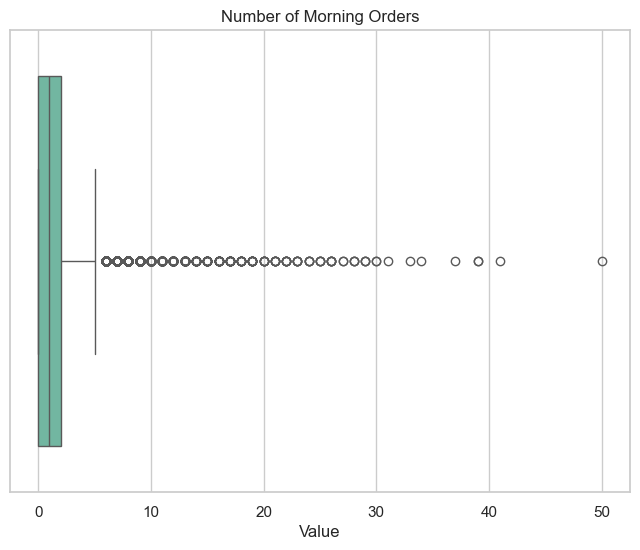

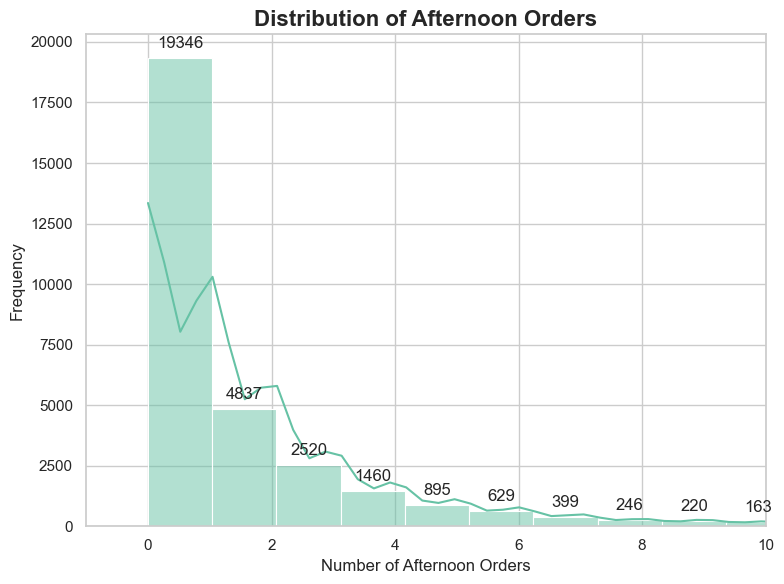

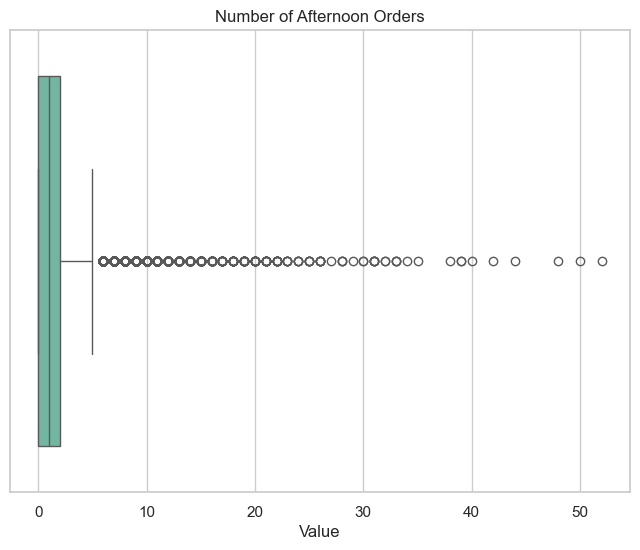

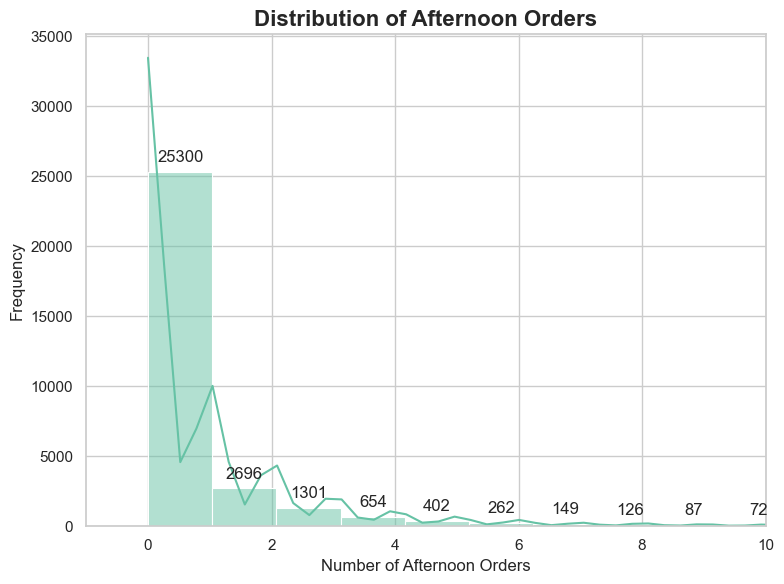

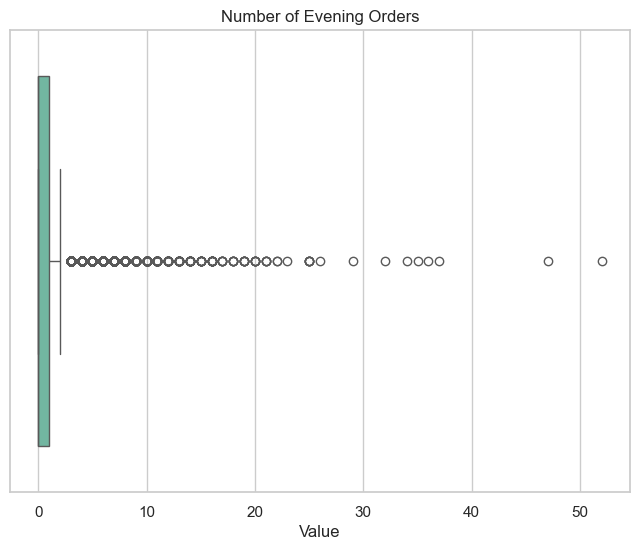

In [107]:
# Histogram for 'orders_dawn' with total counts displayed above each bar
plot_distribution(
    data=df_new_features, 
    x="orders_dawn", 
    plot_type="hist", 
    title="Distribution of Dawn Orders", 
    xlabel="Number of Dawn Orders", 
    ylabel="Frequency", 
    kde=True, 
    bins=50, 
    xlim=(-1, 10), 
    show_counts=True
)

plot_boxplots(df_new_features, [('orders_dawn', 'Number of Dawn Orders')])

# Histogram and Box Plot for 'orders_morning'
# Histogram for 'orders_morning'
plot_distribution(
    data=df_new_features, 
    x="orders_morning", 
    plot_type="hist", 
    title="Distribution of Morning Orders", 
    xlabel="Number of Morning Orders", 
    ylabel="Frequency", 
    kde=True, 
    bins=50, 
    xlim=(-1, 10), 
    show_counts=True
)

plot_boxplots(df_new_features, [('orders_morning', 'Number of Morning Orders')])

# Histogram and Box Plot for 'orders_afternoon'
plot_distribution(
    data=df_new_features, 
    x="orders_afternoon", 
    plot_type="hist", 
    title="Distribution of Afternoon Orders", 
    xlabel="Number of Afternoon Orders", 
    ylabel="Frequency", 
    kde=True, 
    bins=50, 
    xlim=(-1, 10), 
    show_counts=True
)

plot_boxplots(df_new_features, [('orders_afternoon', 'Number of Afternoon Orders')])

# Histogram and Box Plot for 'orders_evening'
plot_distribution(
    data=df_new_features, 
    x="orders_evening", 
    plot_type="hist", 
    title="Distribution of Afternoon Orders", 
    xlabel="Number of Afternoon Orders", 
    ylabel="Frequency", 
    kde=True, 
    bins=50, 
    xlim=(-1, 10), 
    show_counts=True
)

plot_boxplots(df_new_features, [('orders_evening', 'Number of Evening Orders')])

Let's also plot different time orders against each others.

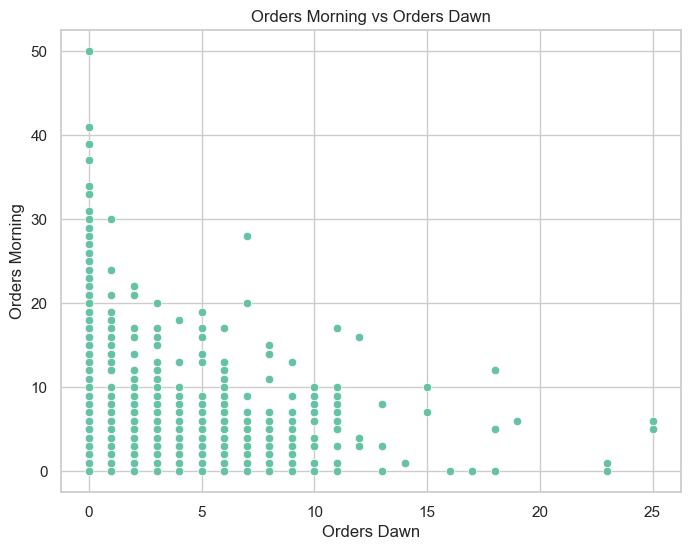

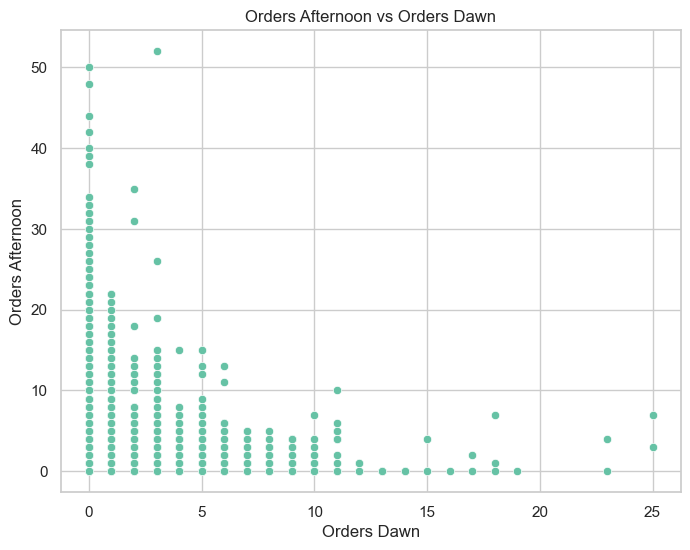

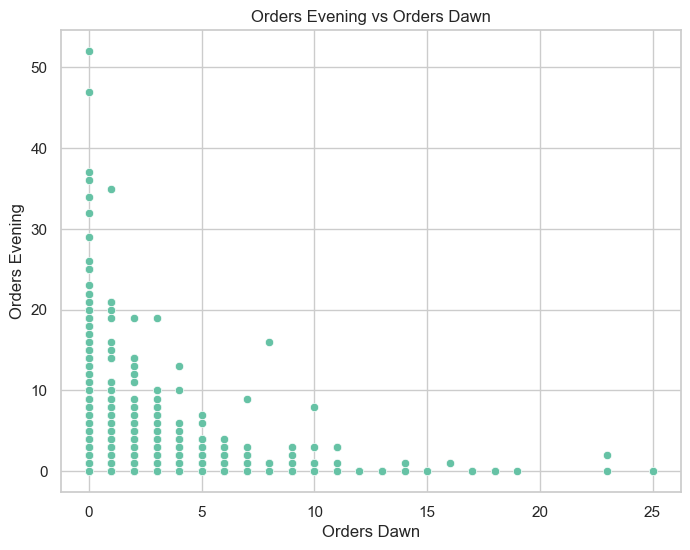

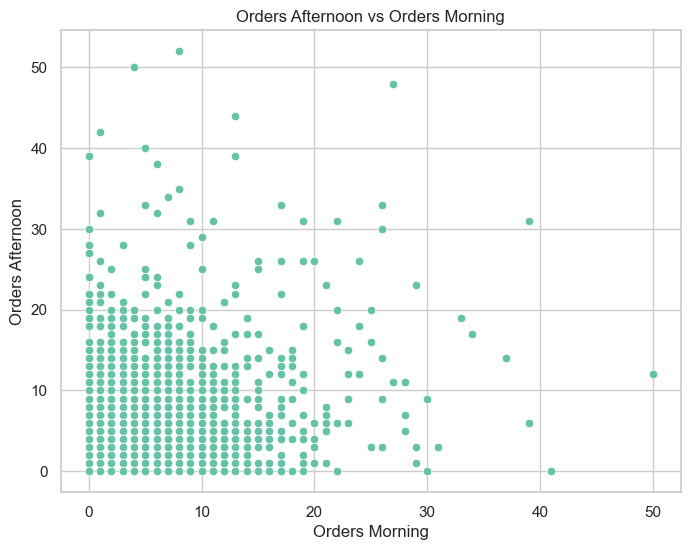

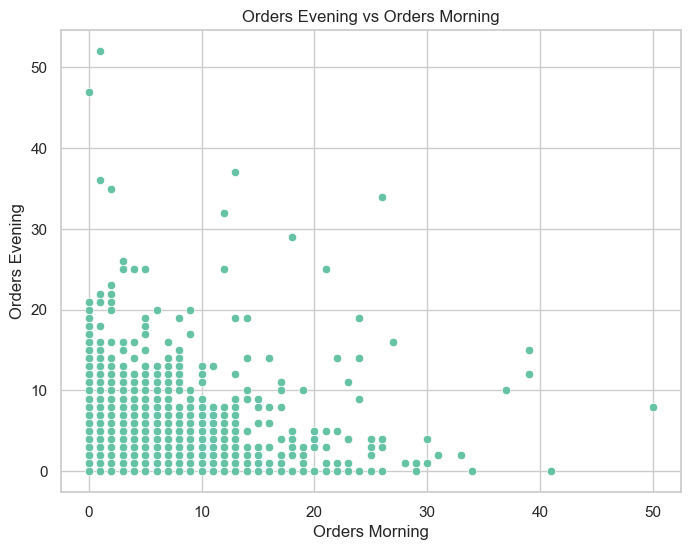

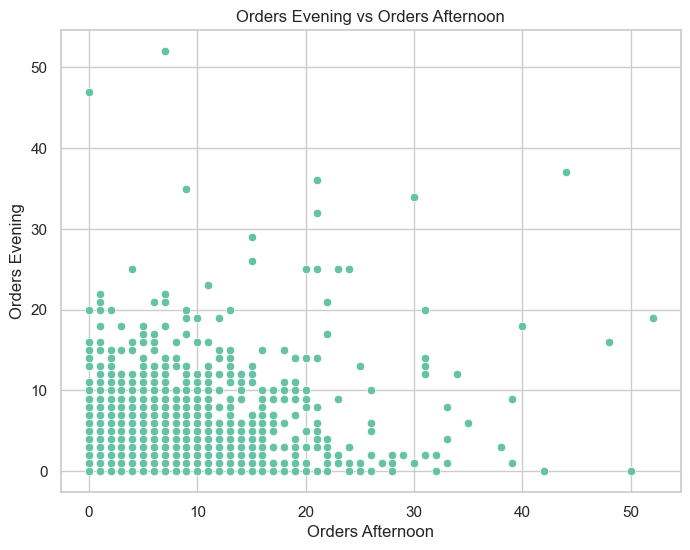

In [108]:
# Pairs of columns to compare
scatter_pairs = [
    ('orders_dawn', 'orders_morning', "Orders Morning vs Orders Dawn"),
    ('orders_dawn', 'orders_afternoon', "Orders Afternoon vs Orders Dawn"),
    ('orders_dawn', 'orders_evening', "Orders Evening vs Orders Dawn"),
    ('orders_morning', 'orders_afternoon', "Orders Afternoon vs Orders Morning"),
    ('orders_morning', 'orders_evening', "Orders Evening vs Orders Morning"),
    ('orders_afternoon', 'orders_evening', "Orders Evening vs Orders Afternoon")
]

# Generate the scatter plots
plot_scatter(df_new_features, scatter_pairs)

> ## 5.6. Order Recency <a class="anchor" id="Order_Recency"></a>

Recency of the customer’s last order, normalized by the full time span covered in the dataset.

While last_order gives direct information, order_recency will simplify interpreting recency at a glance.

In [109]:
# calculate the recency of the last order: 1 being the most recent and 0 being the least recent
df_new_features["order_recency"] = df_new_features["last_order"] / df_new_features['last_order'].max()

In [110]:
df_new_features["order_recency"].describe().round(2)

count    31236.00
mean         0.71
std          0.26
min          0.00
25%          0.54
50%          0.78
75%          0.92
max          1.00
Name: order_recency, dtype: float64

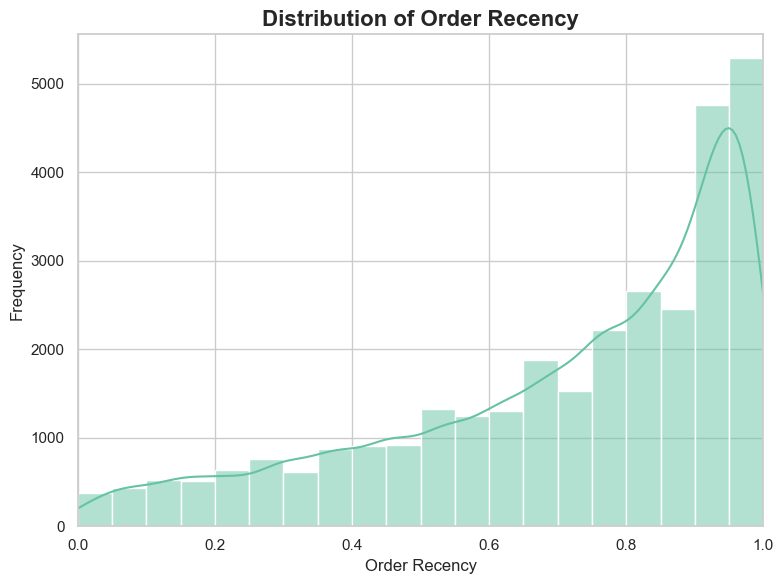

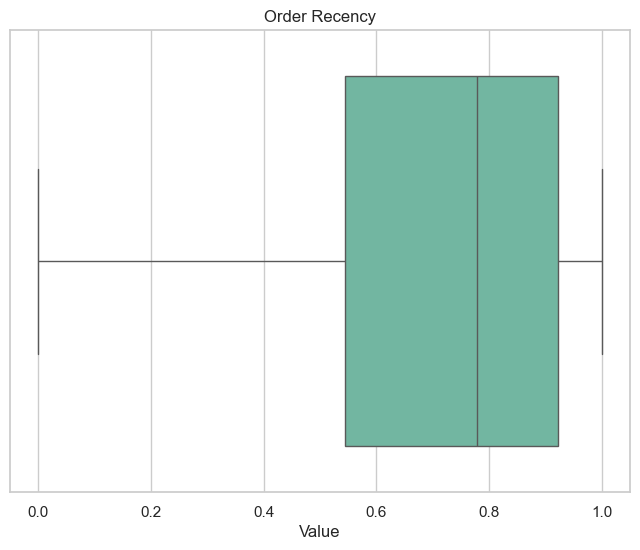

In [111]:
# Histogram for 'order_recency'
plot_distribution(
    data=df_new_features, 
    x="order_recency", 
    plot_type="hist", 
    title="Distribution of Order Recency", 
    xlabel="Order Recency", 
    ylabel="Frequency", 
    kde=True, 
    bins=20,
    xlim=(0, 1), 
    show_counts=False
)

plot_boxplots(df_new_features, [('order_recency', 'Order Recency')])

> ## 5.7. Average Daily Orders <a class="anchor" id="Average_Daily_Orders"></a>

How frequently does the customer place an order? This could help distinguish regular customers from occasional ones.

In [112]:
# Calculate average daily orders based on the total dataset period (from first day to most recent order in the dataset)
df_new_features["avg_daily_orders"] = df_new_features["total_orders"] / df_new_features['last_order'].max()

In [113]:
df_new_features["avg_daily_orders"].describe().round(2)

count    31236.00
mean         0.05
std          0.06
min          0.01
25%          0.02
50%          0.03
75%          0.06
max          1.04
Name: avg_daily_orders, dtype: float64

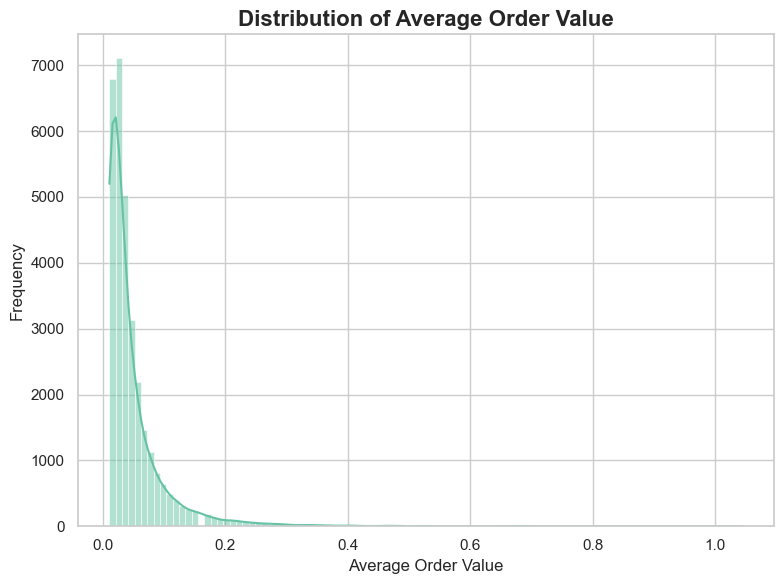

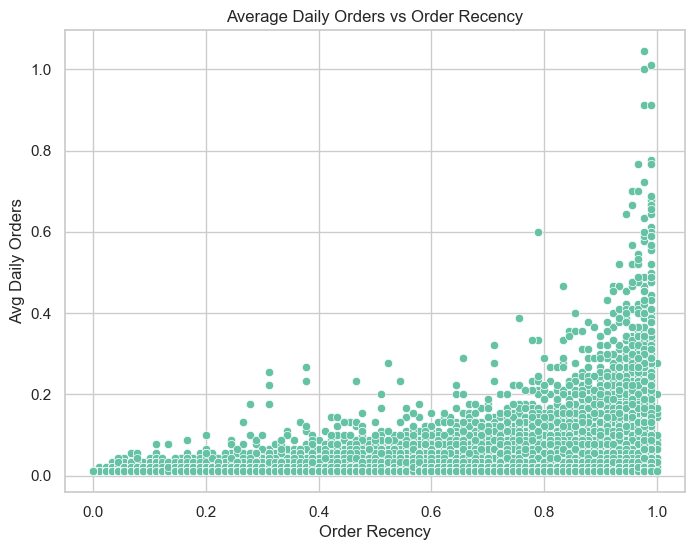

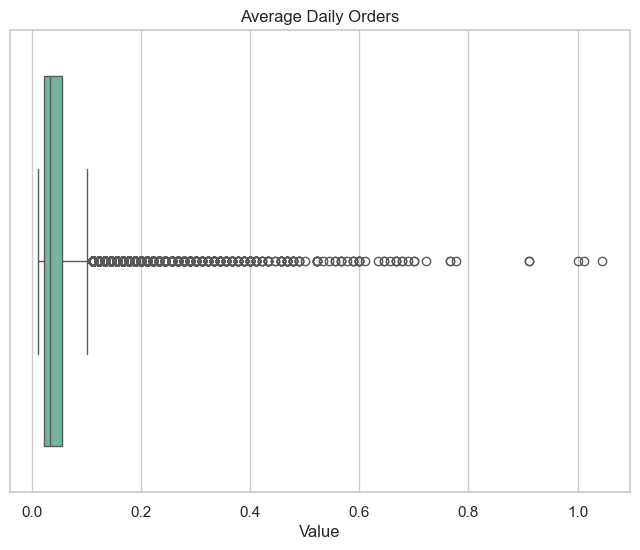

In [114]:
# Histogram for 'avg_order_value'
plot_distribution(
    data=df_new_features, 
    x="avg_daily_orders", 
    plot_type="hist", 
    title="Distribution of Average Order Value", 
    xlabel="Average Order Value", 
    ylabel="Frequency", 
    kde=True, 
    bins=100,
    show_counts=False
)

plot_scatter(df_new_features, [('order_recency', 'avg_daily_orders', "Average Daily Orders vs Order Recency")])

plot_boxplots(df_new_features, [('avg_daily_orders', 'Average Daily Orders')])

> ## 5.8. Average Order Value <a class="anchor" id="Average_Order_Value"></a>
This feature could help in identifying high-value customers who spend more per order.

In [115]:
df_new_features["avg_order_value"] = df_new_features["total_cui_spending"] / df_new_features["total_orders"]

In [116]:
df_new_features["avg_order_value"].describe().round(2)

count    31236.00
mean        10.31
std          7.86
min          0.37
25%          5.07
50%          8.22
75%         12.93
max        104.32
Name: avg_order_value, dtype: float64

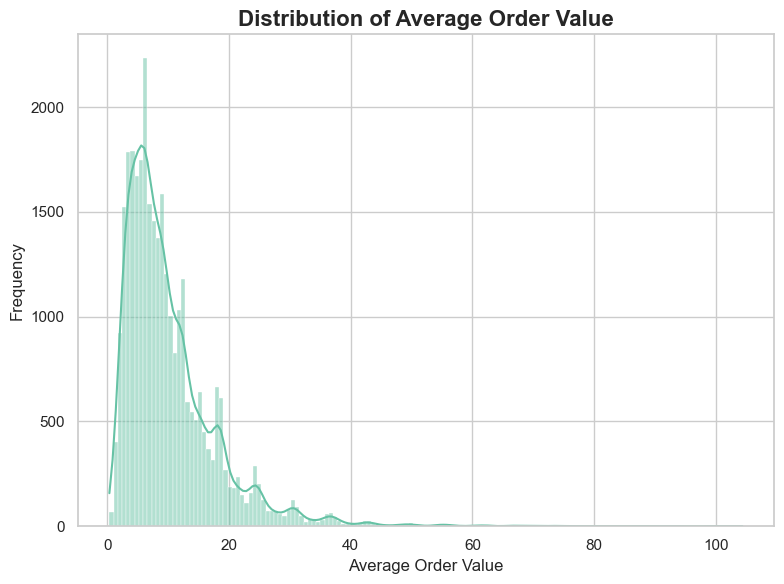

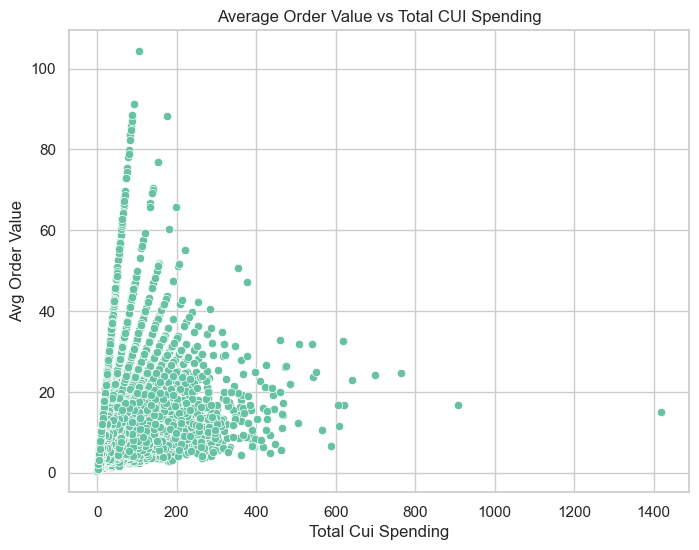

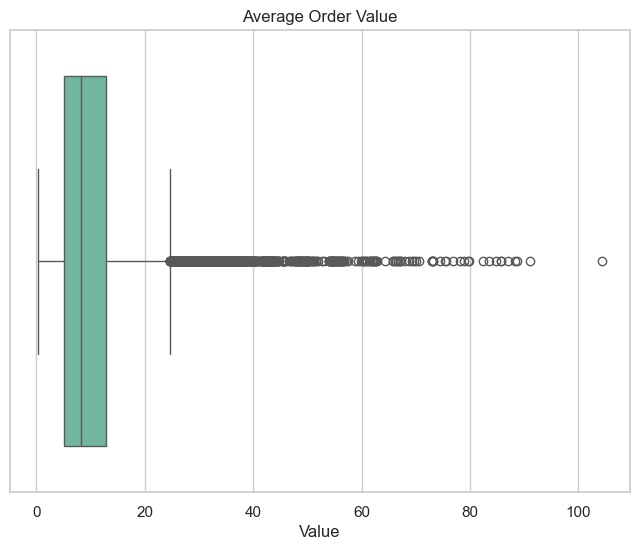

In [117]:
# Histogram for 'avg_order_value'
plot_distribution(
    data=df_new_features, 
    x="avg_order_value", 
    plot_type="hist", 
    title="Distribution of Average Order Value", 
    xlabel="Average Order Value", 
    ylabel="Frequency", 
    kde=True,
    bins=150, 
    show_counts=False
)

plot_scatter(df_new_features, [('total_cui_spending', 'avg_order_value', "Average Order Value vs Total CUI Spending")])

plot_boxplots(df_new_features, [('avg_order_value', 'Average Order Value')])

> ## 5.9. Promotion Used Indicator <a class="anchor" id="last_promotion_indicator"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a binary feature indicating whether the customer used a promotion. This can be helpful for analysis on promotional effectiveness.

In [118]:
round(df_new_features['last_promo'].value_counts(normalize=True) * 100, 2)

last_promo
NOPROMO     52.58
DELIVERY    19.65
DISCOUNT    14.10
FREEBIE     13.67
Name: proportion, dtype: float64

In [119]:
# Indicates if a promotion was used based on the last_promo value
df_new_features['promo_used'] = (df_new_features['last_promo'] != 'NOPROMO').astype(int)

In [120]:
round(df_new_features['promo_used'].value_counts(normalize=True) * 100, 2)

promo_used
0    52.58
1    47.42
Name: proportion, dtype: float64

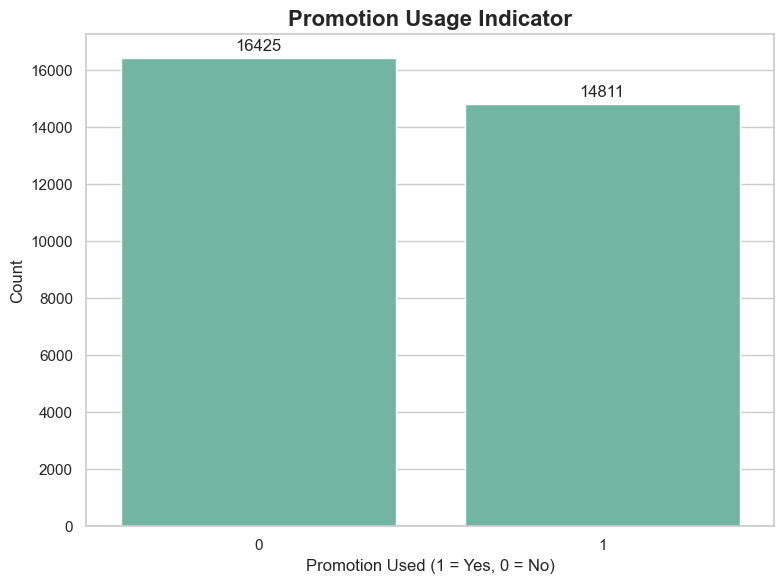

In [121]:
plot_distribution(
    data=df_new_features,
    x="promo_used",
    plot_type="count",
    title="Promotion Usage Indicator",
    xlabel="Promotion Used (1 = Yes, 0 = No)",
    ylabel="Count",
    show_counts=True,  # Display counts inside bars
)

> ## 5.10. Cities <a class="anchor" id="cities"></a>

Grouping of customer_regions into cities based on the findings and assumptions that the customer_region represents postal codes. And therefore customer_regions with the same prefix number belong to the same city.

In [122]:
# Extract the prefix from the 'customer_region' column
df_new_features['city'] = df_new_features['customer_region'].str[:1]

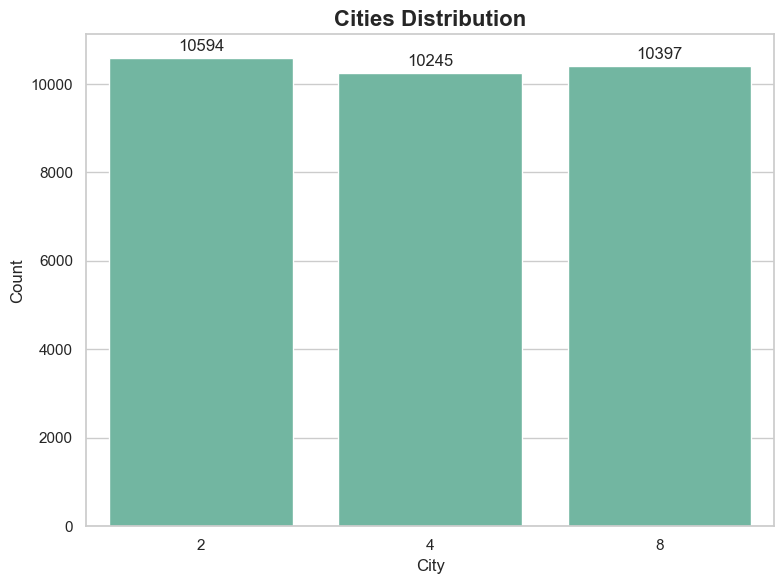

In [123]:
plot_distribution(
    data=df_new_features,
    x="city",
    plot_type="count",
    title="Cities Distribution",
    xlabel="City",
    ylabel="Count",
    show_counts=True,  # Display counts inside bars
)

> ## 5.11. Cuisine Origin Spend <a class="anchor" id="cuisine_origin_spend"></a>
This feature groups spending into three broad categories based on the origin of the cuisine: Asian, Western, and Other. Indian cuisine is included under "Asian," while cuisines like Italian and American are grouped under "Western."

In [124]:
# Cuisine Origin Spending
df_new_features["cui_asian_origin"] = (
    df_new_features["CUI_Asian"] + 
    df_new_features["CUI_Chinese"] + 
    df_new_features["CUI_Japanese"] + 
    df_new_features["CUI_Thai"] + 
    df_new_features["CUI_Indian"] 
)

df_new_features["cui_western"] = (
    df_new_features["CUI_Italian"] + 
    df_new_features["CUI_American"]
)

df_new_features["cui_other_origin"] =(
    df_new_features["CUI_OTHER"] + 
    df_new_features["CUI_Chicken Dishes"] +
    df_new_features["CUI_Noodle Dishes"] 
)

Let's plot the histograms and boxplots for these new features.

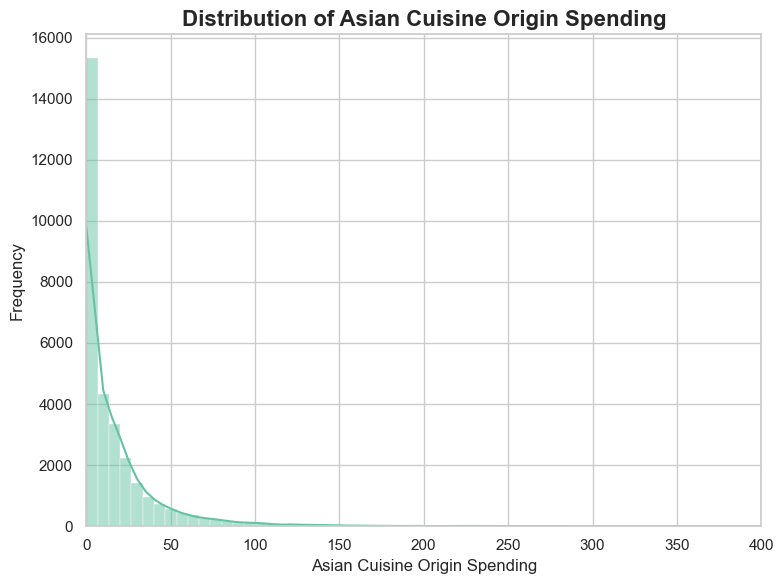

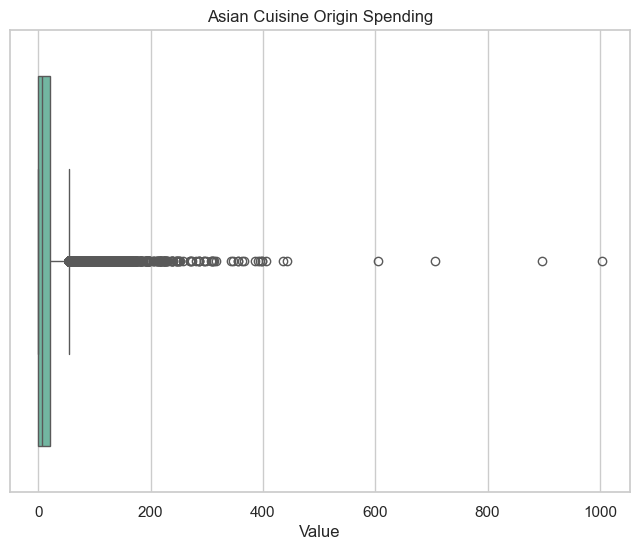

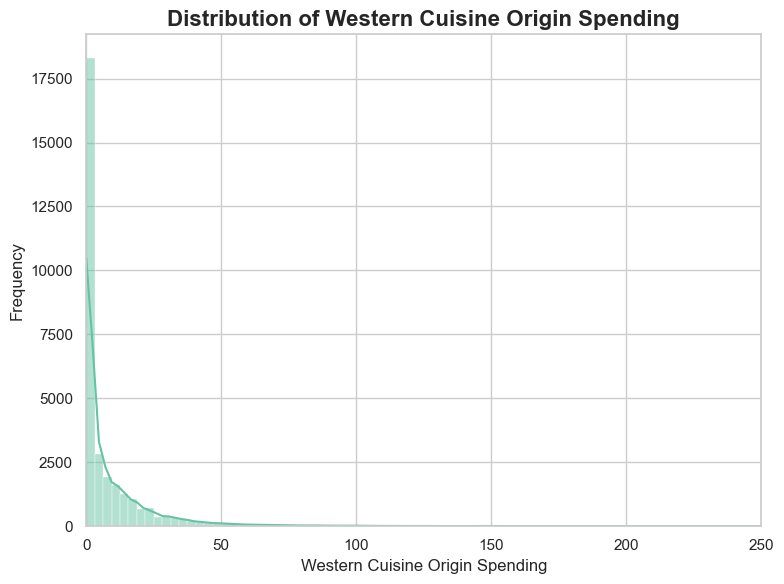

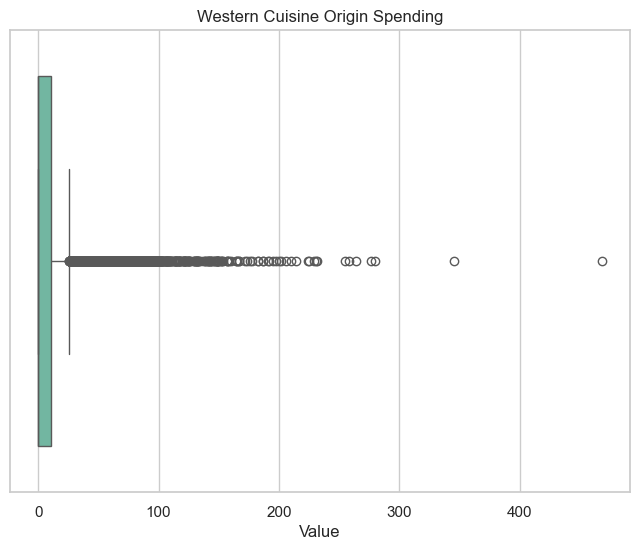

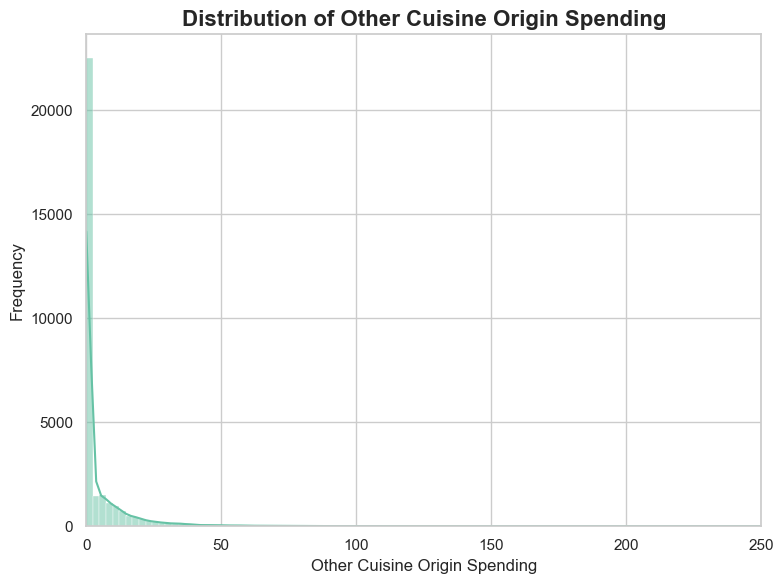

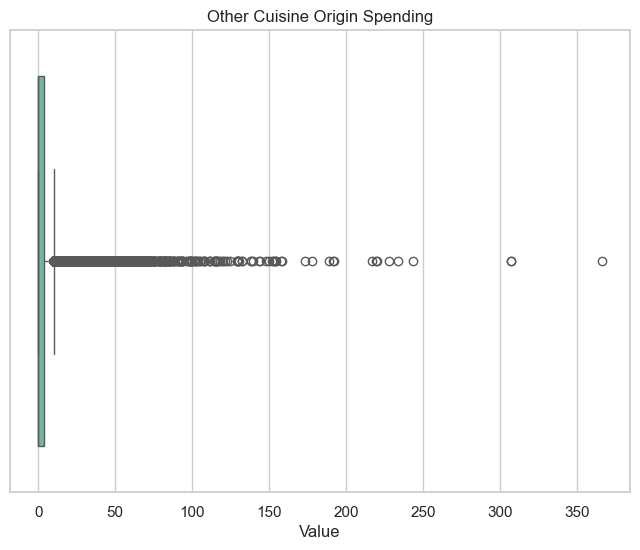

In [125]:
#Plots for 'cui_asian_origin'
# Histogram for 'cui_asian_origin'
plot_distribution(
    data=df_new_features, 
    x="cui_asian_origin",
    plot_type="hist", 
    title="Distribution of Asian Cuisine Origin Spending", 
    xlabel="Asian Cuisine Origin Spending", 
    ylabel="Frequency", 
    xlim=(0,400),
    kde=True,
    bins=150,
    show_counts=False
)

# Box plot for 'cui_asian_origin'
plot_boxplots(df_new_features, [('cui_asian_origin', 'Asian Cuisine Origin Spending')])

#Plots for 'cui_western'
# Histogram for 'cui_western'
plot_distribution(
    data=df_new_features, 
    x="cui_western",
    plot_type="hist", 
    title="Distribution of Western Cuisine Origin Spending", 
    xlabel="Western Cuisine Origin Spending", 
    ylabel="Frequency", 
    xlim=(0,250),
    kde=True,
    bins=150,
    show_counts=False
)

# Box plot for 'cui_western'
plot_boxplots(df_new_features, [('cui_western', 'Western Cuisine Origin Spending')])

#Plots for 'cui_other_origin'
# Histogram for 'cui_other_origin'
plot_distribution(
    data=df_new_features, 
    x="cui_other_origin",
    plot_type="hist", 
    title="Distribution of Other Cuisine Origin Spending", 
    xlabel="Other Cuisine Origin Spending", 
    ylabel="Frequency", 
    xlim=(0,250),
    kde=True,
    bins=150,
    show_counts=False
)

# Box plot for 'cui_other_origin'
plot_boxplots(df_new_features, [('cui_other_origin', 'Other Cuisine Origin Spending')])

> ## 5.12. Meal_Occasion_Spend<a class="anchor" id="meal_occasion_spend"></a>
This feature organizes spending into two categories based on the type of meal or occasion: "Main Dishes" (meals typically consumed as full meals) and "Snacks & Beverages" (items such as drinks, desserts, and small bites).

In [126]:
# Meal Occasion Spending
df_new_features["cui_main_dishes"] = (
    df_new_features["CUI_Asian"] + df_new_features["CUI_Chinese"] + 
    df_new_features["CUI_Japanese"] + df_new_features["CUI_Thai"] + 
    df_new_features["CUI_Italian"] + df_new_features["CUI_Indian"] + 
    df_new_features["CUI_American"] + df_new_features["CUI_OTHER"] + 
    df_new_features["CUI_Chicken Dishes"] + df_new_features["CUI_Noodle Dishes"] 
)

df_new_features["cui_snacks_beverages"] = (
    df_new_features["CUI_Beverages"] + df_new_features["CUI_Cafe"] + 
    df_new_features["CUI_Desserts"] + df_new_features["CUI_Street Food / Snacks"])

Let's plot the histograms and boxplots for these new features.

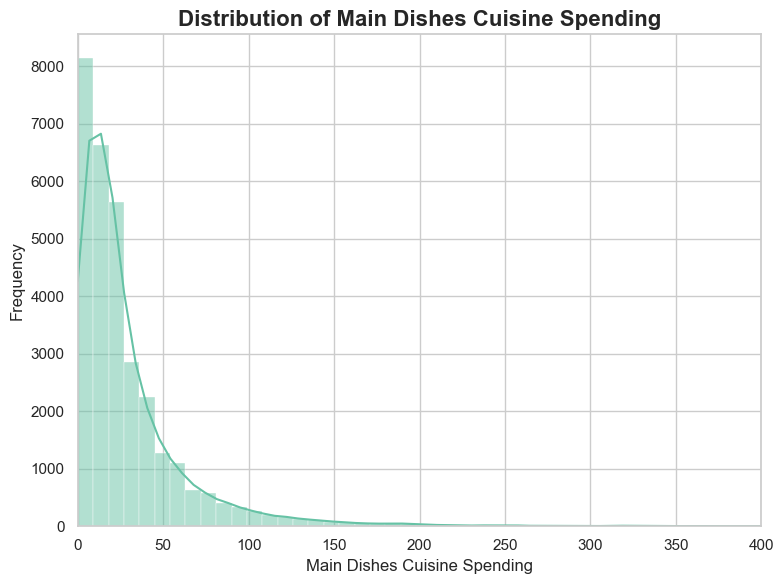

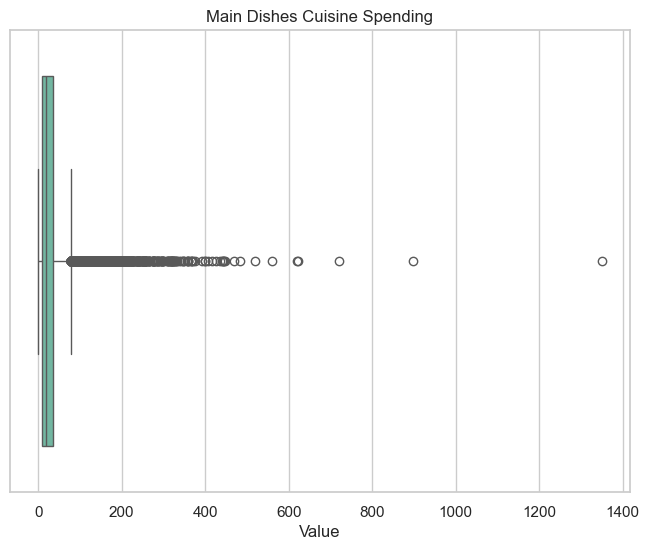

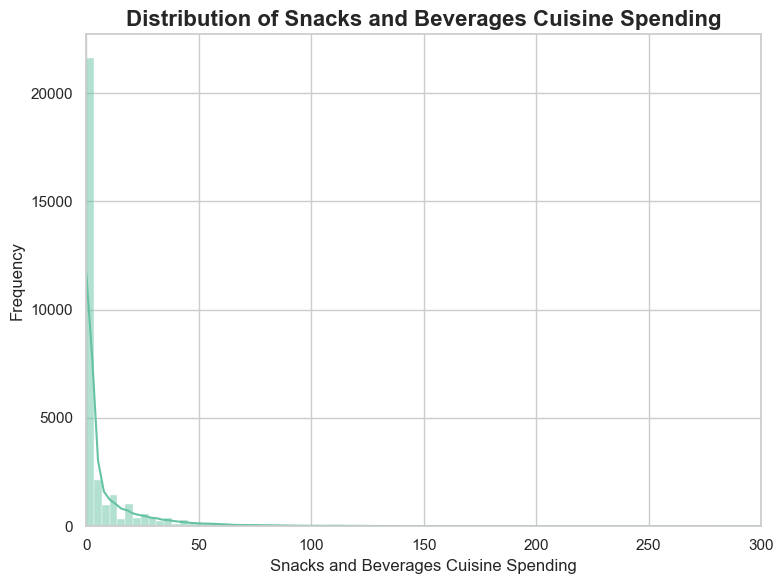

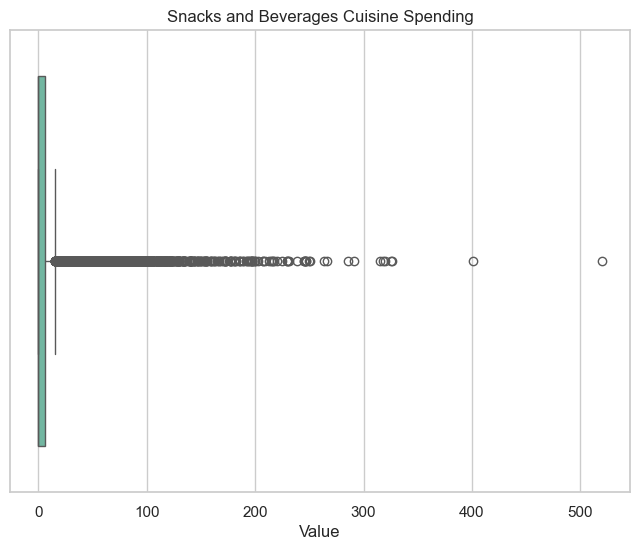

In [127]:
#Plots for 'cui_main_dishes'
# Histogram for 'cui_main_dishes'
plot_distribution(
    data=df_new_features, 
    x="cui_main_dishes",
    plot_type="hist", 
    title="Distribution of Main Dishes Cuisine Spending", 
    xlabel="Main Dishes Cuisine Spending", 
    ylabel="Frequency", 
    xlim=(0,400),
    kde=True,
    bins=150,
    show_counts=False
)

# Box plot for 'cui_main_dishes'
plot_boxplots(df_new_features, [('cui_main_dishes', 'Main Dishes Cuisine Spending')])

#Plots for 'cui_snacks_beverages'
# Histogram for 'cui_snacks_beverages'
plot_distribution(
    data=df_new_features, 
    x="cui_snacks_beverages",
    plot_type="hist", 
    title="Distribution of Snacks and Beverages Cuisine Spending", 
    xlabel="Snacks and Beverages Cuisine Spending", 
    ylabel="Frequency", 
    xlim=(0,300),
    kde=True,
    bins=150,
    show_counts=False
)

# Box plot for 'cui_snacks_beverages'
plot_boxplots(df_new_features, [('cui_snacks_beverages', 'Snacks and Beverages Cuisine Spending')])

> ## 5.13. Proportion of Cuisine Spending <a class="anchor" id="proportion_cuisine_spending"></a>
The new features represent the proportion of spending on each cuisine type relative to the total spending across all cuisines. These proportions help normalize spending behavior and enable comparisons independent of absolute spending values.

In [128]:
# Select all columns that contain "cui" with case-insensitivity
cui_columns = df_new_features.columns[df_new_features.columns.str.contains("cui", case=False)].tolist()

# Exclude "total_cui_spending"
cui_columns = [col for col in cui_columns if col != "total_cui_spending"]

cui_columns

['CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai',
 'cui_asian_origin',
 'cui_western',
 'cui_other_origin',
 'cui_main_dishes',
 'cui_snacks_beverages']

In [129]:
# Initialize an empty list to store the proportional column names
prop_cui_columns = []

# Compute proportions for each cui_ column and create corresponding prop_ columns
for col in [column for column in cui_columns]:
    prop_col = 'prop_' + col.lower()  # Generate proportional column name in lowercase
    df_new_features[prop_col] = df_new_features[col] / df_new_features['total_cui_spending'].replace(0, 1)
    # Append the prop_ column name to the list
    prop_cui_columns.append(prop_col)

# Display a preview of the new features
df_new_features[prop_cui_columns].head().T

customer_id                    1b8f824d5e  f6d1b2ba63  180c632ed8  4eb37a6705  \
prop_cui_american                     0.0         1.0    0.000000    0.262807   
prop_cui_asian                        0.0         0.0    0.434094    0.737193   
prop_cui_beverages                    0.0         0.0    0.000000    0.000000   
prop_cui_cafe                         0.0         0.0    0.000000    0.000000   
prop_cui_chicken dishes               0.0         0.0    0.000000    0.000000   
prop_cui_chinese                      0.0         0.0    0.000000    0.000000   
prop_cui_desserts                     0.0         0.0    0.000000    0.000000   
prop_cui_healthy                      0.0         0.0    0.000000    0.000000   
prop_cui_indian                       1.0         0.0    0.565906    0.000000   
prop_cui_italian                      0.0         0.0    0.000000    0.000000   
prop_cui_japanese                     0.0         0.0    0.000000    0.000000   
prop_cui_noodle dishes                0.0         0.0    0.000000    0.000000   
prop_cui_other                        0.0         0.0    0.000000    0.000000   
prop_cui_street food / snacks         0.0         0.0    0.000000    0.000000   
prop_cui_thai                         0.0         0.0    0.000000    0.000000   
prop_cui_asian_origin                 1.0         0.0    1.000000    0.737193   
prop_cui_western                      0.0         1.0    0.000000    0.262807   
prop_cui_other_origin                 0.0         0.0    0.000000    0.000000   
prop_cui_main_dishes                  1.0         1.0    1.000000    1.000000   
prop_cui_snacks_beverages             0.0         0.0    0.000000    0.000000   

customer_id                    6aef2b6726  
prop_cui_american                     0.0  
prop_cui_asian                        1.0  
prop_cui_beverages                    0.0  
prop_cui_cafe                         0.0  
prop_cui_chicken dishes               0.0  
prop_cui_chinese                      0.0  
prop_cui_desserts                     0.0  
prop_cui_healthy                      0.0  
prop_cui_indian                       0.0  
prop_cui_italian                      0.0  
prop_cui_japanese                     0.0  
prop_cui_noodle dishes                0.0  
prop_cui_other                        0.0  
prop_cui_street food / snacks         0.0  
prop_cui_thai                         0.0  
prop_cui_asian_origin                 1.0  
prop_cui_western                      0.0  
prop_cui_other_origin                 0.0  
prop_cui_main_dishes                  1.0  
prop_cui_snacks_beverages             0.0

Let's create some visualization for these new features.

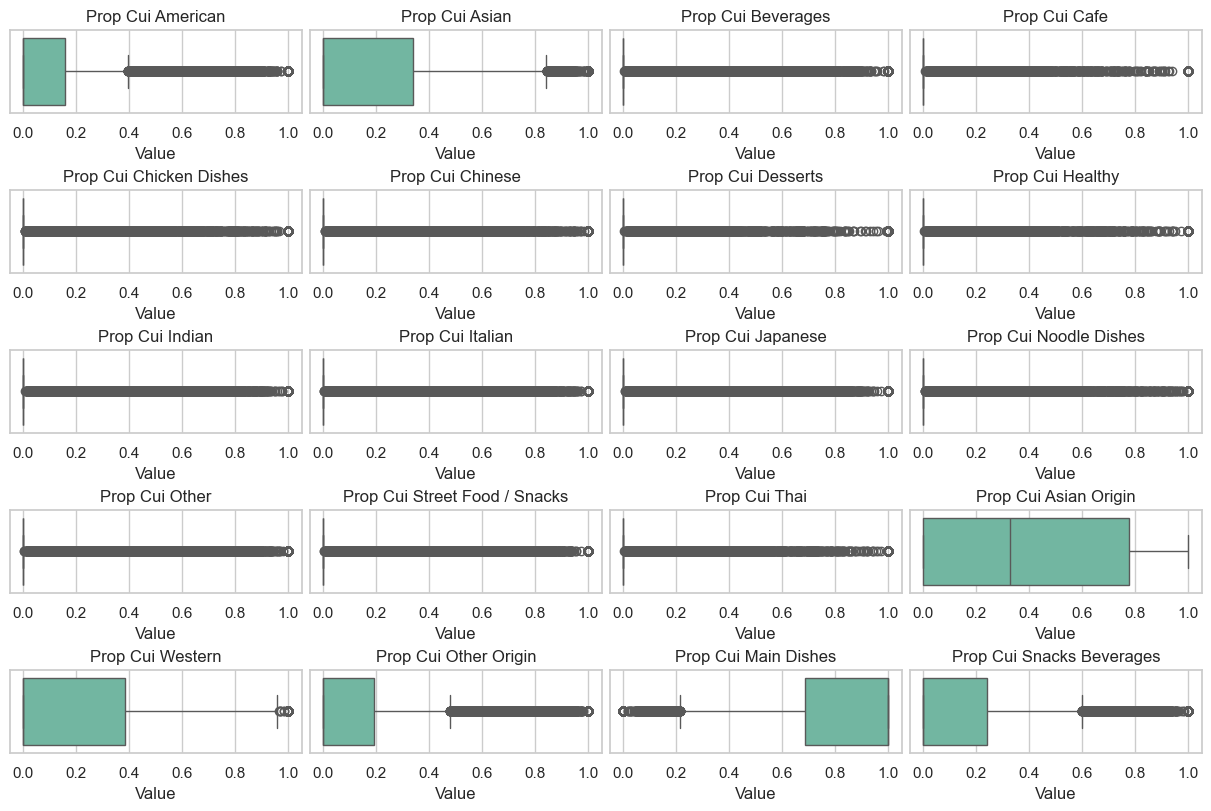

In [130]:
# Create a list of tuples for column names and titles
columns_and_titles = [(col, col.replace('_', ' ').title()) for col in prop_cui_columns] 

plot_boxplots(df_new_features, columns_and_titles, cols=4)

Let's also plot the kernel density estimate (KDE) plots for the proportional cuisine columns

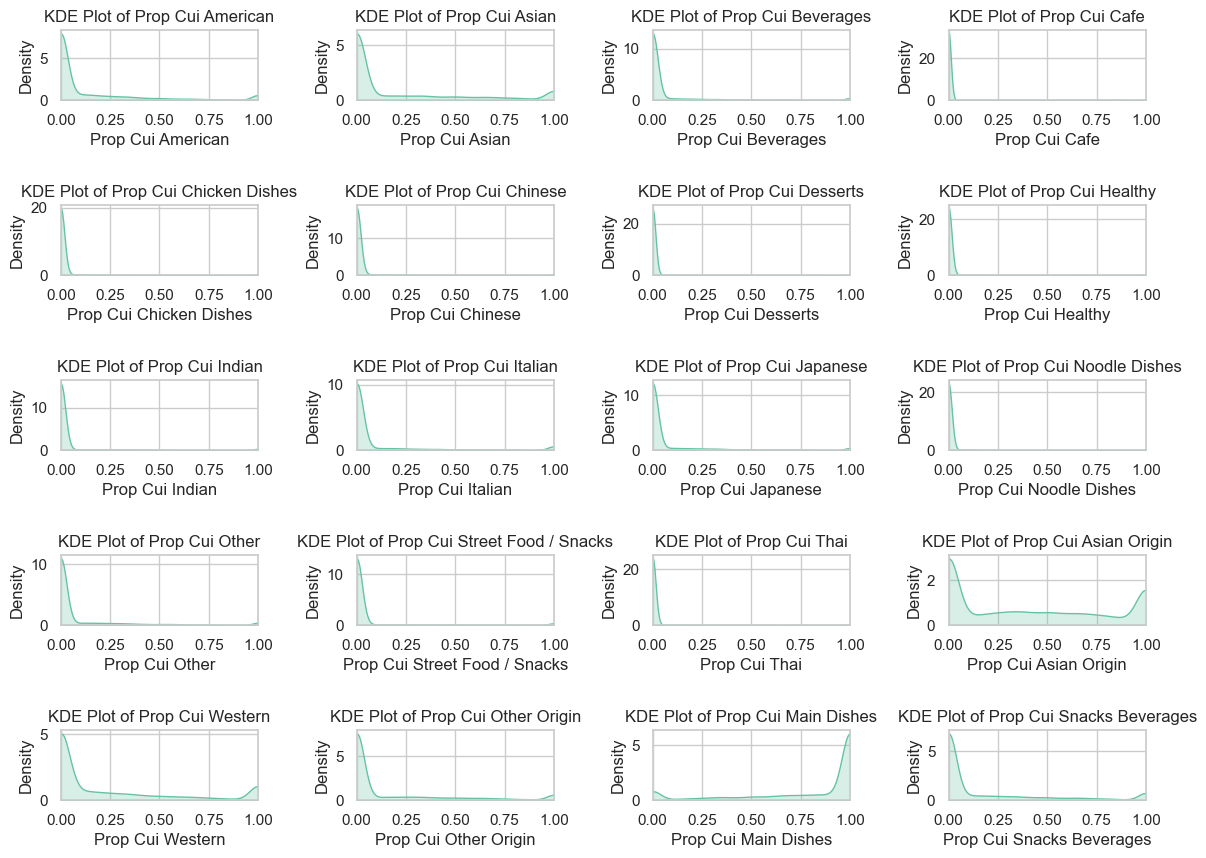

In [131]:
plot_kde_plots(df_new_features, columns_and_titles, xlim=(0, 1), row_spacing=1.5, cols=4)

> ## 5.14. Proportion of Total Orders <a class="anchor" id="proportion_total_orders"></a>
The new features represent the proportion of orders placed for each category (e.g., weekend orders, weekday orders, etc.) relative to the total number of orders. These proportions help normalize the ordering behavior, allowing comparisons across different time periods or categories independent of total order volume.

In [132]:
# Select the columns to create orders proportion
orders_columns = [
    'chain_orders',
    'weekend_orders',
    'weekday_orders',
    'orders_dawn',
    'orders_morning',
    'orders_afternoon',
    'orders_evening'
]

# Initialize an empty list to store the proportional column names
prop_orders_columns = []

# Compute proportions for each order column and create corresponding prop_ columns
for col in [column for column in orders_columns]:
    prop_col = 'prop_' + col.lower()  # Generate proportional column name in lowercase
    df_new_features[prop_col] = df_new_features[col] / df_new_features['total_orders'].replace(0, 1)
    # Append the prop_ column name to the list
    prop_orders_columns.append(prop_col)

# Display a preview of the new features
df_new_features[prop_orders_columns].head().T

customer_id            1b8f824d5e  f6d1b2ba63  180c632ed8  4eb37a6705  \
prop_chain_orders             0.5         1.0         0.5         0.0   
prop_weekend_orders           1.0         1.0         0.5         0.5   
prop_weekday_orders           0.0         0.0         0.5         0.5   
prop_orders_dawn              0.0         0.0         0.0         0.0   
prop_orders_morning           0.0         1.0         0.5         1.0   
prop_orders_afternoon         0.0         0.0         0.5         0.0   
prop_orders_evening           1.0         0.0         0.0         0.0   

customer_id            6aef2b6726  
prop_chain_orders             0.0  
prop_weekend_orders           0.5  
prop_weekday_orders           0.5  
prop_orders_dawn              1.0  
prop_orders_morning           0.0  
prop_orders_afternoon         0.0  
prop_orders_evening           0.0

As we did previous let's plot boxplots and kde to check prop features distribution.

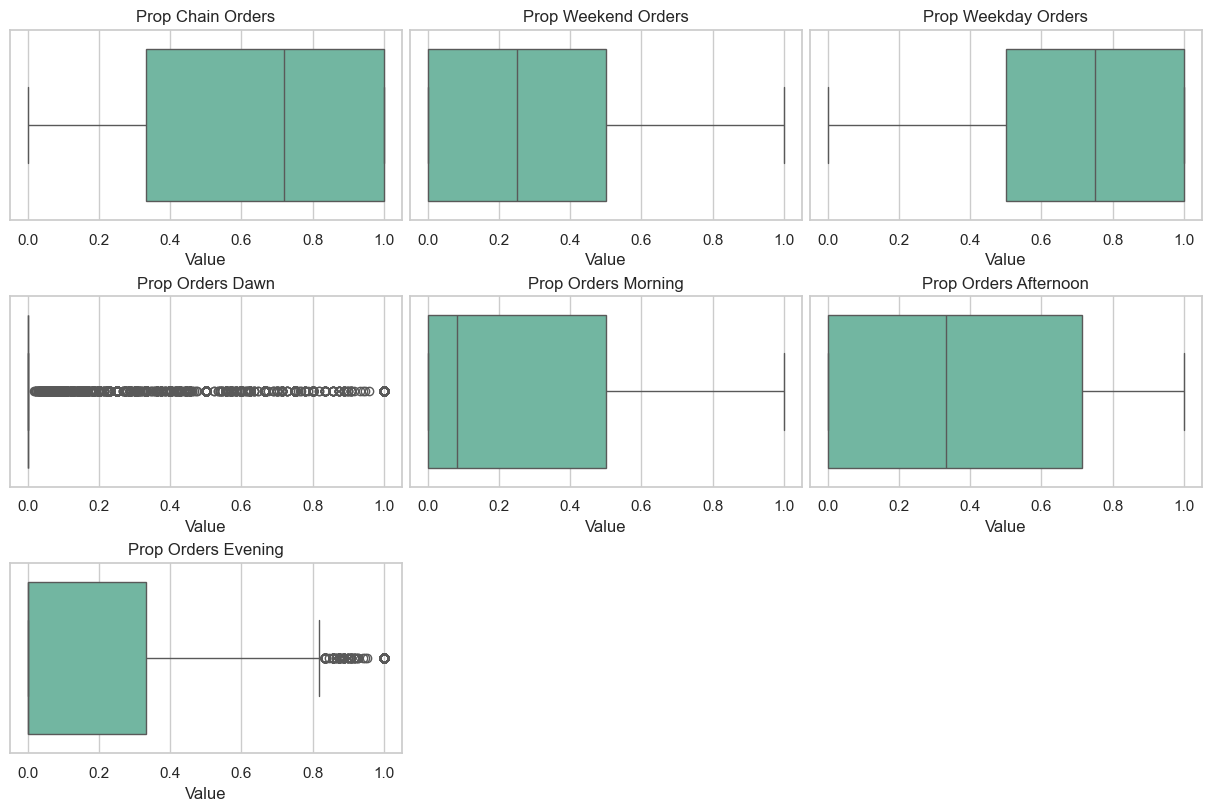

In [133]:
# Create a list of tuples for column names and titles
columns_and_titles_prop_orders = [(col, col.replace('_', ' ').title()) for col in prop_orders_columns]

# Use the plot_horizontal_boxplots function
plot_boxplots(df_new_features, columns_and_titles_prop_orders, cols=3)

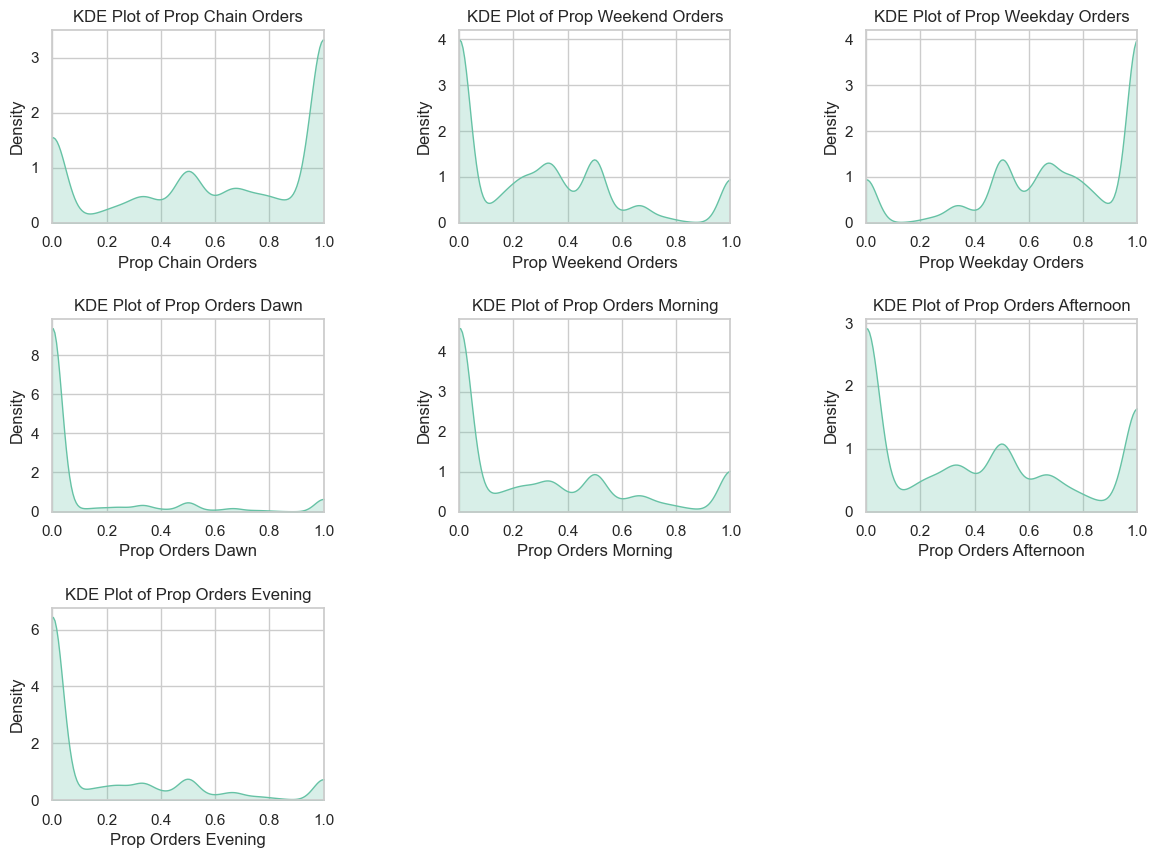

In [134]:
plot_kde_plots(df_new_features, columns_and_titles_prop_orders, xlim=(0, 1), row_spacing=0.5)

<a id = "outliers"></a>

# 6. Outliers (Before Feature Selection) <a id="outliers_before"></a>
[Back to ToC](#toc)<br>

**Note:**

 - Outlier treatment is performed after feature engineering to reduce complexity and focus on more meaningful features. By aggregating related variables, we streamline the analysis and avoid redundant work. This approach ensures that outlier detection targets the most relevant patterns and trends, improving efficiency and interpretability. Raw features will be only analyzed individually if they provide critical insights not captured by aggregated features
 - Additionally, only metric features will be evaluated for outliers, as non-metric features have already been analyzed and found to be acceptable

In [135]:
df_outliers = df_new_features.copy()

## 6.1. Defining Relevant Metric Features <a id="defining_features"></a>
[Back to 6. Outliers](#outliers)<br>

In [136]:
# Redefine auxiliary variables, because more features were added

# Define metric and non-metric features
metric_features = df_outliers.select_dtypes(include=['number']).columns.tolist()
non_metric_features = df_outliers.select_dtypes(exclude=['number']).columns.tolist()

# Exclude DOW, HR, cui, prop and chain_orders (because we have the prop of it) columns from metric features,
# because we won't treat the individual features if they have aggregated features

# Define the lists of columns to exclude
exclude_columns = dow_columns + hr_columns + cui_columns + orders_columns + prop_cui_columns + prop_orders_columns

# Select metric features that are not in the exclusion list
selected_metric_features = [feat for feat in metric_features if feat not in exclude_columns]

In [137]:
selected_metric_features

['customer_age',
 'vendor_count',
 'product_count',
 'first_order',
 'last_order',
 'total_cui_spending',
 'total_orders',
 'order_recency',
 'avg_daily_orders',
 'avg_order_value',
 'promo_used']

## 6.2. Histograms and Boxplots <a id="visualizations"></a>
[Back to 6. Outliers](#outliers)<br>

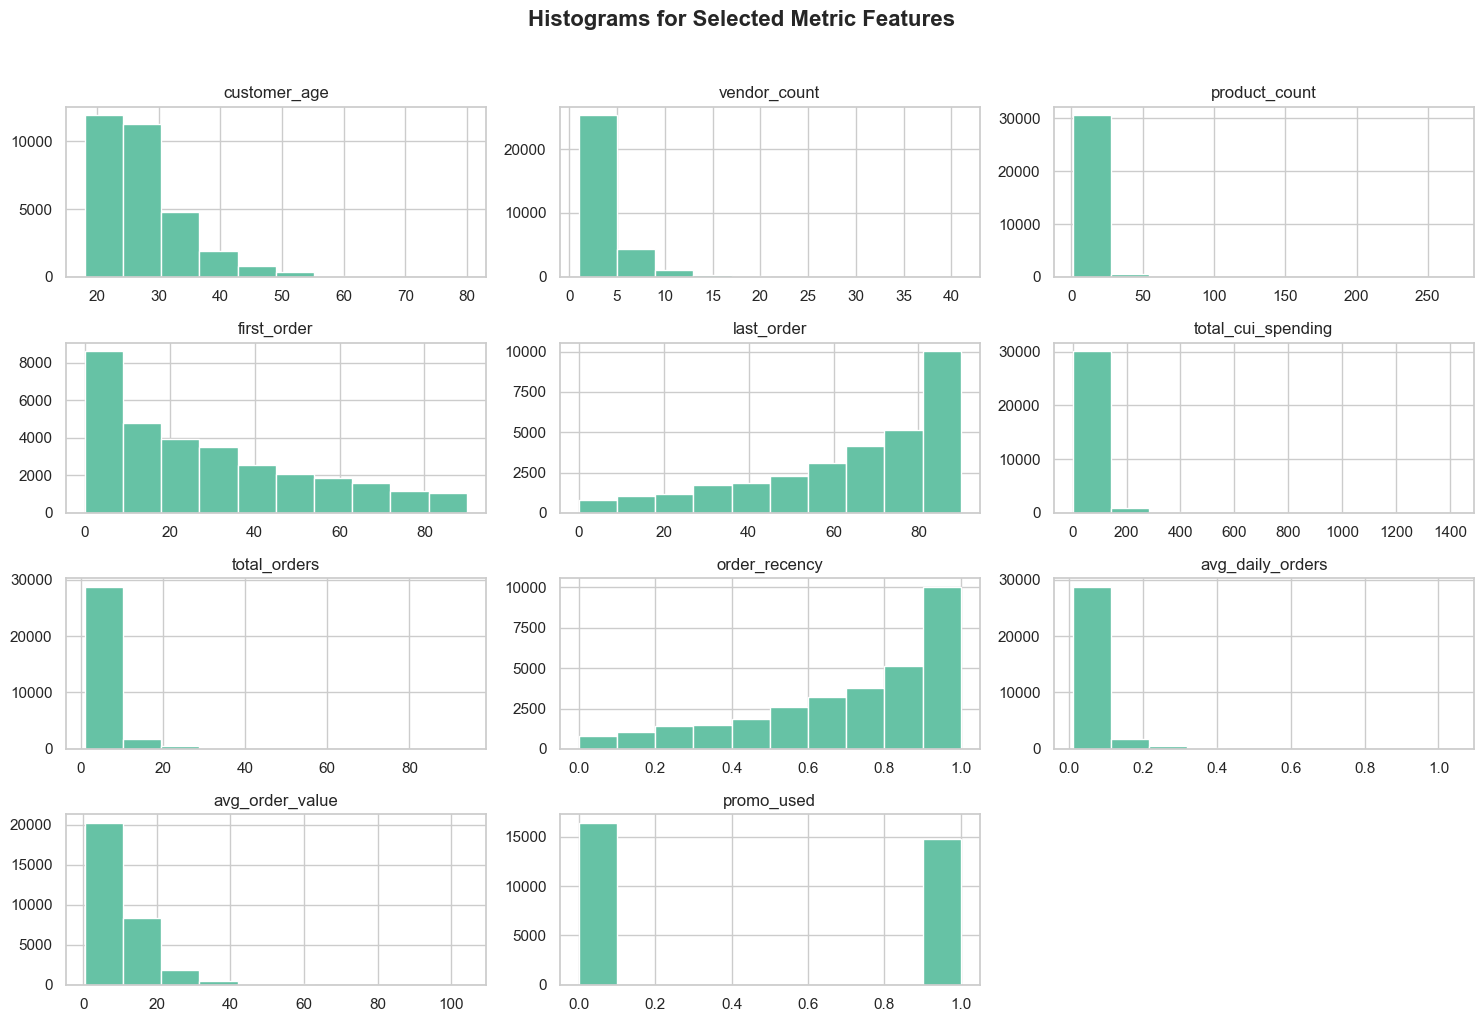

In [138]:
# Create histograms for each selected metric features
df_outliers[selected_metric_features].hist(figsize=(15, 10))

plt.suptitle("Histograms for Selected Metric Features", fontsize=16, weight='bold', y=1.02)

plt.tight_layout()
plt.show()

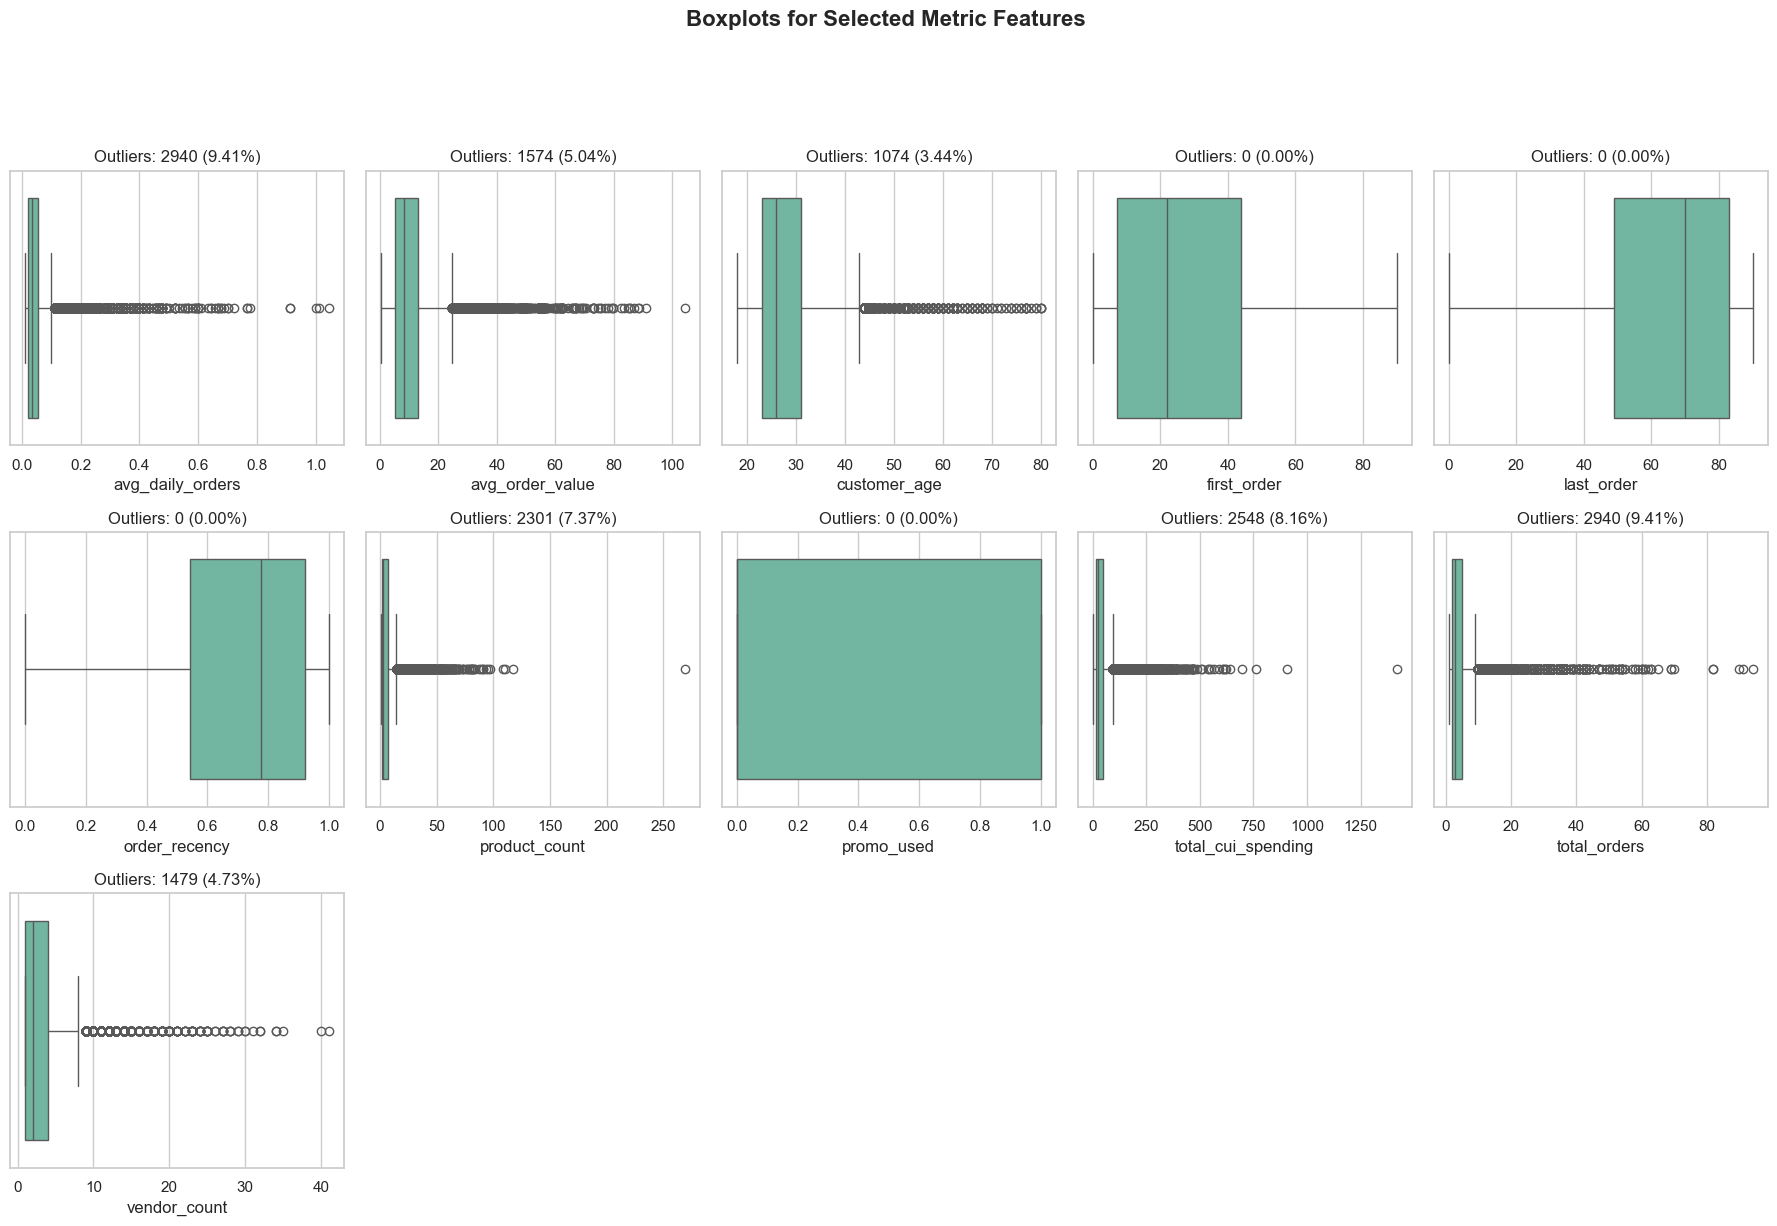

In [139]:
# Create boxplots for each selected metric feature
plot_boxplots_iqr_outliers(
    features=selected_metric_features, 
    df=df_outliers, 
    title="Boxplots for Selected Metric Features",
    sort_by="alphabet"
)

In [140]:
# Define features without outliers (based on boxplots visualization)
# customer_age are not outliers (feature was already treated before)

no_outliers_features = [
    'customer_age',
    "first_order",
    "last_order",
    "order_recency",
    "promo_used",
]
# Features with outliers
outliers_features = list(set(selected_metric_features) - set(no_outliers_features))

## 6.3 Approach 1 (Not Used) <a id="approach_1"></a>
[Back to 6. Outliers](#outliers)<br>

In [141]:
df_outliers = df_new_features.copy()

### 6.3.1 IQR Method <a id="iqr_method"></a>

In [142]:
def drop_outliers_iqr(df_outliers, outliers_features):
    # Calculate Q1, Q3, and IQR for each metric feature
    Q1 = df_outliers[outliers_features].quantile(0.25)
    Q3 = df_outliers[outliers_features].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate upper and lower bounds
    upper_lim = Q3 + 1.5 * IQR
    lower_lim = Q1 - 1.5 * IQR

    # Create a filter for rows within bounds
    filter_mask = (df_outliers[outliers_features] >= lower_lim) & (df_outliers[outliers_features] <= upper_lim)
    
    # Keep rows where all conditions are True across metric features
    filter_mask = filter_mask.all(axis=1)

    # Filter the original dataframe
    df_filtered = df_outliers[filter_mask]
    
    return df_filtered

In [143]:
# Apply IQR method
outliers_iqr = drop_outliers_iqr(df_outliers, outliers_features)

# Calculate the number of rows before and after removing outliers
original_count = len(df_outliers)
filtered_count = len(outliers_iqr)

# Calculate the percentage of rows removed
rows_removed = original_count - filtered_count
percentage_removed = (rows_removed / original_count) * 100

# Output the result
print(f'Outliers removed due to IQR method: {rows_removed} ({percentage_removed:.2f}%)')

Outliers removed due to IQR method: 5320 (17.03%)


**Conclusion:**
- As we can notice, this approach is problematic since it removes considerable number of observations - 5320 (17.03%) - as we expected based on the boxplots visualization
- Therefore, we will take two key actions: (1) eliminate outliers that are considered very extreme (2) adjust the remaining outliers, by capping them at the upper or lower boundary limits

## 6.4 Approach 2 (Not Used) <a id="approach_2"></a>
[Back to 6. Outliers](#outliers)<br>

In [144]:
df_outliers = df_new_features.copy()

### 6.4.1. Manual Method <a id="manual_method"></a>

In [ ]:
# df_outliers[outliers_features].describe().T

In [ ]:
# # Define conditions for each feature to identify outliers
# filters_manual = (
#     (df_outliers['avg_daily_orders'] <= 0.8) &
#     (df_outliers['avg_order_value'] <= 100) &
#     (df_outliers['product_count'] <= 150) &
#     (df_outliers['total_cui_spending'] <= 800) &
#     (df_outliers['total_orders'] <= 80) &
#     (df_outliers['vendor_count'] <= 38) 
# )

# # Calculate the number of rows before filtering
# original_count = len(df_outliers)

# # Identify the outliers (to save in a CSV file)
# removed_outliers = df_outliers[~filters_manual]

# # Filter the data based on the conditions
# df_outliers = df_outliers[filters_manual]

# # Calculate the number and percentage of rows removed
# rows_removed = len(removed_outliers)
# perc_removed = rows_removed / original_count * 100

# # Print the result
# print(f"Outliers removed due to manual method: {rows_removed} ({round(perc_removed, 2)}%)")

In [ ]:
# # Create boxplots for each selected metric feature
# plot_boxplots_iqr_outliers(
#     features=outliers_features, 
#     df=df_outliers,
#     title="After Removing Outliers with Manual Method: Boxplots for Selected Metric Features without Outliers",
#     sort_by="outliers"
# )

In [ ]:
# df_outliers[outliers_features].describe().T

### 6.4.2 Winsorizing <a id="winsorizing"></a>

Winsorizing the data involves replacing the outliers with the nearest non-outlier values. This ensures that the extreme values are still accounted for in the analysis, but their impact is minimized.

In [149]:
def winsorization_analysis(df, features, iqr_multipliers):
    # Get the total number of rows
    total_rows = len(df)

    # Initialize a list to store the total number of unique affected rows for each multiplier
    affected_rows_summary = []

    # Loop through each multiplier
    for multiplier in iqr_multipliers:
        # Make a copy of the original dataframe for the current multiplier
        df_copy = df.copy()

        # Set to track all unique affected rows for the current multiplier
        affected_rows_set = set()

        # Loop through each feature
        for col in features:
            if col == 'orders_dawn':
                # Manual winsorization for "orders_dawn" - otherwise it will be clipped to 0
                lower_bound = 0
                upper_bound = 15
            else:
                # Calculate IQR bounds using the current multiplier
                Q1 = df_copy[col].quantile(0.25)
                Q3 = df_copy[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - multiplier * IQR
                upper_bound = Q3 + multiplier * IQR

            # Identify rows that are outliers with the selected bounds
            affected_rows = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)]

            # Add the indices of affected rows to the set to track unique affected rows for this multiplier
            affected_rows_set.update(affected_rows.index)
            
            # Apply winsorization (clip values to within bounds)
            df_copy[col] = df_copy[col].clip(lower=lower_bound, upper=upper_bound)

        # Calculate total number of unique affected rows for the current multiplier
        unique_affected_rows = len(affected_rows_set)
        total_affected_percentage = (unique_affected_rows / total_rows) * 100

        # Append the results to the summary list
        affected_rows_summary.append({
            'IQR Multiplier': multiplier,
            'Affected Rows': unique_affected_rows,
            '% Affected Rows': round(total_affected_percentage, 2)
        })

    # Convert the summary list to a DataFrame
    affected_rows_df = pd.DataFrame(affected_rows_summary)

    return affected_rows_df

In [ ]:
# # Define the IQR multipliers
# iqr_multipliers = [x / 2 for x in range(2, 21)]

# affected_rows_df = winsorization_analysis(df_outliers, outliers_features, iqr_multipliers)
# affected_rows_df

In [ ]:
# # Plot the scree plot
# plt.figure(figsize=(8, 5))
# plt.plot(affected_rows_df["IQR Multiplier"], affected_rows_df["% Affected Rows"], marker='o', linestyle='-', color='b')
# plt.title('Scree Plot', fontsize=14)
# plt.xlabel('IQR Multiplier', fontsize=12)
# plt.ylabel('Percentage of Rows Affected (%)', fontsize=12)
# plt.grid(alpha=0.3)
# plt.xticks(iqr_multipliers)
# plt.tight_layout()
# plt.show()

**Decision:** We select an IQR multiplier of 3.5, as it balances the need to handle outliers while being conservative, affecting only 5.51% of rows.

In [152]:
def winsorization(df, features, iqr_multiplier):
    # Initialize a list to store the number of affected rows for each feature
    count_affected_rows = []
    # Set to track all unique affected rows
    affected_rows_set = set()

    # Get the total number of rows
    total_rows = len(df)

    # Loop through each feature
    for col in features:
        if col == 'orders_dawn':
            # Manual winsorization for "orders_dawn" - otherwise it will be clipped to 0
            lower_bound = 0
            upper_bound = 15
        else:
            # Calculate IQR bounds
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR

        # Identify rows that are outliers
        affected_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        affected_row_count = len(affected_rows)

        # Add the indices of affected rows to the set to track unique affected rows
        affected_rows_set.update(affected_rows.index)
        
        # Calculate percentage of affected rows for the feature
        affected_percentage = (affected_row_count / total_rows) * 100

        # Store the count and percentage for each feature
        count_affected_rows.append((col, affected_row_count, affected_percentage))

        # Apply winsorization
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    # Sort features by the percentage of affected rows in descending order
    count_affected_rows = sorted(count_affected_rows, key=lambda x: x[2], reverse=True)

    # Calculate total number of unique affected rows
    unique_affected_rows = len(affected_rows_set)
    total_affected_percentage = (unique_affected_rows / total_rows) * 100

    # Print results
    print("Affected Rows per Feature:\n")
    for col, count, percentage in count_affected_rows:
        print(f"{col}: {count} ({percentage:.2f}%)")

    print(f"\nTotal Affected Rows: {unique_affected_rows} ({total_affected_percentage:.2f}%)")

    return df

In [ ]:
# # Apply winsorization with chosen IQR multiplier
# df_outliers = winsorization(df_outliers, outliers_features, iqr_multiplier = 3.5)

In [ ]:
# # Create boxplots for each selected metric feature
# plot_boxplots_iqr_outliers(
#     features=outliers_features, 
#     df=df_outliers,
#     title="After Treating Outliers with Winsorization Method: Boxplots for Selected Metric Features without Outliers",
#     sort_by="outliers"
# )

## 6.5. Approach 3 (Used) <a id="approach_3"></a>
[Back to 6. Outliers](#outliers)<br>

In [155]:
df_outliers = df_new_features.copy()

### 6.5.1. DBSCAN <a id="dbscan_outliers"></a>
[Back to 6. Outliers](#outliers)<br>

#### 6.5.1.1. Identify eps value (elbow method) <a id="eps"></a>

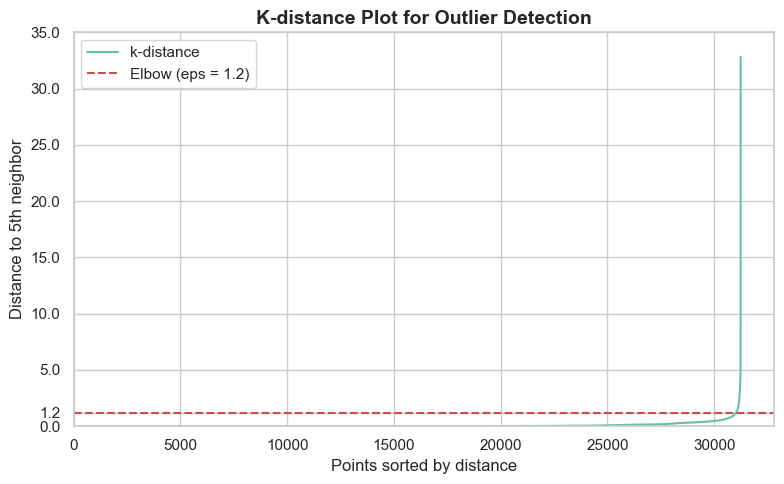

In [156]:
# Select numeric features for DBSCAN
X = df_outliers[outliers_features]

# Standardize the data (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set number of neighbors
k = 5

# Fit nearest neighbors
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances
distances = np.sort(distances[:, k-1])

# Plot distances
plt.figure(figsize=(8, 5))
plt.plot(distances, label='k-distance')

# Set elbow line at y=1.2
elbow_value = 1.2
plt.axhline(y=elbow_value, color='r', linestyle='--', label=f'Elbow (eps = {elbow_value})')

# Set axis limits to start from 0
plt.xlim(0)
plt.ylim(0, max(distances) + 1)

# Annotate the elbow point on the y-axis
plt.yticks(list(plt.yticks()[0]) + [elbow_value])  # Add 3 to the y-ticks

# Annotate the plot
plt.title('K-distance Plot for Outlier Detection', fontsize=14, weight='bold')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}th neighbor')
plt.legend()
plt.tight_layout()
plt.show()

#### 6.4.1.2. Choose min_samples value <a id="min_samples"></a>

In [157]:
# Set the parameters for DBSCAN
min_samples_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
eps = 1.2 # Based on elbow point

# Initialize lists to store results
outliers_count = []
outliers_percentage = []

# Loop through different min_samples values and run DBSCAN
for min_samples in min_samples_values:
    # Perform DBSCAN clustering
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)
    
    # Count the number of outliers
    count_outliers = np.sum(labels == -1)
    
    # Calculate the percentage of outliers
    percentage_outliers = round((count_outliers / len(X_scaled)) * 100, 2)
    
    # Append results to lists
    outliers_count.append(count_outliers)
    outliers_percentage.append(percentage_outliers)

# Create a DataFrame with the results
dbscan_results_df = pd.DataFrame({
    'min_samples': min_samples_values,
    'Outliers': outliers_count,
    '% Outliers': outliers_percentage
})

# Display the DataFrame
dbscan_results_df

min_samples  Outliers  % Outliers
0            2        94        0.30
1            3       118        0.38
2            4       143        0.46
3            5       163        0.52
4            6       179        0.57
5            7       194        0.62
6            8       213        0.68
7            9       229        0.73
8           10       245        0.78

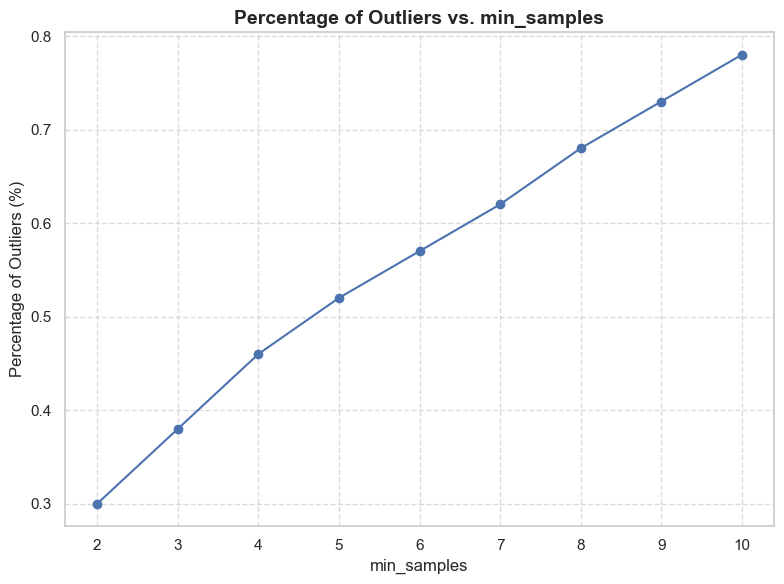

In [158]:
# Create an elbow plot
plt.figure(figsize=(8, 6))
plt.plot(dbscan_results_df['min_samples'], dbscan_results_df['% Outliers'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Percentage of Outliers vs. min_samples', fontsize=14, weight='bold')
plt.xlabel('min_samples', fontsize=12)
plt.ylabel('Percentage of Outliers (%)', fontsize=12)

# Display the grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

**Conclusion:** We chose min_samples = 8, removing 0.68% of data as outliers. This balances identifying outliers while keeping the removal manageable, with only 119 more outliers compared to the most lenient case (min_samples = 2).

#### 6.4.1.3. Apply DBSCAN <a id="apply_dbscan_outliers"></a>

In [159]:
# Select numeric features for DBSCAN
X = df_outliers[outliers_features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set the parameters for DBSCAN
min_samples = 8
eps = 1.2

# Apply DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X_scaled)

# Identify outlier indices
outlier_indices = np.where(labels == -1)[0]

# Count the number of outliers
count_outliers = len(outlier_indices)

# Calculate the percentage of outliers
perc_outliers = (count_outliers / len(X_scaled)) * 100

# Save the outliers
outliers = df_outliers.iloc[outlier_indices]

# Filter the original dataset to exclude the outliers
df_outliers.drop(index=outliers.index, inplace=True)

# Output the results
print(f"Outliers removed due to DBSCAN: {count_outliers} ({perc_outliers:.2f}%)")

Outliers removed due to DBSCAN: 213 (0.68%)


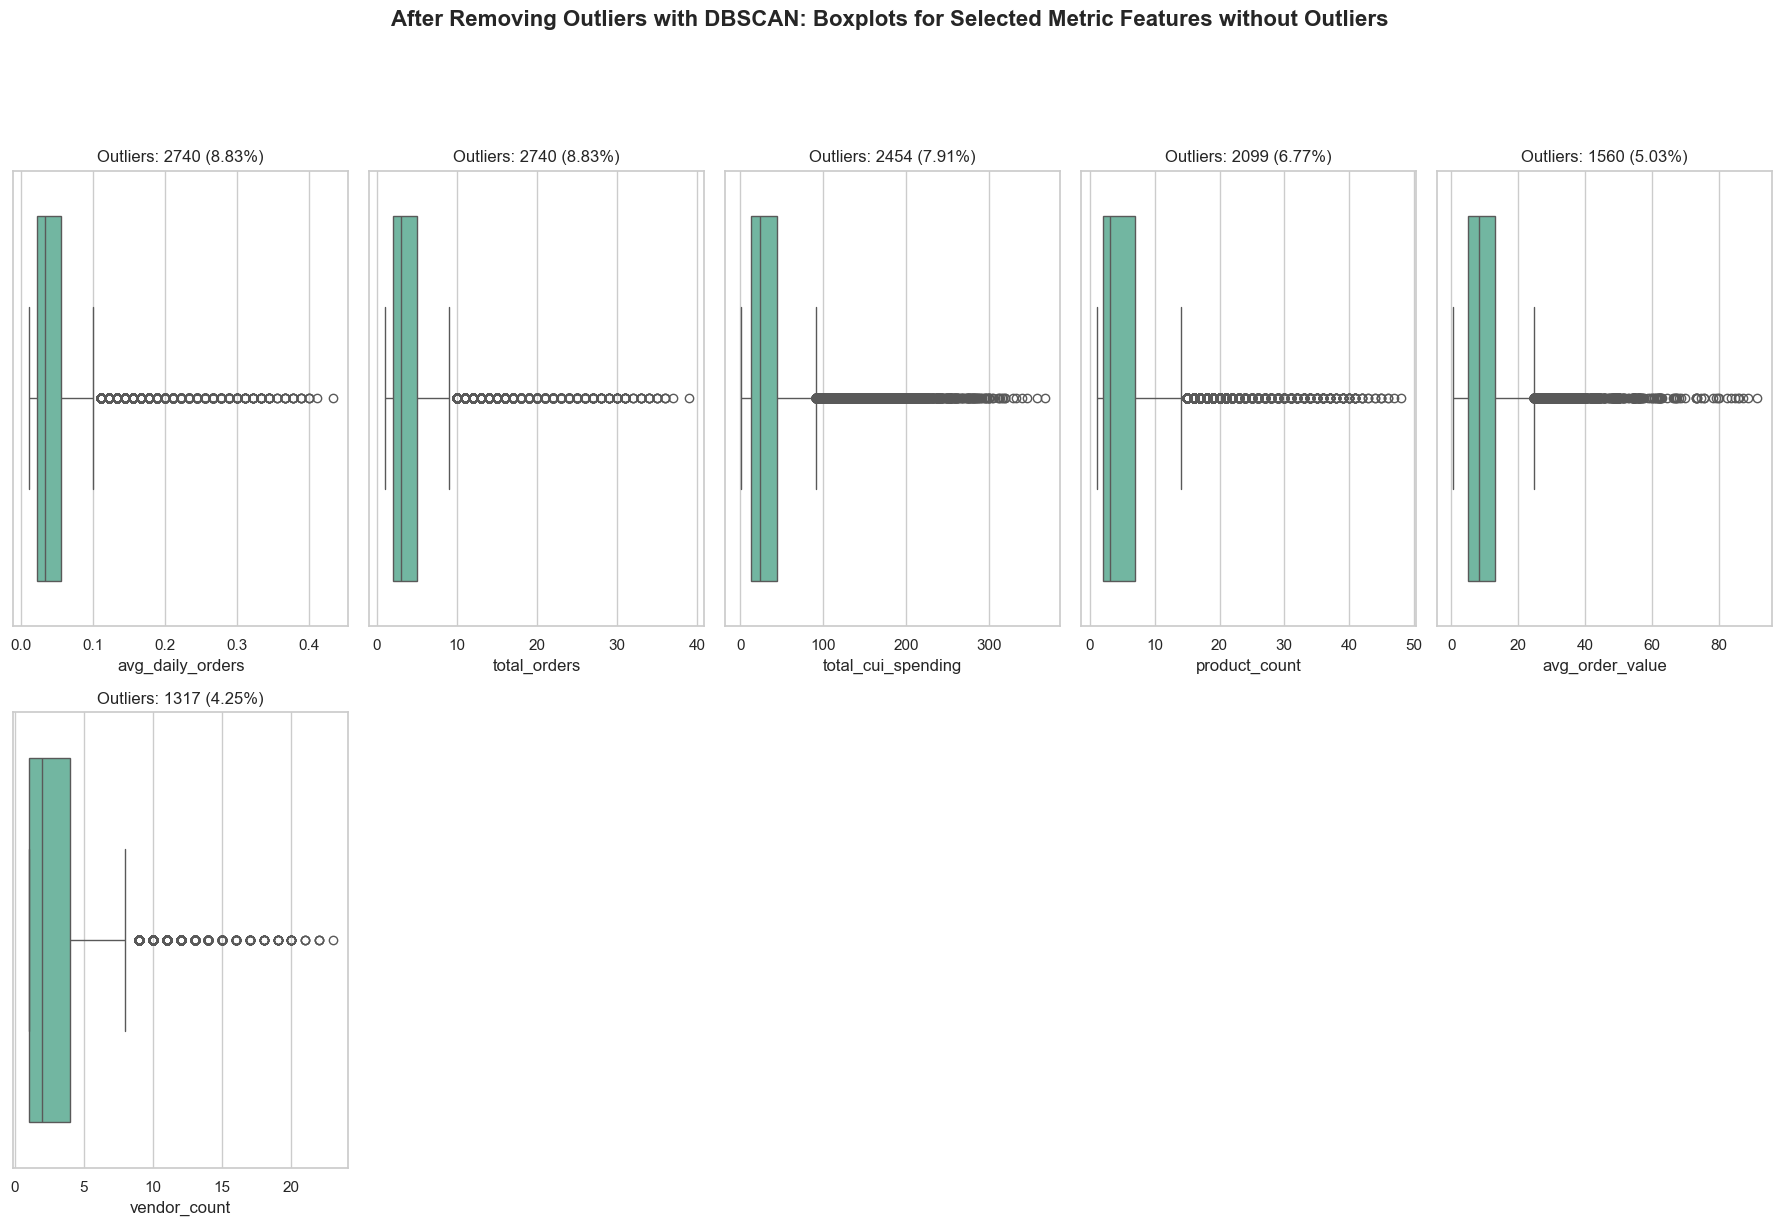

In [160]:
# Create boxplots for each selected metric feature
plot_boxplots_iqr_outliers(
    features=outliers_features, 
    df=df_outliers,
    title="After Removing Outliers with DBSCAN: Boxplots for Selected Metric Features without Outliers",
    sort_by="outliers"
)

### 6.5.2. Winsorizing <a id="winsorizing_after_dbscan"></a>

Winsorizing the data involves replacing the outliers with the nearest non-outlier values. This ensures that the extreme values are still accounted for in the analysis, but their impact is minimized.

In [161]:
# Define the IQR multipliers
iqr_multipliers = [x / 2 for x in range(2, 21)]

affected_rows_df = winsorization_analysis(df_outliers, outliers_features, iqr_multipliers)
affected_rows_df

IQR Multiplier  Affected Rows  % Affected Rows
0              1.0           7479            24.11
1              1.5           5193            16.74
2              2.0           3896            12.56
3              2.5           2749             8.86
4              3.0           2163             6.97
5              3.5           1547             4.99
6              4.0           1211             3.90
7              4.5            914             2.95
8              5.0            717             2.31
9              5.5            516             1.66
10             6.0            370             1.19
11             6.5            276             0.89
12             7.0            180             0.58
13             7.5            134             0.43
14             8.0             94             0.30
15             8.5             57             0.18
16             9.0             36             0.12
17             9.5             19             0.06
18            10.0             11             0.04

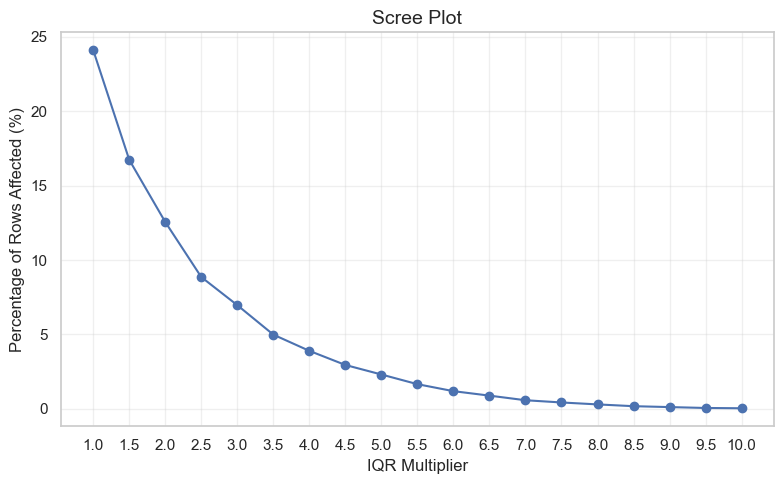

In [162]:
# Plot the scree plot
plt.figure(figsize=(8, 5))
plt.plot(affected_rows_df["IQR Multiplier"], affected_rows_df["% Affected Rows"], marker='o', linestyle='-', color='b')
plt.title('Scree Plot', fontsize=14)
plt.xlabel('IQR Multiplier', fontsize=12)
plt.ylabel('Percentage of Rows Affected (%)', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(iqr_multipliers)
plt.tight_layout()
plt.show()

**Decision:** We select an IQR multiplier of 3.5, as it balances the need to handle outliers while being conservative, affecting only 4.99% of rows.

In [163]:
# Apply winsorization with chosen IQR multiplier
df_outliers = winsorization(df_outliers, outliers_features, iqr_multiplier = 3.5)

Affected Rows per Feature:

avg_daily_orders: 886 (2.86%)
total_orders: 886 (2.86%)
total_cui_spending: 707 (2.28%)
product_count: 535 (1.72%)
avg_order_value: 238 (0.77%)
vendor_count: 146 (0.47%)

Total Affected Rows: 1547 (4.99%)


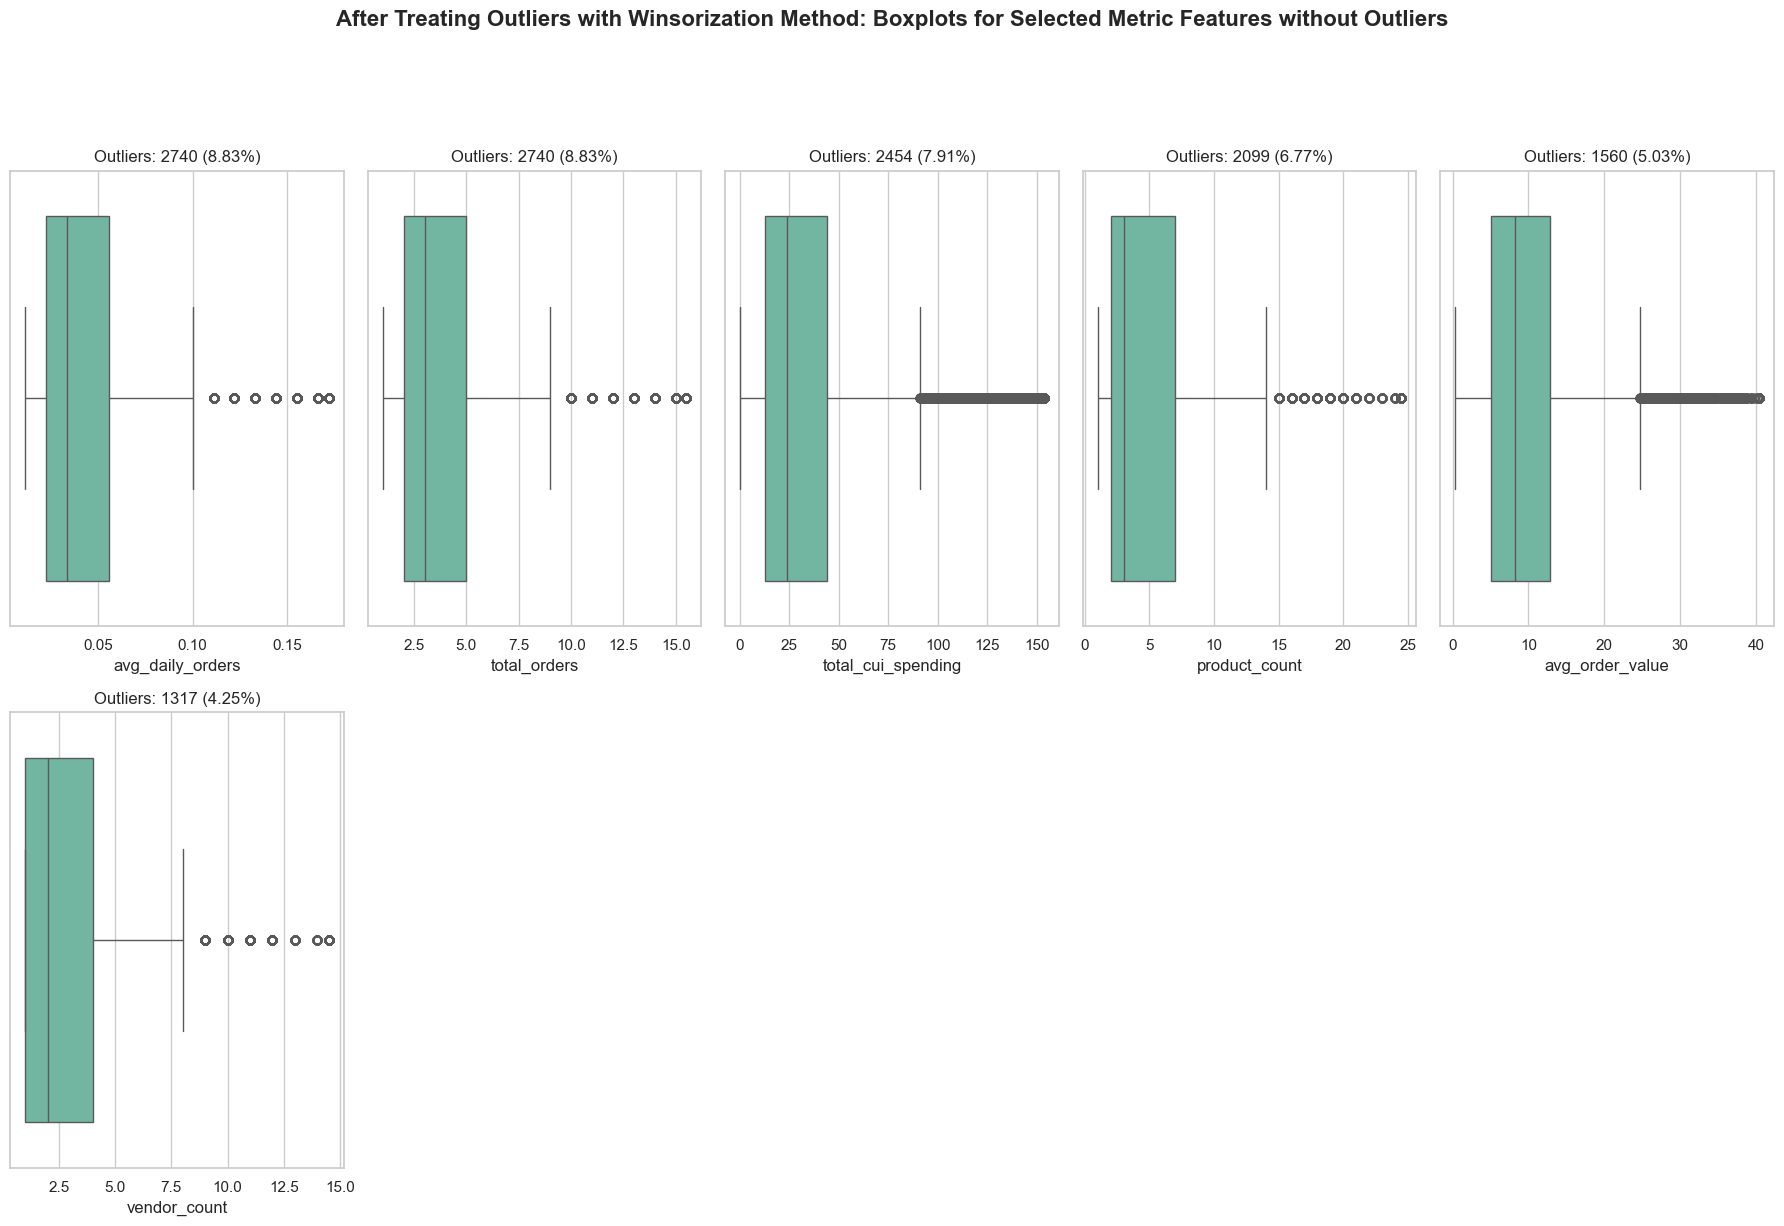

In [164]:
# Create boxplots for each selected metric feature
plot_boxplots_iqr_outliers(
    features=outliers_features, 
    df=df_outliers,
    title="After Treating Outliers with Winsorization Method: Boxplots for Selected Metric Features without Outliers",
    sort_by="outliers"
)

**Outliers Final Decision:** We chose the DBSCAN approach, which removes 213 rows (0.68%) and winsorizes 1547 rows (4.99%), over the manual method, which removes only `FIX THE FOLLOWIG VALUES` 33 rows (0.11%) and winsorizes 4189 rows (13.42%). DBSCAN is more robust as it identifies outliers (also multivariate outliers) based on data density and neighborhood relationships, capturing complex patterns that manual thresholds may miss. By optimizing DBSCAN parameters, we achieved a conservative yet comprehensive outlier detection.

In [165]:
df_outliers.to_csv('../Data/df_before_feature_selection.csv', index=True)

# 7. Feature Selection <a class="anchor" id="feature_selection"></a>
[Back to ToC](#toc)<br>

Feature selection is a vital step to enhance model performance, reduce complexity, and improve interpretability. Given the diversity of our dataset, which includes categories like demographics, ordering patterns, cuisine preferences, and more, analyzing all features collectively could overlook key relationships or objectives.

To address this, we opted to separate feature selection by category. This approach allows us to:

- **Focus on Category-Specific Insights**: Each category serves distinct goals, such as identifying peak ordering times or refining promotional strategies.
- **Mitigate Redundancy**: Features within the same category often correlate strongly, making it easier to identify the most impactful ones.
- **Simplify Interpretation**: Grouping features by logical categories makes the results more understandable.

This structured method ensures we retain the most relevant features while aligning with the objectives of each category.

In [166]:
df_feature_selection = df_outliers.copy()

## 7.1. Define Initial Perspectives <a id="initial_perspectives"></a>

In [167]:
prop_cui_columns

['prop_cui_american',
 'prop_cui_asian',
 'prop_cui_beverages',
 'prop_cui_cafe',
 'prop_cui_chicken dishes',
 'prop_cui_chinese',
 'prop_cui_desserts',
 'prop_cui_healthy',
 'prop_cui_indian',
 'prop_cui_italian',
 'prop_cui_japanese',
 'prop_cui_noodle dishes',
 'prop_cui_other',
 'prop_cui_street food / snacks',
 'prop_cui_thai',
 'prop_cui_asian_origin',
 'prop_cui_western',
 'prop_cui_other_origin',
 'prop_cui_main_dishes',
 'prop_cui_snacks_beverages']

In [168]:
prop_orders_columns

['prop_chain_orders',
 'prop_weekend_orders',
 'prop_weekday_orders',
 'prop_orders_dawn',
 'prop_orders_morning',
 'prop_orders_afternoon',
 'prop_orders_evening']

In [169]:
df_feature_selection['products_per_vendor'] = df_feature_selection['product_count'] / df_feature_selection['vendor_count'].replace(0, 1)

In [172]:
# Define perspectives and corresponding features
perspectives = {
    "customer_behavior": prop_orders_columns + [
        "first_order", "last_order", "order_recency",  # Temporal ordering
        "product_count", "vendor_count",  # Variety metrics
        "total_cui_spending", "total_orders",  # Aggregate spending and count
        "avg_daily_orders", "avg_order_value", # Averages over time
        "products_per_vendor"
    ],
    "cuisine_preferences": prop_cui_columns,
    "demographics": [
        "customer_region", "city", "generation", "customer_age", 
        "last_promo", "payment_method", "promo_used"
    ]
}

In [173]:
#Saving the original perpectives for later use (in a json file)
perspectives_filepath = os.path.join(os.getcwd(), "initial_perspectives.json")

# Save the perspectives dictionary as a JSON file
with open(perspectives_filepath, "w") as file:
    json.dump(perspectives, file, indent=4)

print(f"Perspectives dictionary has been saved to {perspectives_filepath}")

Perspectives dictionary has been saved to c:\Users\xandg\Ambiente de Trabalho\IMS\3rd year\1st Semester\Capstone Project\OpenAI\Capstone-Project\CustomerSegmentationDataMining\deliverables\initial_perspectives.json


`Notes:`
- We will only consider the features whose outliers have been treated, along with the proportion features. Specifically, we will prioritize aggregate features (e.g., `total_orders`) over individual features (e.g., `DOW_` and `HR_`) due to **dimensionality issues** and the **practicality** of handling outliers. Aggregate features offer a more concise and manageable representation of customer behavior, making them more suitable for analysis

- The **demographics** features, being categorical (except "customer_age"), will not be used directly in the clustering process. Instead, they will be leveraged after clustering to better interpret and characterize the resulting clusters

- If two features are highly correlated, we will prefer to retain the aggregate feature over its counterparts. This ensures a more streamlined feature set while preserving the most representative data for clustering

## 7.2. Customer Behavior <a id="customer_behavior"></a>

The customer_behavior perspective includes features that capture time-based ordering patterns (e.g., day of the week and hour of the day), ordering frequencies, and recency metrics. These features highlight when and how customers interact with services, as well as their preferences for specific times of the day and week. Additionally, it includes metrics for order variety (e.g., product and vendor counts), aggregate spending and order counts, and average daily activity and spending per order, providing a comprehensive view of customer behavior patterns.

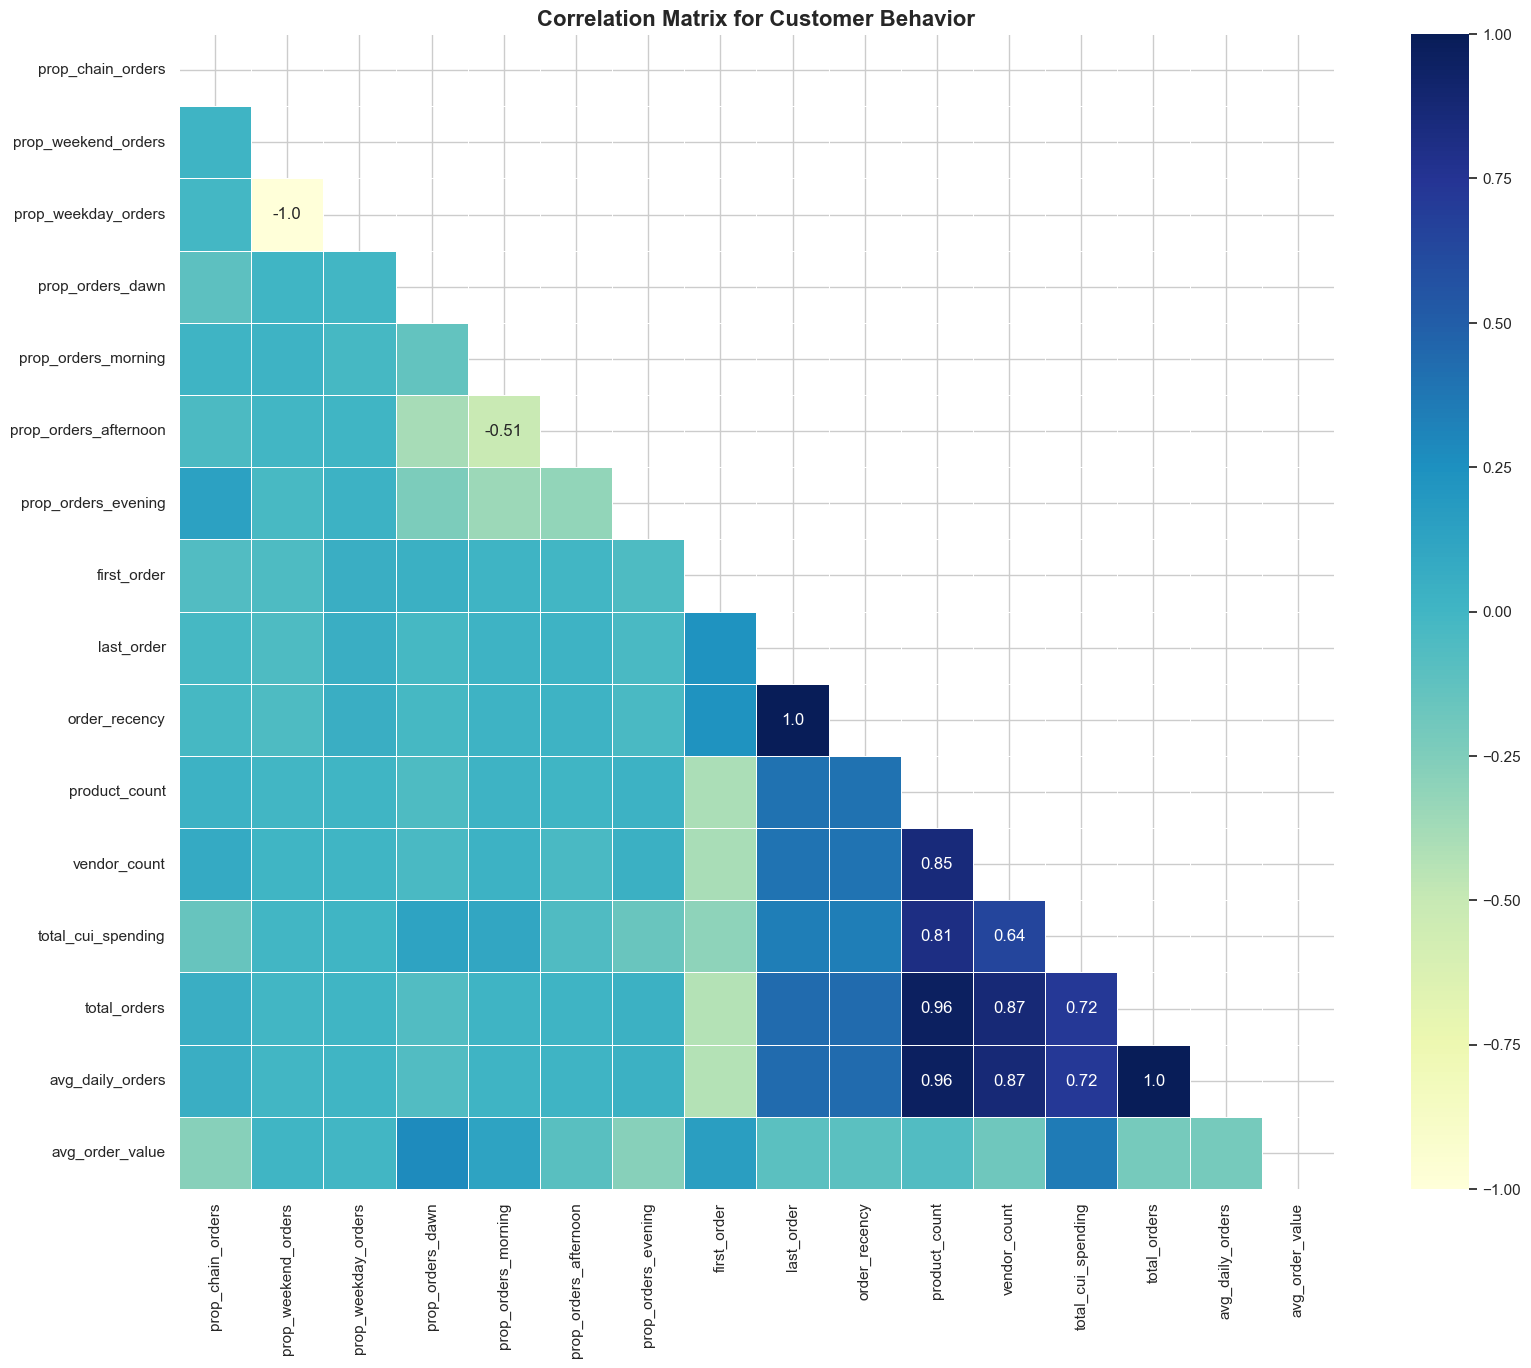

In [170]:
# Filter customer_behavior features
behavior_features = perspectives["customer_behavior"]
behavior_data = df_feature_selection[behavior_features]

# Compute correlation matrix
behavior_corr = behavior_data.corr(method="pearson").round(3)

# Plot correlation matrix
plot_matrix(
    behavior_corr, 
    title="Correlation Matrix for Customer Behavior",
    threshold=0.5, figsize=(20, 15)
)

In [171]:
# Create products_per_vendor feature
df_feature_selection['products_per_vendor'] = df_feature_selection['product_count'] / df_feature_selection['vendor_count'].replace(0, 1)

Let's visualize also the distribution this created feature.

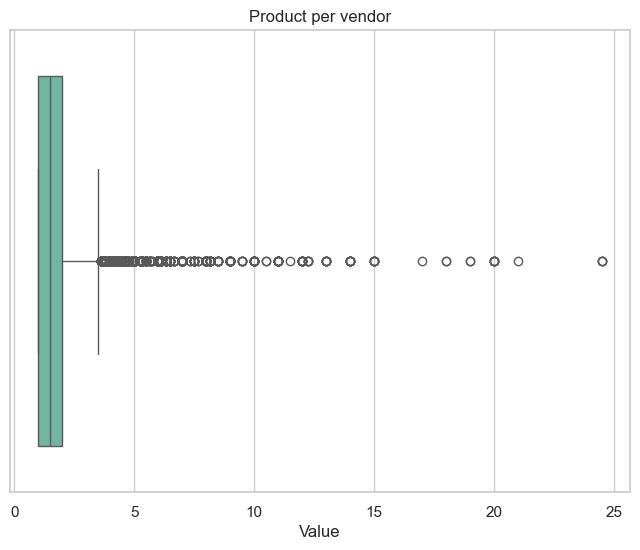

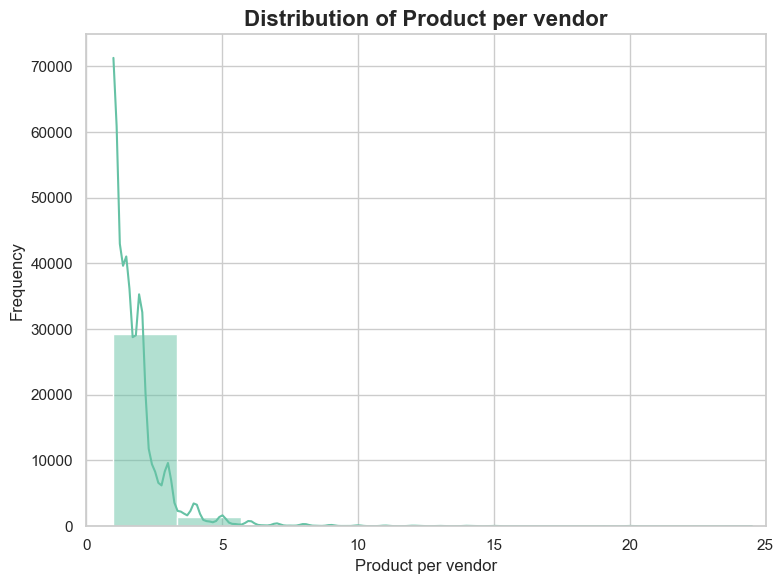

In [172]:
plot_boxplots(df_feature_selection, [('products_per_vendor', 'Product per vendor')])

# Histogram for 'cui_snacks_beverages'
plot_distribution(
    data=df_feature_selection, 
    x="products_per_vendor",
    plot_type="hist", 
    title="Distribution of Product per vendor", 
    xlabel="Product per vendor", 
    ylabel="Frequency", 
    xlim=(0,25),
    kde=True,
    bins=10,
    show_counts=False
)

Now let's proceed with the feature selection, while adding products_per_vendor to the dictionary.

In [173]:
# Update customer_behavior category by removing redundant features and adding the new features
perspectives["customer_behavior"] = [
    feature for feature in perspectives["customer_behavior"]
    if feature not in [
        "product_count", "vendor_count", # Highly correlated with each other and other features (use new feature - products_per_vendor)
        "prop_weekday_orders", # Highly correlated with prop_weekend_orders
    ]
]

# Add the new features to the customer behavior category
perspectives["customer_behavior"].append("products_per_vendor")

# Verify the updated Purchasing Habits features
print("Updated customer behavior features:", perspectives["customer_behavior"])

Updated customer behavior features: ['prop_chain_orders', 'prop_weekend_orders', 'prop_orders_dawn', 'prop_orders_morning', 'prop_orders_afternoon', 'prop_orders_evening', 'first_order', 'last_order', 'order_recency', 'total_cui_spending', 'total_orders', 'avg_daily_orders', 'avg_order_value', 'products_per_vendor']


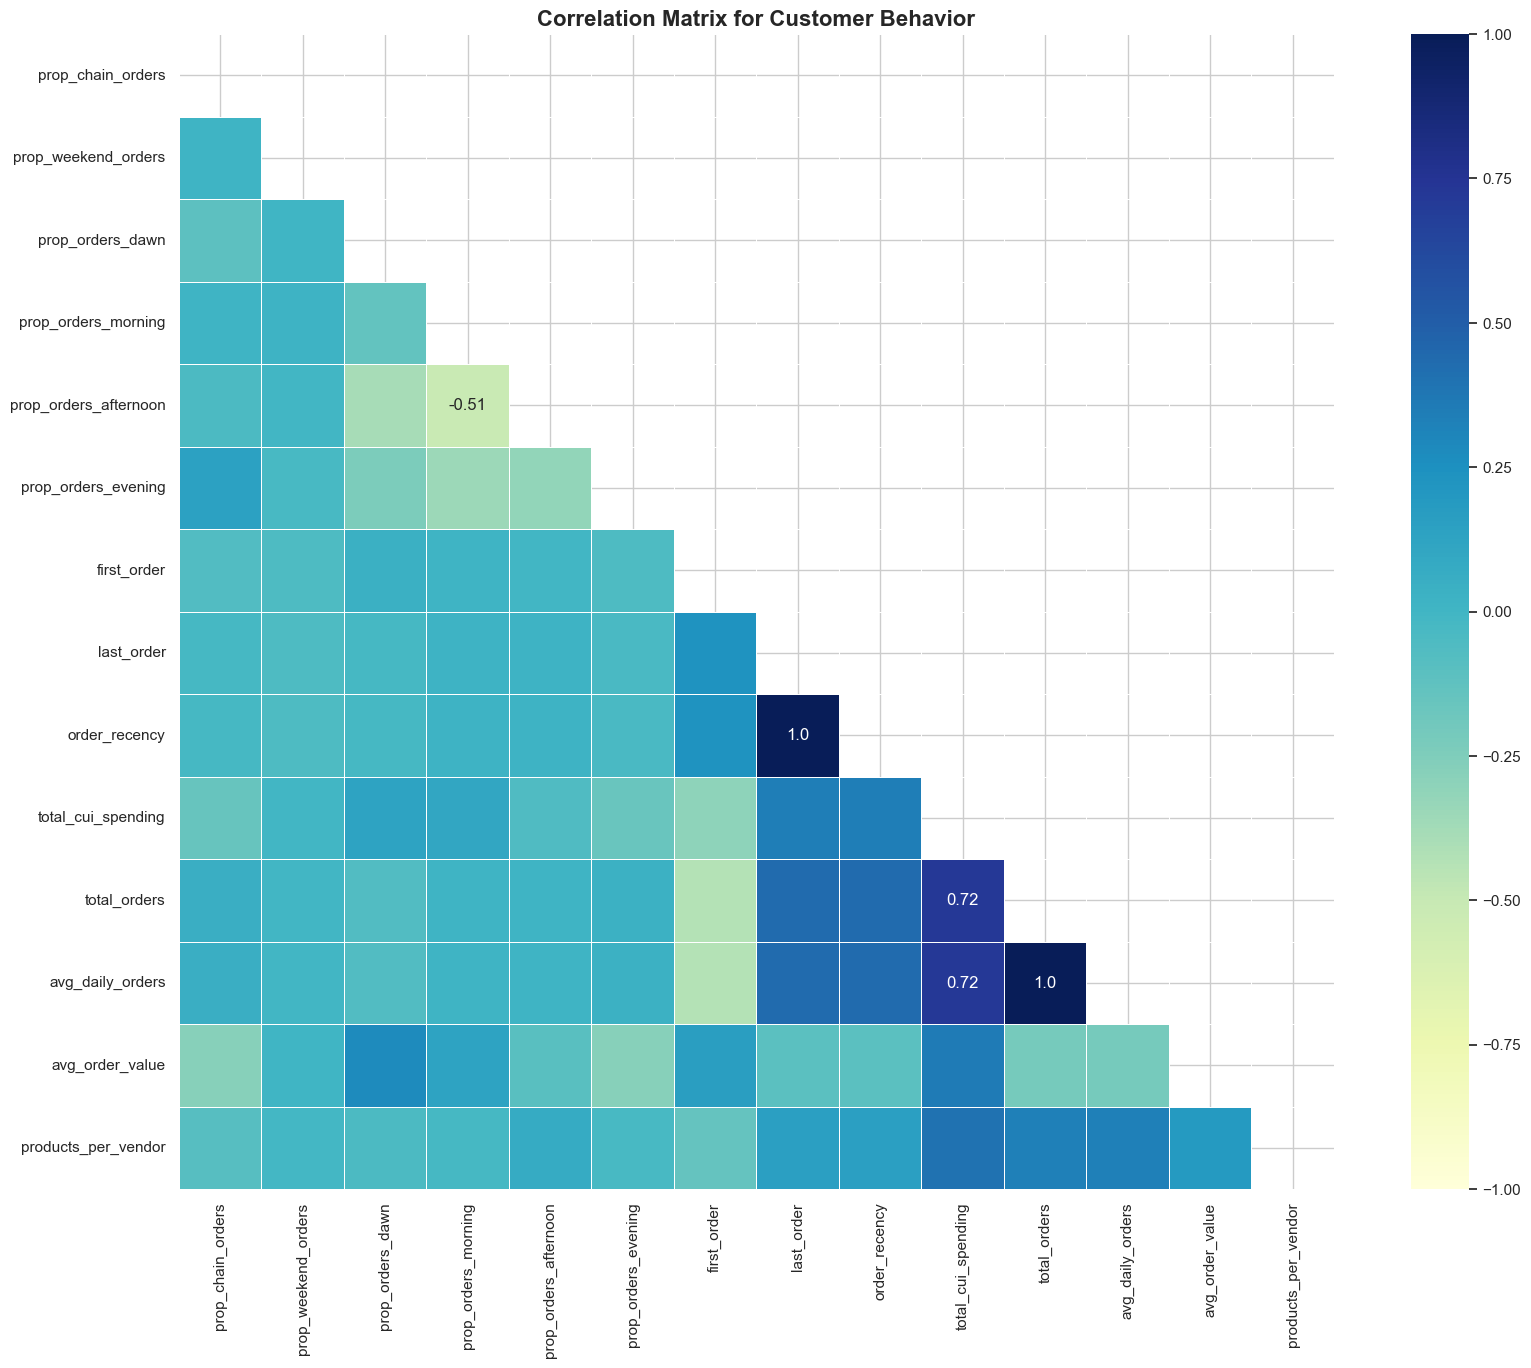

In [174]:
# Filter customer_behavior features
behavior_features = perspectives["customer_behavior"]
behavior_data = df_feature_selection[behavior_features]

# Compute correlation matrix
behavior_corr = behavior_data.corr(method="pearson").round(3)

# Plot correlation matrix
plot_matrix(
    behavior_corr, 
    title="Correlation Matrix for Customer Behavior",
    threshold=0.5, figsize=(20, 15)
)

In [175]:
# Update customer_behavior category by removing redundant features
perspectives["customer_behavior"] = [
    feature for feature in perspectives["customer_behavior"]
    if feature not in [
        "last_order", # Perfect correlated with order_recency
        "total_orders", "avg_daily_orders", # Highly correlated with total_cui_spending
        "prop_orders_afternoon", # Highly correlated with prop_orders_morning
    ]
]

# Verify the updated Purchasing Habits features
print("Updated customer behavior features:", perspectives["customer_behavior"])

Updated customer behavior features: ['prop_chain_orders', 'prop_weekend_orders', 'prop_orders_dawn', 'prop_orders_morning', 'prop_orders_evening', 'first_order', 'order_recency', 'total_cui_spending', 'avg_order_value', 'products_per_vendor']


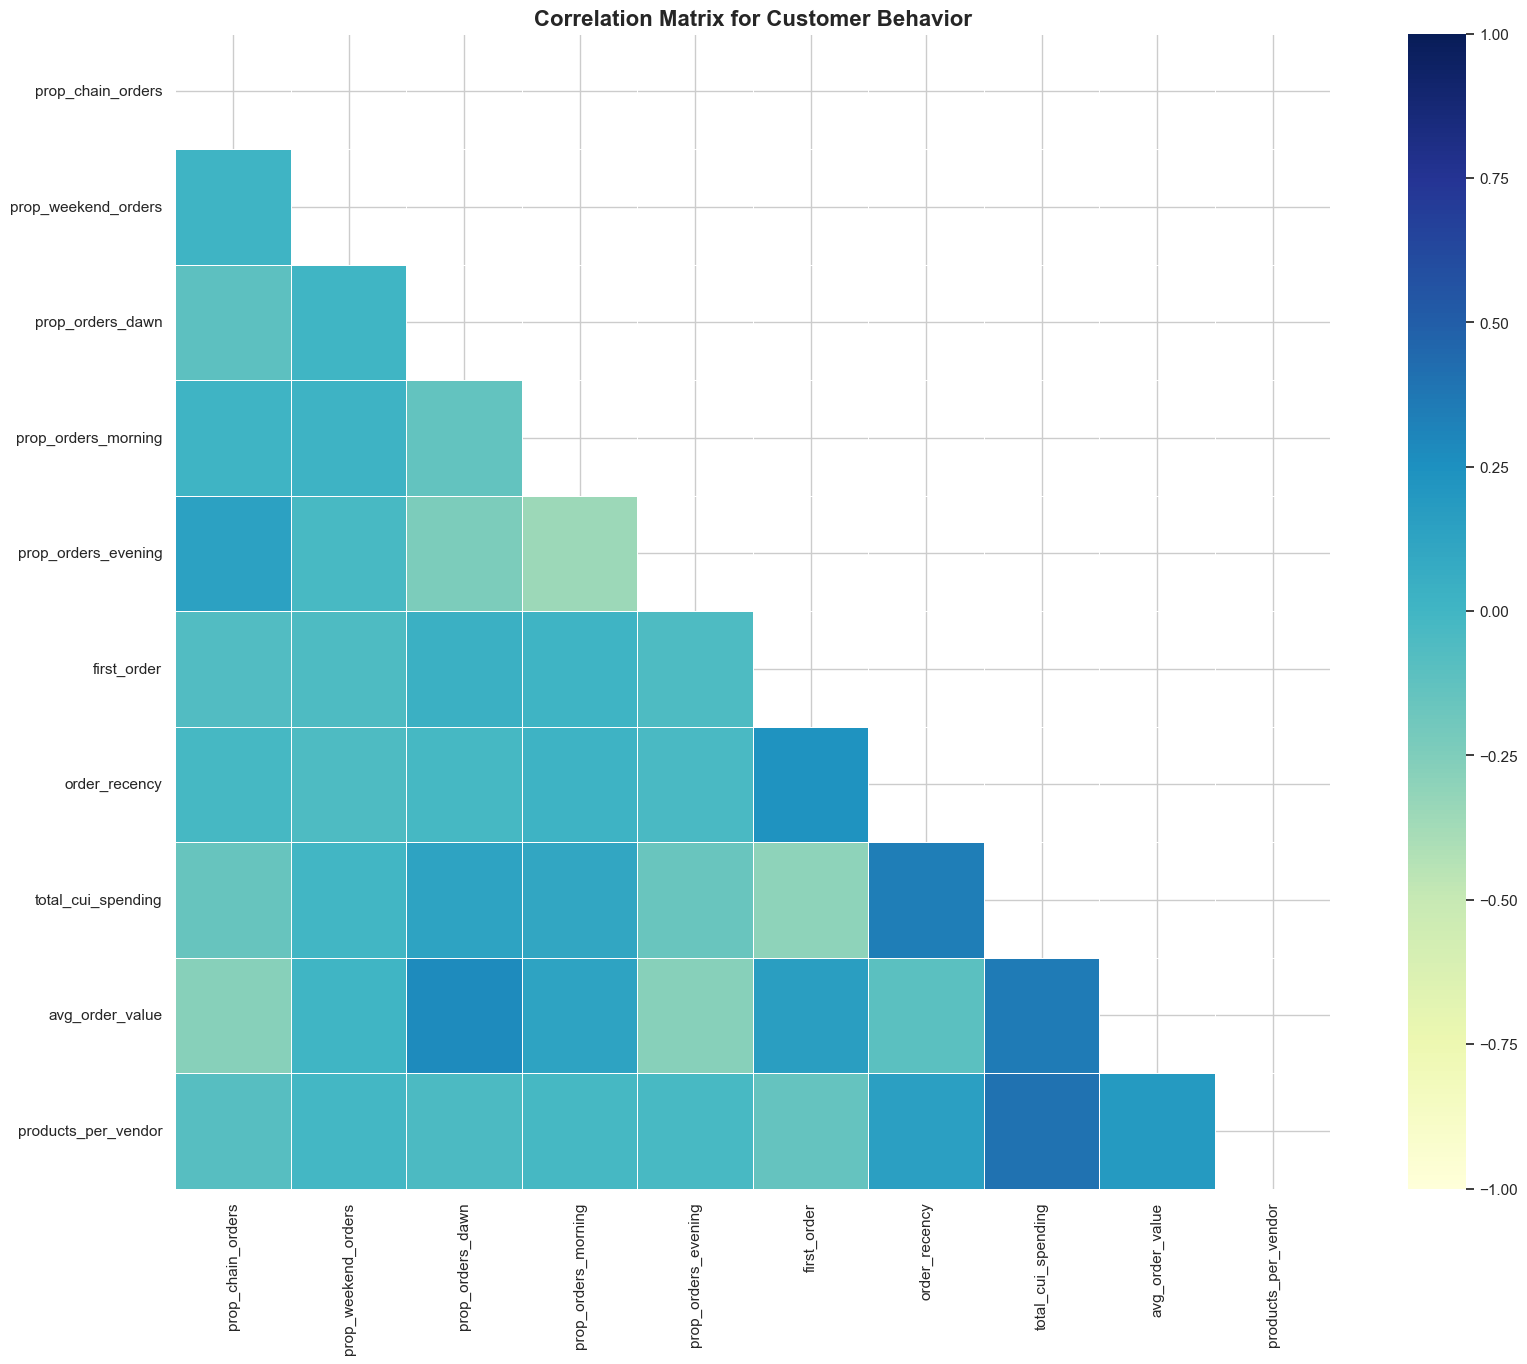

In [176]:
# Filter customer_behavior features
behavior_features = perspectives["customer_behavior"]
behavior_data = df_feature_selection[behavior_features]

# Compute correlation matrix
behavior_corr = behavior_data.corr(method="pearson").round(3)

# Plot correlation matrix
plot_matrix(
    behavior_corr, 
    title="Correlation Matrix for Customer Behavior",
    threshold=0.5, figsize=(20, 15)
)

## 7.3. Cuisine Preferences <a id="cuisine_preferences"></a>

The cuisine_preferences perspective contains features representing the proportion of spending across different cuisine categories, providing insight into customers' relative preferences.

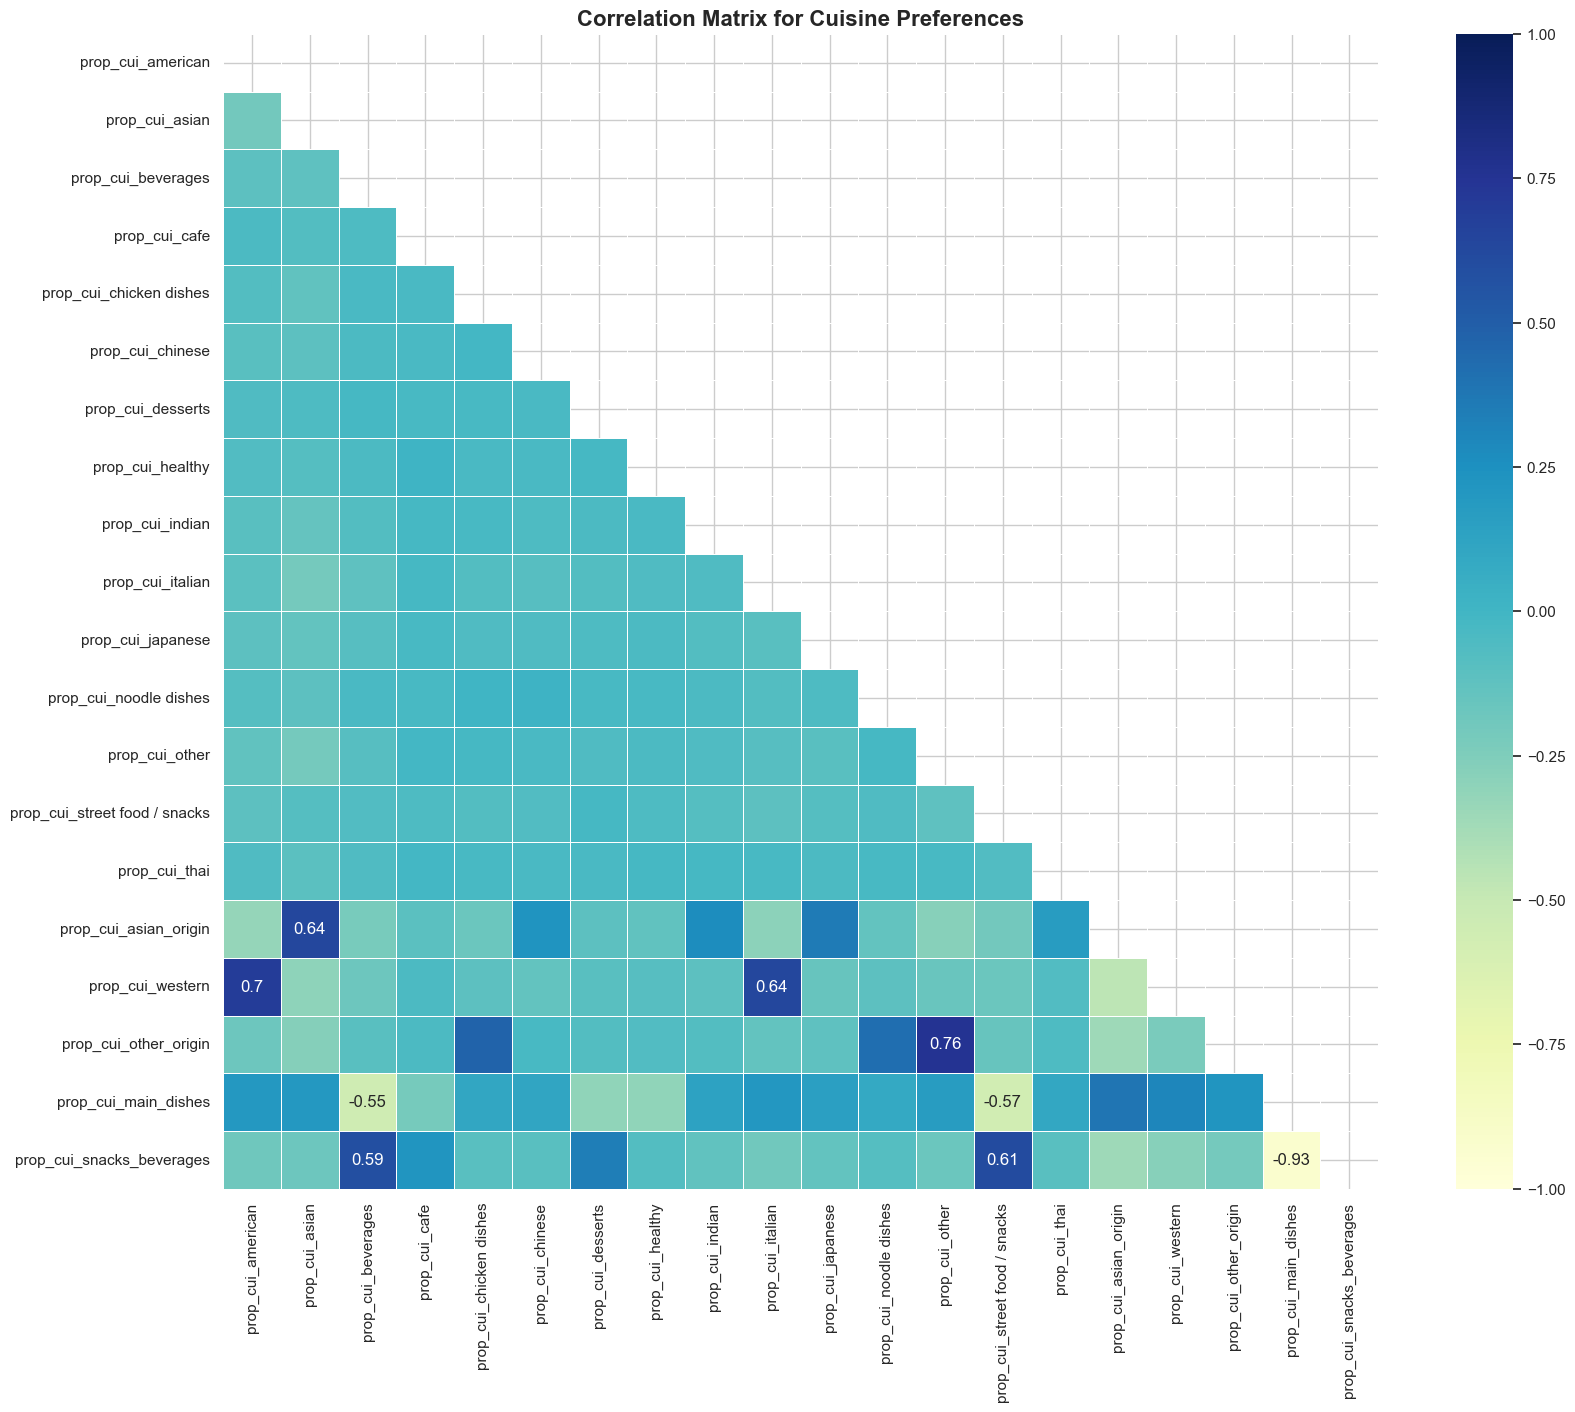

In [177]:
# Filter cuisine_preferences features
preferences_features = perspectives["cuisine_preferences"]
preferences_data = df_feature_selection[preferences_features]

# Compute correlation matrix
preferences_corr = preferences_data.corr(method="pearson").round(3)

# Plot correlation matrix
plot_matrix(
    preferences_corr, 
    title="Correlation Matrix for Cuisine Preferences",
    threshold=0.5, figsize=(20, 15)
)

In [178]:
# Update customer_behavior category by removing redundant features
perspectives["cuisine_preferences"] = [
    feature for feature in perspectives["cuisine_preferences"]
    if feature not in [
        "prop_cui_snacks_beverages", "prop_cui_street food / snacks", "prop_cui_beverages", # Highly correlated with prop_cui_main_dishes
        "prop_cui_american", "prop_cui_italian", # Highly correlated with prop_cui_western
        "prop_cui_asian", # Highly correlated with prop_cui_asian_origin
        "prop_cui_other" # Highly correlated with prop_cui_other_origin
    ]
]

# Verify the updated Purchasing Habits features
print("Updated cuisine preferences features:", perspectives["cuisine_preferences"])

Updated cuisine preferences features: ['prop_cui_cafe', 'prop_cui_chicken dishes', 'prop_cui_chinese', 'prop_cui_desserts', 'prop_cui_healthy', 'prop_cui_indian', 'prop_cui_japanese', 'prop_cui_noodle dishes', 'prop_cui_thai', 'prop_cui_asian_origin', 'prop_cui_western', 'prop_cui_other_origin', 'prop_cui_main_dishes']


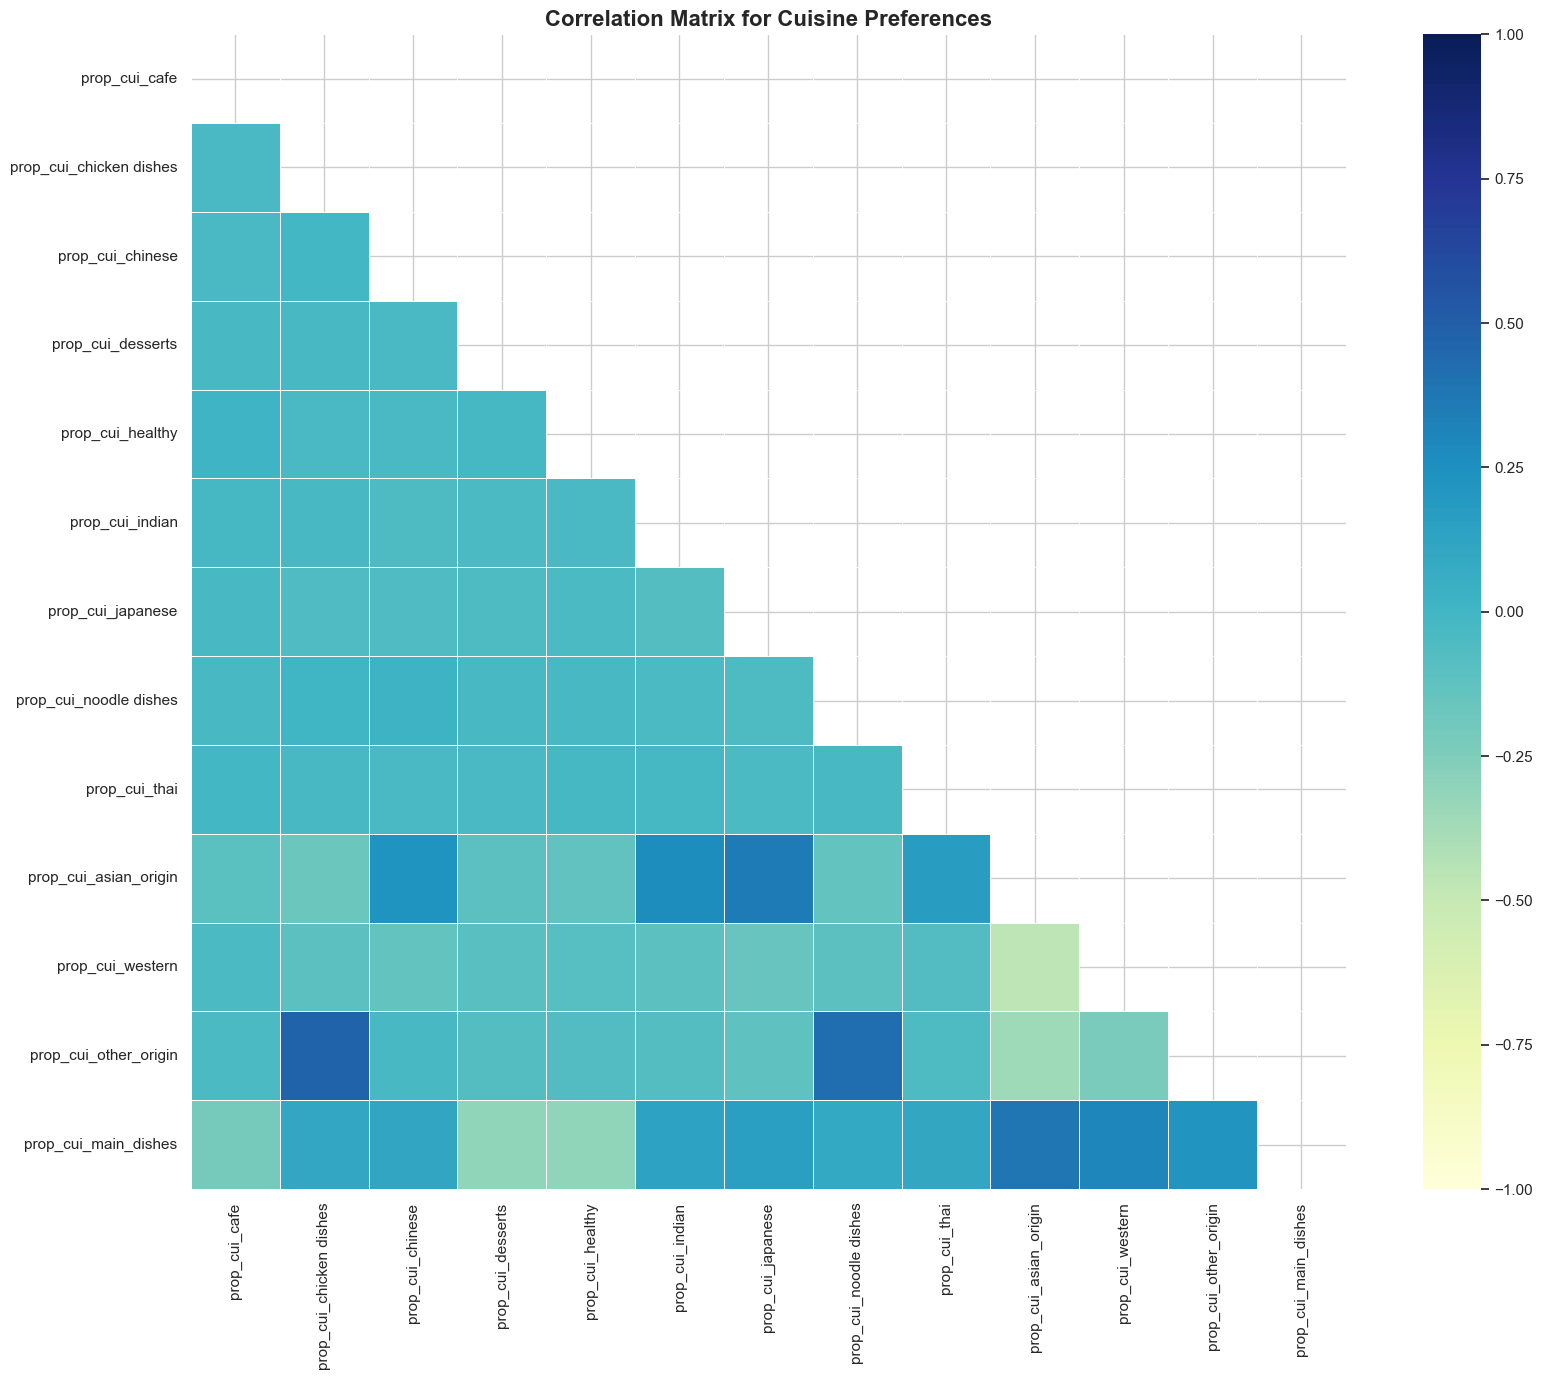

In [179]:
# Filter cuisine_preferences features
preferences_features = perspectives["cuisine_preferences"]
preferences_data = df_feature_selection[preferences_features]

# Compute correlation matrix
preferences_corr = preferences_data.corr(method="pearson").round(3)

# Plot correlation matrix
plot_matrix(
    preferences_corr, 
    title="Correlation Matrix for Cuisine Preferences",
    threshold=0.5, figsize=(20, 15)
)

## 7.4. Final Features <a id="final_features"></a>

We will plot the correlation matrix using all features from different perspectives to examine potential correlations between them. This is important because the clustering solutions from each perspective will be merged into a single unified solution, and understanding relationships between features across perspectives ensures meaningful integration.

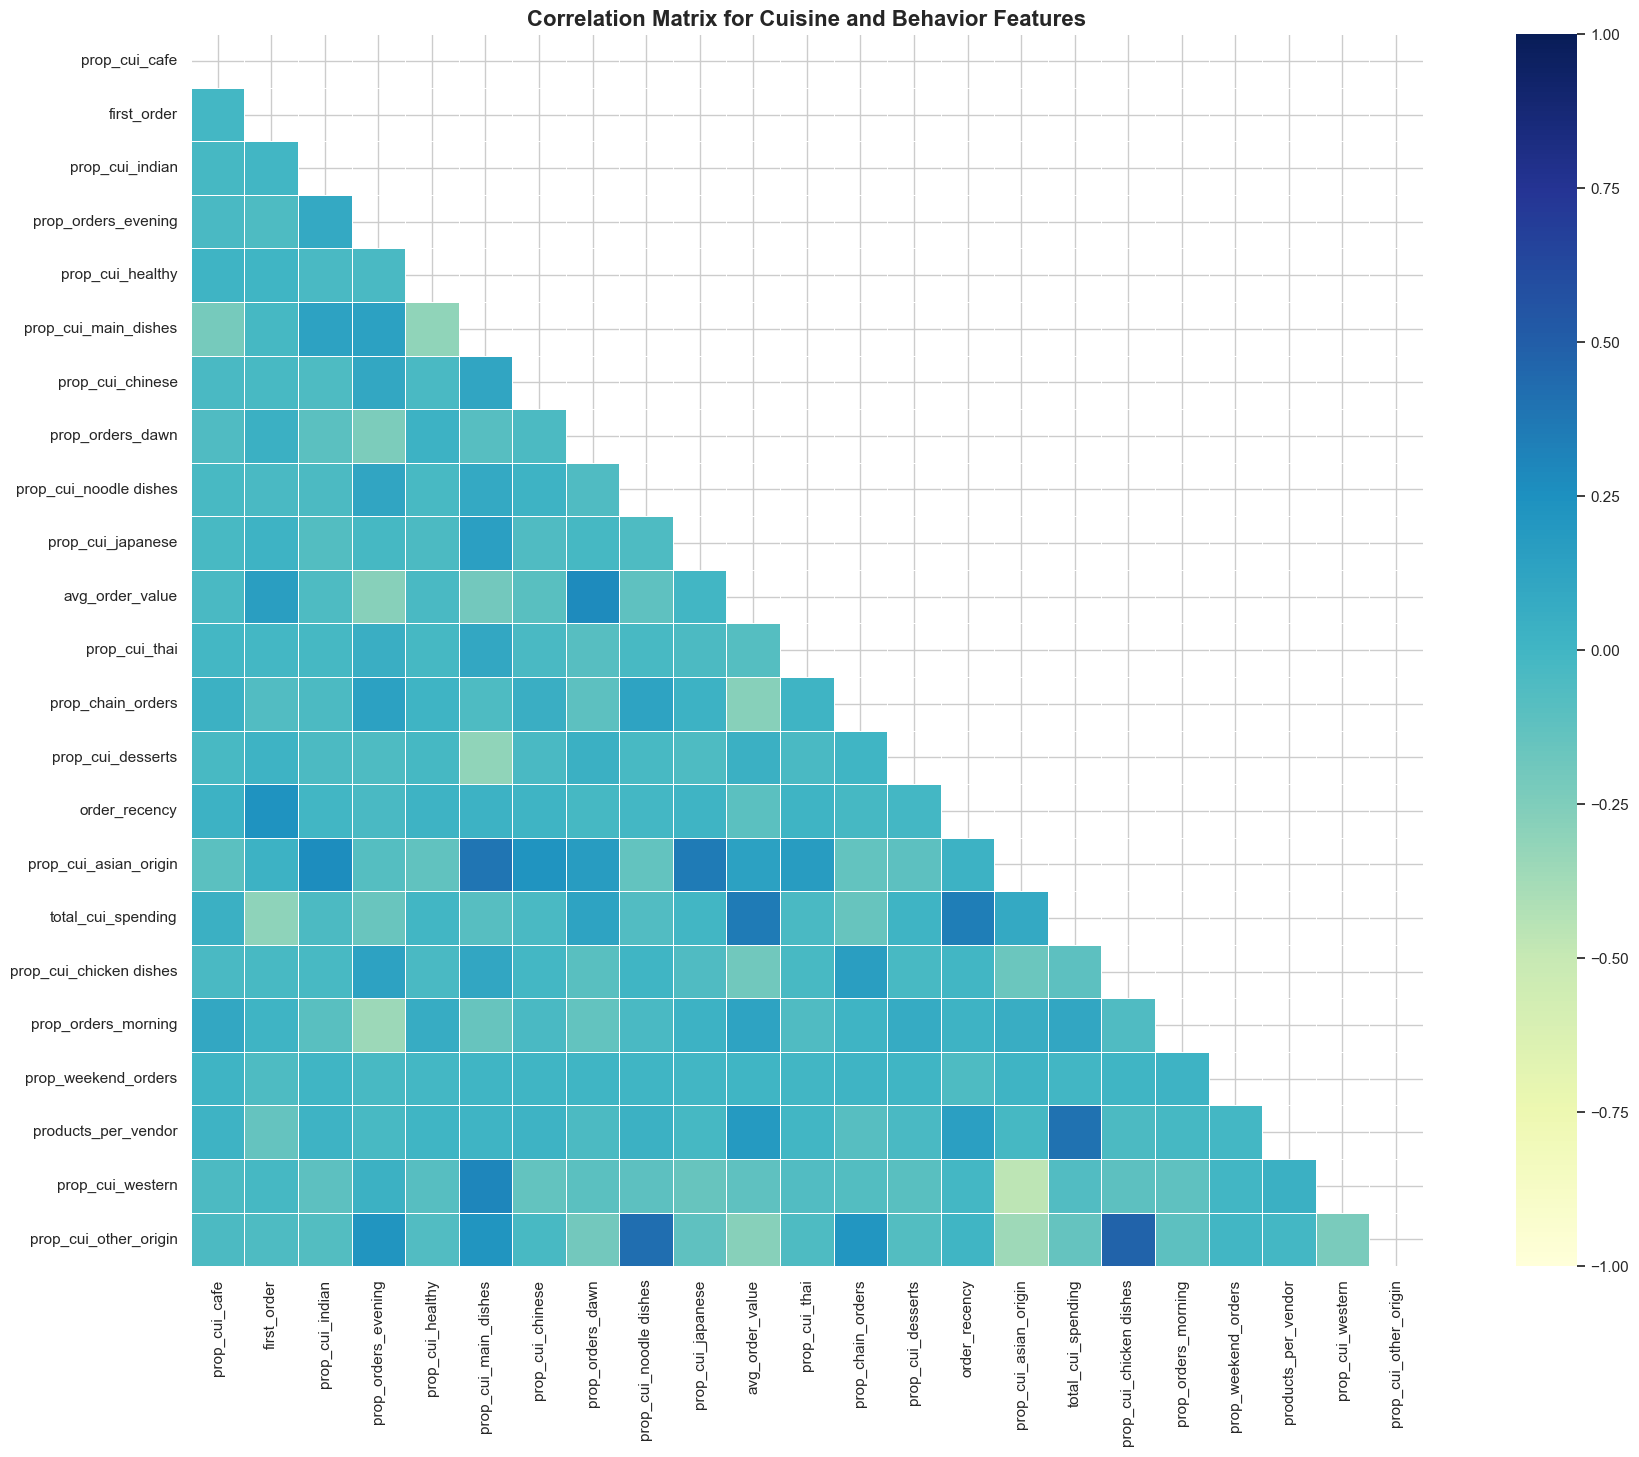

{'customer_behavior': ['prop_chain_orders',
  'prop_weekend_orders',
  'prop_orders_dawn',
  'prop_orders_morning',
  'prop_orders_evening',
  'first_order',
  'order_recency',
  'total_cui_spending',
  'avg_order_value',
  'products_per_vendor'],
 'cuisine_preferences': ['prop_cui_cafe',
  'prop_cui_chicken dishes',
  'prop_cui_chinese',
  'prop_cui_desserts',
  'prop_cui_healthy',
  'prop_cui_indian',
  'prop_cui_japanese',
  'prop_cui_noodle dishes',
  'prop_cui_thai',
  'prop_cui_asian_origin',
  'prop_cui_western',
  'prop_cui_other_origin',
  'prop_cui_main_dishes'],
 'demographics': ['customer_region',
  'city',
  'generation',
  'customer_age',
  'last_promo',
  'payment_method',
  'promo_used']}

In [180]:
# Combine cuisine and behavior features (excluding demographics)
cuisine_behavior_features = perspectives["cuisine_preferences"] + perspectives["customer_behavior"]

# Remove duplicates to ensure the feature list is unique
cuisine_behavior_features = list(set(cuisine_behavior_features))

# Compute the correlation matrix for the filtered dataframe
cuisine_behavior_corr = df_feature_selection[cuisine_behavior_features].corr(method="pearson").round(3)

# Plot the correlation matrix with a defined threshold
plot_matrix(
    cuisine_behavior_corr,
    title="Correlation Matrix for Cuisine and Behavior Features",
    threshold=0.5
)

# Display the perspectives dictionary
perspectives

To use the perspectives dictionary for clustering, we will save it as a JSON file in the same directory as this notebook. JSON is a simple, human-readable format that's easy to load back into Python for further analysis

In [181]:
# Define the filename and path
perspectives_filepath = os.path.join(os.getcwd(), "perspectives.json")

# Save the perspectives dictionary as a JSON file
with open(perspectives_filepath, "w") as file:
    json.dump(perspectives, file, indent=4)

print(f"Perspectives dictionary has been saved to {perspectives_filepath}")

Perspectives dictionary has been saved to c:\Users\xandg\Ambiente de Trabalho\IMS\3rd year\1st Semester\Capstone Project\OpenAI\Capstone-Project\CustomerSegmentationDataMining\deliverables\perspectives.json


# 8. Outliers (After Feature Selection) <a class="anchor" id="outliers_after"></a>

Evaluating outliers post feature selection (only for customer behavior features, because cuisine preference contains just proportions).<br>
[Back to ToC](#toc)<br>

In [201]:
df_outliers_final = df_new_features.copy()

In [202]:
# Get the the different entries from the perspectives dictionary in specific lists
customer_behavior_features = perspectives["customer_behavior"]
cuisine_preferences_features = perspectives["cuisine_preferences"]

In [203]:
# Create products_per_vendor feature
df_outliers_final['products_per_vendor'] = df_outliers_final['product_count'] / df_outliers_final['vendor_count'].replace(0, 1)

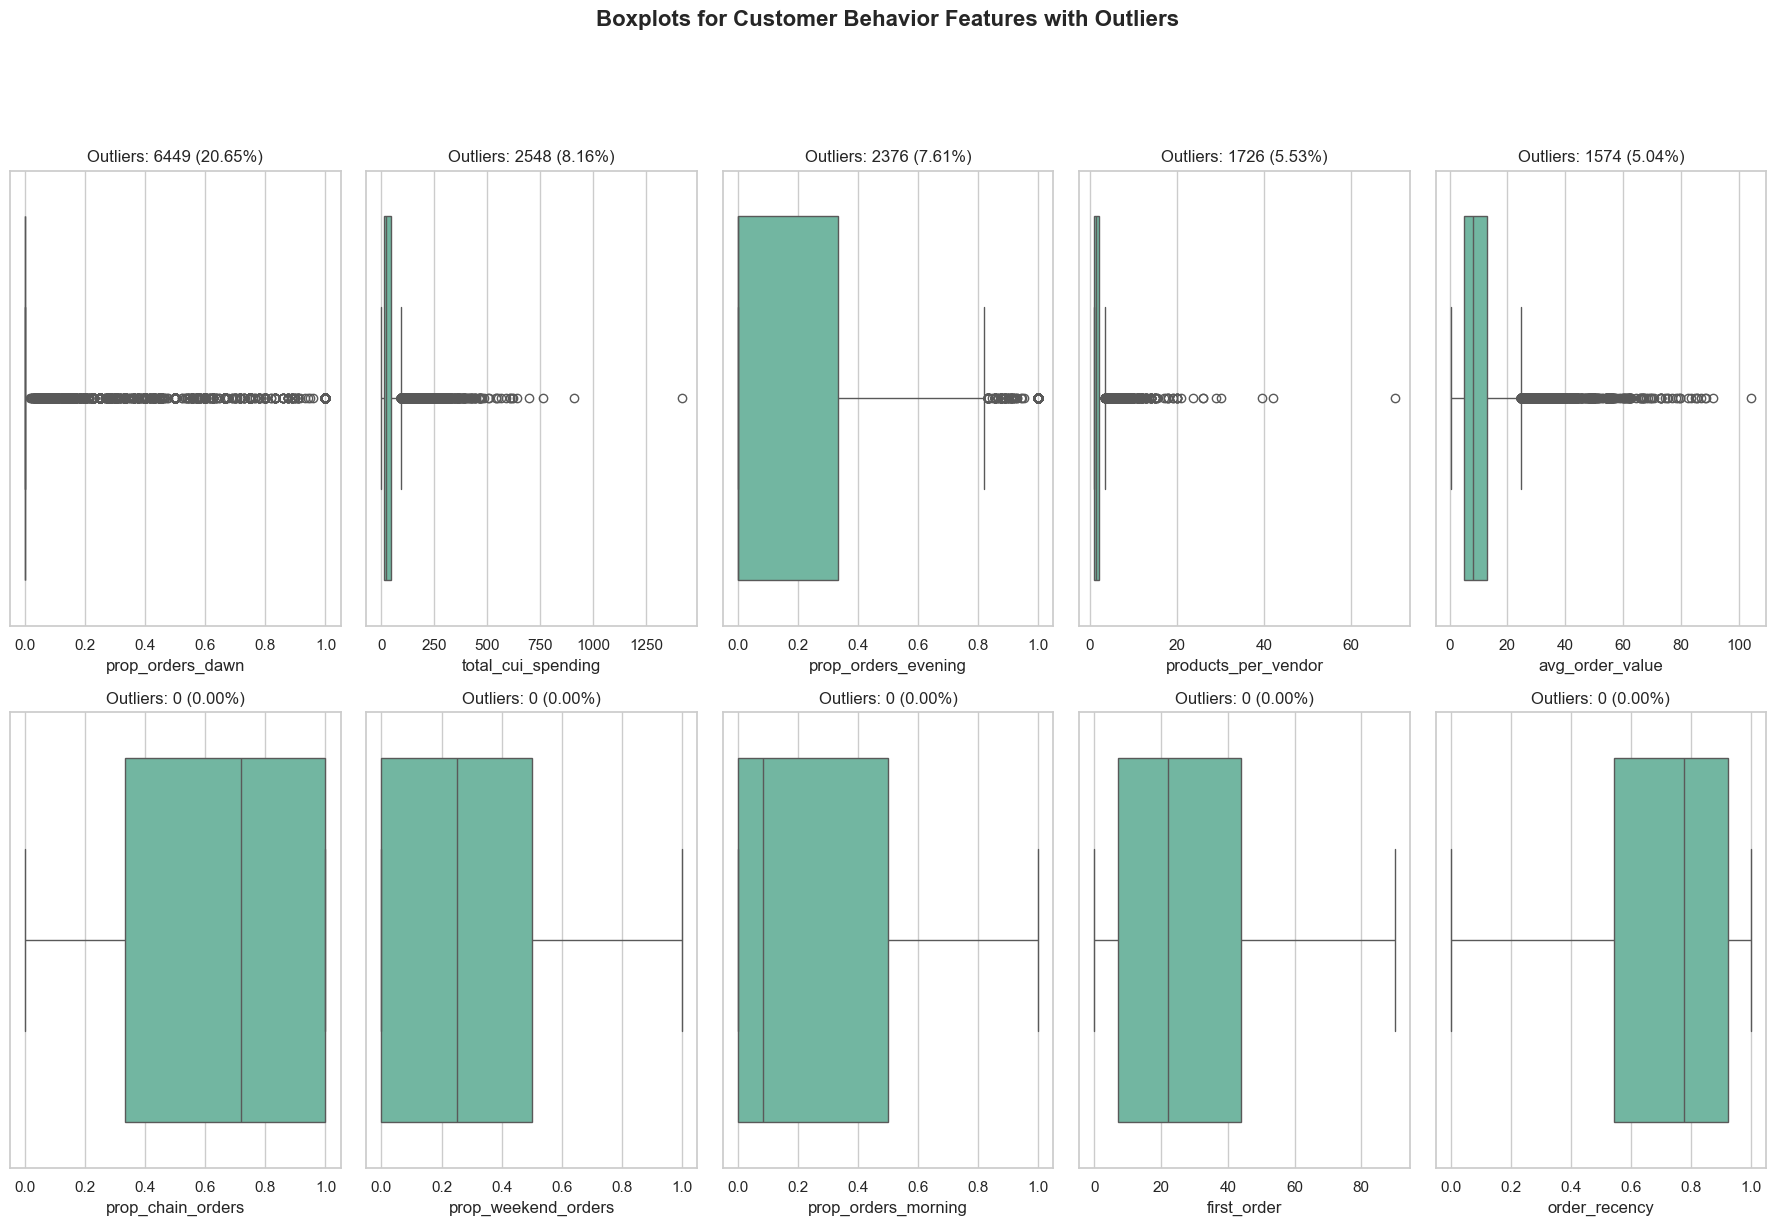

In [204]:
# Create boxplots for each selected metric feature
plot_boxplots_iqr_outliers(
    features=customer_behavior_features, 
    df=df_outliers_final,
    title="Boxplots for Customer Behavior Features with Outliers",
    sort_by="outliers"
)

In [205]:
# Define features with outliers
outliers_features = [
    "total_cui_spending",
    'products_per_vendor',
    "avg_order_value"
]

### 8.1. DBSCAN <a id="dbscan_outliers_final"></a>
[Back to 6. Outliers](#outliers)<br>

### 8.1.1. Identify eps value (elbow method) <a id="eps_final"></a>

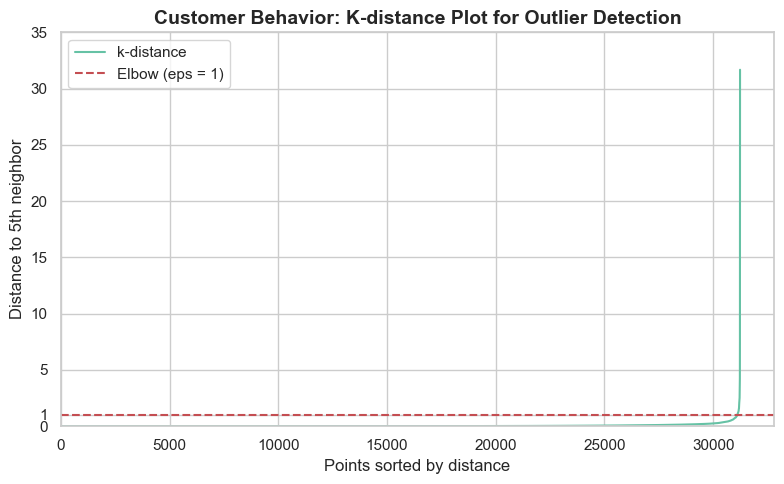

In [ ]:
# # Select numeric features for DBSCAN
# X = df_outliers_final[outliers_features]

# # Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Set number of neighbors
# k = 5

# # Fit nearest neighbors
# neighbors = NearestNeighbors(n_neighbors=k)
# neighbors_fit = neighbors.fit(X_scaled)
# distances, indices = neighbors_fit.kneighbors(X_scaled)

# # Sort distances
# distances = np.sort(distances[:, k-1])

# # Plot distances
# plt.figure(figsize=(8, 5))
# plt.plot(distances, label='k-distance')

# # Set elbow line at y=1
# elbow_value = 1
# plt.axhline(y=elbow_value, color='r', linestyle='--', label=f'Elbow (eps = {elbow_value})')

# # Set axis limits to start from 0
# plt.xlim(0)
# plt.ylim(0, max(distances) + 1)

# # Annotate the elbow point on the y-axis
# plt.yticks(list(plt.yticks()[0]) + [elbow_value])  # Add 3 to the y-ticks

# # Annotate the plot
# plt.title('Customer Behavior: K-distance Plot for Outlier Detection', fontsize=14, weight='bold')
# plt.xlabel('Points sorted by distance')
# plt.ylabel(f'Distance to {k}th neighbor')
# plt.legend()
# plt.tight_layout()
# plt.show()

### 8.1.2. Choose min_samples value <a id="min_samples_final"></a>

In [207]:
# # Set the parameters for DBSCAN
# min_samples_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# eps = 1 # Based on elbow point

# # Initialize lists to store results
# outliers_count = []
# outliers_percentage = []

# # Loop through different min_samples values and run DBSCAN
# for min_samples in min_samples_values:
#     # Perform DBSCAN clustering
#     db = DBSCAN(eps=eps, min_samples=min_samples)
#     labels = db.fit_predict(X_scaled)
    
#     # Count the number of outliers
#     count_outliers = np.sum(labels == -1)
    
#     # Calculate the percentage of outliers
#     percentage_outliers = round((count_outliers / len(X_scaled)) * 100, 2)
    
#     # Append results to lists
#     outliers_count.append(count_outliers)
#     outliers_percentage.append(percentage_outliers)

# # Create a DataFrame with the results
# dbscan_results_df = pd.DataFrame({
#     'min_samples': min_samples_values,
#     'Outliers': outliers_count,
#     '% Outliers': outliers_percentage
# })

# # Display the DataFrame
# dbscan_results_df

min_samples  Outliers  % Outliers
0            2        45        0.14
1            3        59        0.19
2            4        66        0.21
3            5        83        0.27
4            6       107        0.34
5            7       113        0.36
6            8       121        0.39
7            9       141        0.45
8           10       145        0.46

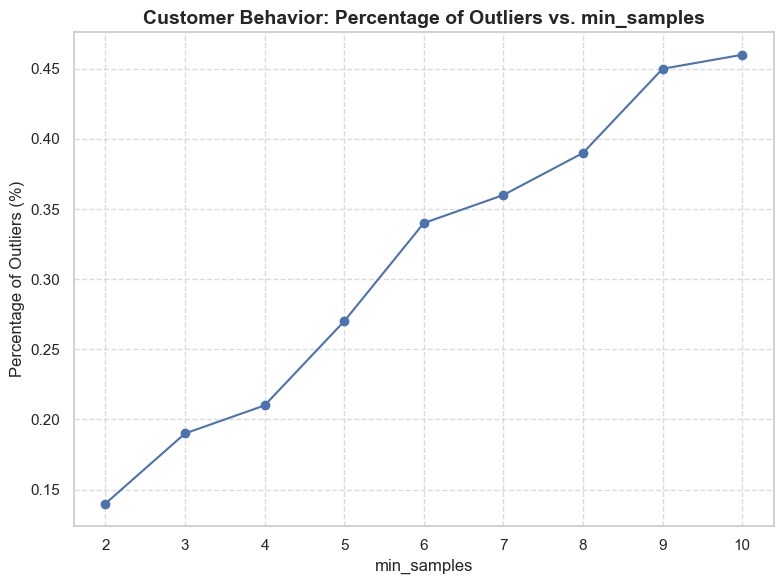

In [2523]:
# # Create an elbow plot
# plt.figure(figsize=(8, 6))
# plt.plot(dbscan_results_df['min_samples'], dbscan_results_df['% Outliers'], marker='o', linestyle='-', color='b')

# # Add labels and title
# plt.title('Customer Behavior: Percentage of Outliers vs. min_samples', fontsize=14, weight='bold')
# plt.xlabel('min_samples', fontsize=12)
# plt.ylabel('Percentage of Outliers (%)', fontsize=12)

# # Display the grid
# plt.grid(True, linestyle='--', alpha=0.7)

# # Show the plot
# plt.tight_layout()
# plt.show()

**Conclusion:** We chose min_samples = 9 as it marks the elbow point, removing 0.45% of data as outliers. 

### 8.1.3. Apply DBSCAN <a id="apply_dbscan_outliers_final"></a>

In [208]:
# Select numeric features for DBSCAN
X = df_outliers_final[outliers_features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set the parameters for DBSCAN
min_samples = 9
eps = 1

# Apply DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X_scaled)

# Identify outlier indices
outlier_indices = np.where(labels == -1)[0]

# Count the number of outliers
count_outliers = len(outlier_indices)

# Calculate the percentage of outliers
perc_outliers = (count_outliers / len(X_scaled)) * 100

# Save the outliers
outliers = df_outliers_final.iloc[outlier_indices]
outliers.to_csv('../Data/df_final_outliers.csv', index=True)

# Filter the original dataset to exclude the outliers
df_outliers_final.drop(index=outliers.index, inplace=True)

# Output the results
print(f"Outliers removed due to DBSCAN: {count_outliers} ({perc_outliers:.2f}%)")

Outliers removed due to DBSCAN: 141 (0.45%)


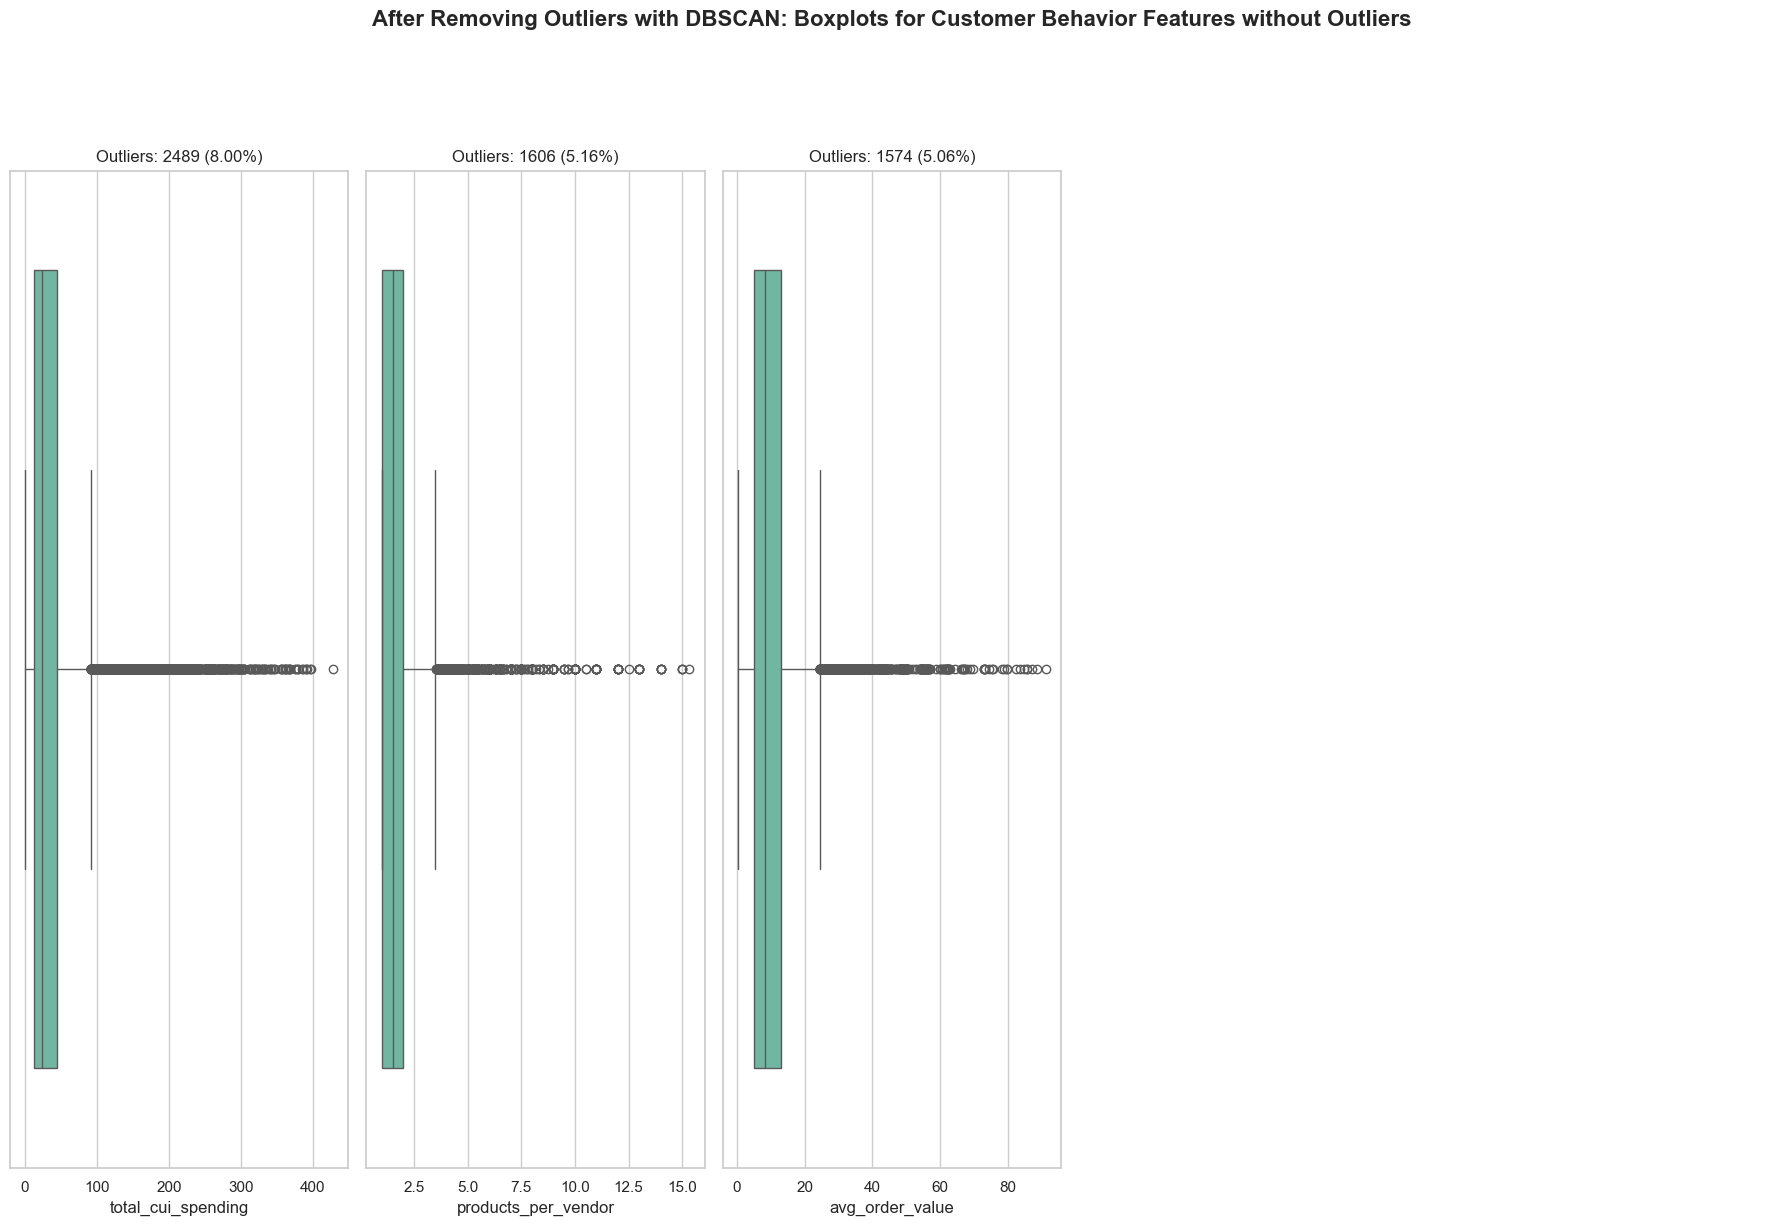

In [209]:
# Create boxplots for each selected metric feature
plot_boxplots_iqr_outliers(
    features=outliers_features, 
    df=df_outliers_final,
    title="After Removing Outliers with DBSCAN: Boxplots for Customer Behavior Features without Outliers",
    sort_by="outliers"
)

## 8.2 Winsorizing <a id="winsorizing_after_dbscan"></a>

Winsorizing the data involves replacing the outliers with the nearest non-outlier values. This ensures that the extreme values are still accounted for in the analysis, but their impact is minimized.

In [210]:
# Define the IQR multipliers
iqr_multipliers = [x / 2 for x in range(2, 21)]

affected_rows_df = winsorization_analysis(df_outliers_final, outliers_features, iqr_multipliers)
affected_rows_df

IQR Multiplier  Affected Rows  % Affected Rows
0              1.0           6640            21.35
1              1.5           4873            15.67
2              2.0           3328            10.70
3              2.5           2457             7.90
4              3.0           1786             5.74
5              3.5           1364             4.39
6              4.0            987             3.17
7              4.5            797             2.56
8              5.0            584             1.88
9              5.5            467             1.50
10             6.0            347             1.12
11             6.5            281             0.90
12             7.0            205             0.66
13             7.5            165             0.53
14             8.0            116             0.37
15             8.5             96             0.31
16             9.0             70             0.23
17             9.5             54             0.17
18            10.0             38             0.12

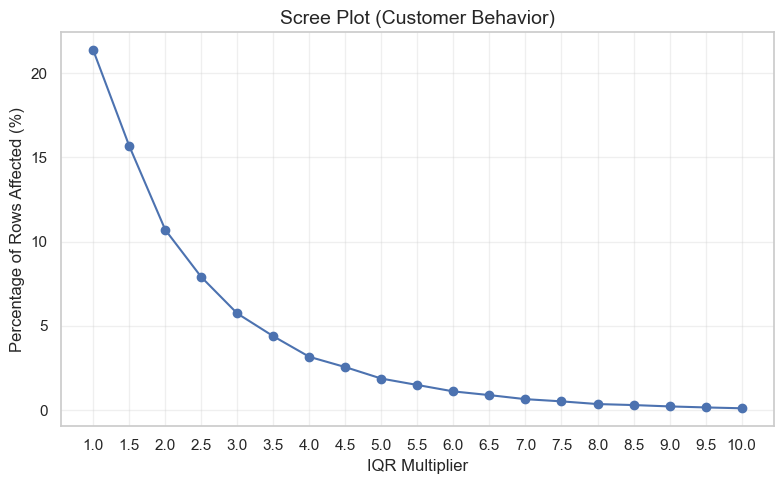

In [211]:
# Plot the scree plot
plt.figure(figsize=(8, 5))
plt.plot(affected_rows_df["IQR Multiplier"], affected_rows_df["% Affected Rows"], marker='o', linestyle='-', color='b')
plt.title('Scree Plot (Customer Behavior)', fontsize=14)
plt.xlabel('IQR Multiplier', fontsize=12)
plt.ylabel('Percentage of Rows Affected (%)', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(iqr_multipliers)
plt.tight_layout()
plt.show()

**Decision:** We select an IQR multiplier of 4, as it balances the need to handle outliers while being conservative, affecting only 3.17% of rows.

In [199]:
# Apply winsorization with chosen IQR multiplier
df_outliers_final = winsorization(df_outliers_final, outliers_features, iqr_multiplier = 4)

Affected Rows per Feature:

total_cui_spending: 590 (1.90%)
avg_order_value: 146 (0.47%)
products_per_vendor: 0 (0.00%)

Total Affected Rows: 735 (2.36%)


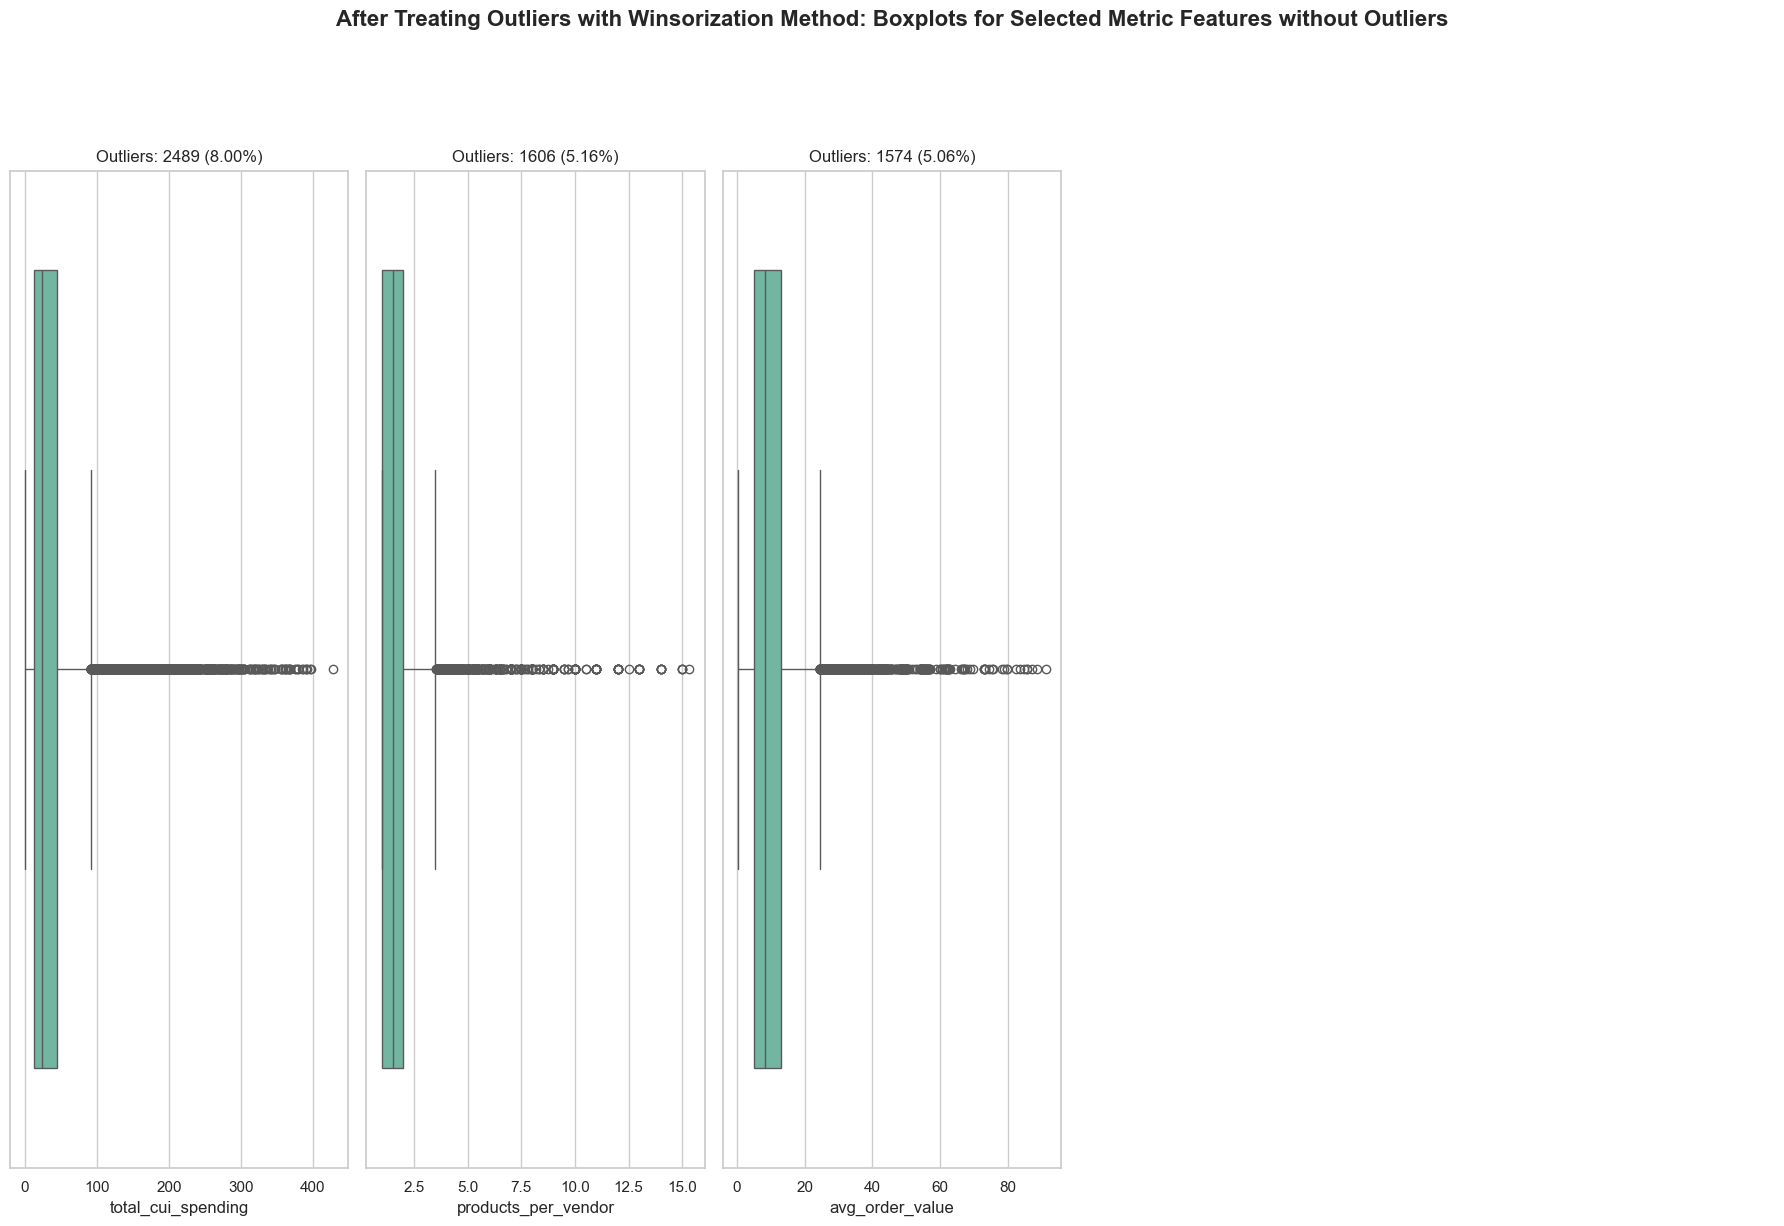

In [212]:
# Create boxplots for each selected metric feature
plot_boxplots_iqr_outliers(
    features=outliers_features, 
    df=df_outliers_final,
    title="After Treating Outliers with Winsorization Method: Boxplots for Selected Metric Features without Outliers",
    sort_by="outliers"
)

**Conclusion:** We chose the DBSCAN approach, which removes 141 rows (0.45%) and winsorizes 987 rows (3.17%). DBSCAN is more robust as it identifies outliers (also multivariate outliers) based on data density and neighborhood relationships, capturing complex patterns that manual thresholds may miss. By optimizing DBSCAN parameters, we achieved a conservative yet comprehensive outlier detection.

In [2538]:
df_outliers_final.to_csv('../Data/df_clustering_non_standardized.csv', index=True)

# 9. Standardization <a class="anchor" id="standardization"></a>
[Back to ToC](#toc)<br>

In [2532]:
# Define metric and non-metric features
metric_features = df_outliers_final.select_dtypes(include=['number']).columns.tolist()
non_metric_features = df_outliers_final.select_dtypes(exclude=['number']).columns.tolist()
print("metric_features:", metric_features)
print("non_metric_features:", non_metric_features)

metric_features: ['customer_age', 'vendor_count', 'product_count', 'chain_orders', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_cui_spending', 'total_orders', 'weekend_orders', 'weekday_orders', 'orders_dawn', 'orders_morning', 'orders_afternoon', 'orders_evening', 'order_recency', 'avg_daily_orders', 'avg_order_value', 'promo_used', 'cui_asian_origin', 'cui_western', 'cui_other_origin', 'cui_main_dishes', 'cui_snacks_beverages', 'prop_cui_american', 'prop_cui_asian', 'prop_cui_beverages', 'prop_cu

In [2533]:
# Create a copy of the DataFrame
df_scaled = df_outliers_final.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled[metric_features] = scaler.fit_transform(df_scaled[metric_features])

# Display the DataFrame
df_scaled[metric_features].head().T

customer_id            1b8f824d5e  f6d1b2ba63  180c632ed8  4eb37a6705  \
customer_age            -1.366137    1.481241   -0.227186   -1.081400   
vendor_count            -0.404103   -0.774180   -0.404103   -0.404103   
product_count           -0.084407   -0.564201   -0.404270   -0.084407   
chain_orders            -0.474819   -0.208274   -0.474819   -0.741365   
first_order             -1.178442   -1.178442   -1.178442   -1.178442   
...                           ...         ...         ...         ...   
prop_orders_dawn        -0.433757   -0.433757   -0.433757   -0.433757   
prop_orders_morning     -0.796953    2.132628    0.667837    2.132628   
prop_orders_afternoon   -1.069308   -1.069308    0.240297   -1.069308   
prop_orders_evening      2.639351   -0.630631   -0.630631   -0.630631   
products_per_vendor      0.817727    0.283289   -0.251150    0.817727   

customer_id            6aef2b6726  
customer_age             1.765979  
vendor_count            -0.404103  
product_count           -0.564201  
chain_orders            -0.741365  
first_order             -1.178442  
...                           ...  
prop_orders_dawn         3.307340  
prop_orders_morning     -0.796953  
prop_orders_afternoon   -1.069308  
prop_orders_evening     -0.630631  
products_per_vendor     -0.785589  

[96 rows x 5 columns]

# 10. Export Preprocessed Dataset <a class="anchor" id="export_preproc_data"></a>
[Back to ToC](#toc)<br>

In [2537]:
# Export the preprocessed Dataframe as a CSV file
df_scaled.to_csv('../Data/df_clustering_standardized.csv', index=True)